# Project 2 - Healthcare

### Aurore Prevot

In [ ]:
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift

import scipy.cluster.hierarchy as shc
import scipy.stats as stats

## 1. Exploratory Data Analysis
### a) Loading the datasets and merging the datasets

In [ ]:
zip_file_path = "Dataset.zip"
 
try:
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        z.extractall("Dataset")
        print("Extracted all")
except:
    print("Invalid file")

Extracted all


In [ ]:
data = pd.read_csv("./Dataset/data.csv", index_col=0)
print(f"The data shape is {data.shape}.\n")
print(f"The 5 first rows of the data are:")
data.head(5)

The data shape is (801, 20531).

The 5 first rows of the data are:


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

          gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
sample_0    7.220030    9.119813   12.003135    9.650743    8.921326   
sample_1    6.256586    8.381612   12.674552   10.517059    9.397854   
sample_2    5.401607    9.911597    9.045255    9.788359   10.090470   
sample_3    8.942805    9.601208   11.392682    9.694814    9.684365   
sample_4    7.181162    9.846910   11.922439    9.217749    9.461191   

          gene_20529  gene_20530  
sample_0    5.286759         0.0  
sample_1    2.094168         0.0  
sample_2    1.683023         0.0  
sample_3    3.292001         0.0  
sample_4    5.110372         0.0  

[5 rows x 20531 columns]

In [ ]:
print(F"\nThe last 5 rows of the data are:")
data.tail(5)


The last 5 rows of the data are:


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027   

              gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_796  0.496922     0.0     0.0  ...    6.088133    9.118313   10.004852   
sample_797  0.000000     0.0     0.0  ...    6.371876    9.623335    9.823921   
sample_798  1.811101     0.0     0.0  ...    5.719386    8.610704   10.485517   
sample_799  0.000000     0.0     0.0  ...    5.785237    8.605387   11.004677   
sample_800  0.000000     0.0     0.0  ...    6.403075    8.594354   10.243079   

            gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
sample_796    4.484415    9.614701   12.031267    9.813063   10.092770   
sample_797    6.555327    9.064002   11.633422   10.317266    8.745983   
sample_798    3.589763    9.350636   12.180944   10.681194    9.466711   
sample_799    4.745888    9.626383   11.198279   10.335513   10.400581   
sample_800    9.139459   10.102934   11.641081   10.607358    9.844794   

            gene_20529  gene_20530  
sample_796    8.819269    0.000000  
sample_797    9.659081    0.000000  
sample_798    4.677458    0.586693  
sample_799    5.718751    0.000000  
sample_800    4.550716    0.000000  

[5 rows x 20531 columns]

In [ ]:
labels = pd.read_csv("./Dataset/labels.csv", index_col=0)
print(f"The shape of the labels is {labels.shape}.")
labels.head(5)

The shape of the labels is (801, 1).


Class
sample_0  PRAD
sample_1  LUAD
sample_2  PRAD
sample_3  PRAD
sample_4  BRCA

In [ ]:
print(F"\nThe last 5 rows of the labels are:")
labels.tail(5)


The last 5 rows of the labels are:


Class
sample_796  BRCA
sample_797  LUAD
sample_798  COAD
sample_799  PRAD
sample_800  PRAD

In [ ]:
labels.value_counts()

Class
BRCA     300
KIRC     146
LUAD     141
PRAD     136
COAD      78
dtype: int64

In [ ]:
all_data = data.merge(labels, left_index=True, right_index=True)
all_data.shape

(801, 20532)

In [ ]:
all_data.head(5)

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
sample_0  0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
sample_1  0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
sample_2  0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
sample_3  0.434882     0.0     0.0  ...    8.792959   10.141520    8.942805   
sample_4  0.360982     0.0     0.0  ...    8.891425   10.373790    7.181162   

          gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
sample_0    9.119813   12.003135    9.650743    8.921326    5.286759   
sample_1    8.381612   12.674552   10.517059    9.397854    2.094168   
sample_2    9.911597    9.045255    9.788359   10.090470    1.683023   
sample_3    9.601208   11.392682    9.694814    9.684365    3.292001   
sample_4    9.846910   11.922439    9.217749    9.461191    5.110372   

          gene_20530  Class  
sample_0         0.0   PRAD  
sample_1         0.0   LUAD  
sample_2         0.0   PRAD  
sample_3         0.0   PRAD  
sample_4         0.0   BRCA  

[5 rows x 20532 columns]

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20532 entries, gene_0 to Class
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [ ]:
col_with_missing = []
for column in all_data.columns:
    if all_data[column].isna().sum() != 0:
        print(f"Column {column} has {all_data[column].isna().sum()} missing values.")
        col_with_missing.append(column)
if len(col_with_missing) == 0:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(f"The shape of the scaled dataset is {scaled_data.shape}")
pd.DataFrame(scaled_data).head(5)

The shape of the scaled dataset is (801, 20531)


0         1         2         3         4      5         6      \
0 -0.194799 -0.828030  0.159800 -1.948277  1.221575    0.0 -0.207968   
1 -0.194799 -2.015017 -1.415042  1.353109 -0.376518    0.0 -0.532222   
2 -0.194799  0.417348  1.156735  0.249807  0.112832    0.0 -0.391297   
3 -0.194799  0.543888  1.326182 -0.099053  0.755741    0.0  0.395348   
4 -0.194799 -0.295955 -0.257107 -0.286413 -0.148843    0.0 -0.757118   

      7         8         9      ...     20521     20522     20523     20524  \
0  0.180910 -0.125376 -0.065633  ... -1.300200 -0.921755 -0.877838  0.996247   
1 -0.983088 -0.125376 -0.065633  ... -1.747076 -2.392213 -0.831893  0.591649   
2 -0.092995 -0.125376 -0.065633  ... -1.034088 -1.059669  2.248803  0.232601   
3 -0.127831 -0.125376 -0.065633  ...  0.241299  0.044905  0.224956  1.719725   
4 -0.273165 -0.125376 -0.065633  ...  0.133335  0.208252  0.837739  0.979924   

      20525     20526     20527     20528     20529     20530  
0 -1.166072  0.389441 -0.869566 -1.187938 -0.116483 -0.261901  
1 -2.549598  1.391628  0.623551 -0.342277 -1.656889 -0.261901  
2  0.317880 -4.025621 -0.632381  0.886860 -1.855264 -0.261901  
3 -0.263847 -0.521747 -0.793609  0.166174 -1.078941 -0.261901  
4  0.196645  0.268992 -1.615841 -0.229878 -0.201588 -0.261901  

[5 rows x 20531 columns]

In [ ]:
encoder = LabelEncoder()
labels_encod = encoder.fit_transform(labels)
pd.DataFrame(labels_encod).head(5)

C:\Users\Aurore Prevot\anaconda3\envs\cv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
0  4
1  3
2  4
3  4
4  0

In [ ]:
all_data_numerical = all_data.copy()
all_data_numerical['Class'] = encoder.transform(all_data_numerical['Class'])
all_data_numerical.head(5)

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
sample_0  0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
sample_1  0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
sample_2  0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
sample_3  0.434882     0.0     0.0  ...    8.792959   10.141520    8.942805   
sample_4  0.360982     0.0     0.0  ...    8.891425   10.373790    7.181162   

          gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
sample_0    9.119813   12.003135    9.650743    8.921326    5.286759   
sample_1    8.381612   12.674552   10.517059    9.397854    2.094168   
sample_2    9.911597    9.045255    9.788359   10.090470    1.683023   
sample_3    9.601208   11.392682    9.694814    9.684365    3.292001   
sample_4    9.846910   11.922439    9.217749    9.461191    5.110372   

          gene_20530  Class  
sample_0         0.0      4  
sample_1         0.0      3  
sample_2         0.0      4  
sample_3         0.0      4  
sample_4         0.0      0  

[5 rows x 20532 columns]

### Observations:
- The dataset, named data, has 801 samples (patients) and 20531 features(genes)
- The labels (type of cancer), named labels, has the code for the type pf cancer for the 801 samples.
- The dataset named all_data is the merging of the 2 datasets data and labels.
- The original dataset is scaled in the dataset named scaled_data.
- The labels have been encoded in the dataset named labels_encod.

### b) Plotting the merged dataset as a hierarchically-clustered heatmap.

C:\Users\Aurore Prevot\anaconda3\envs\cv\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


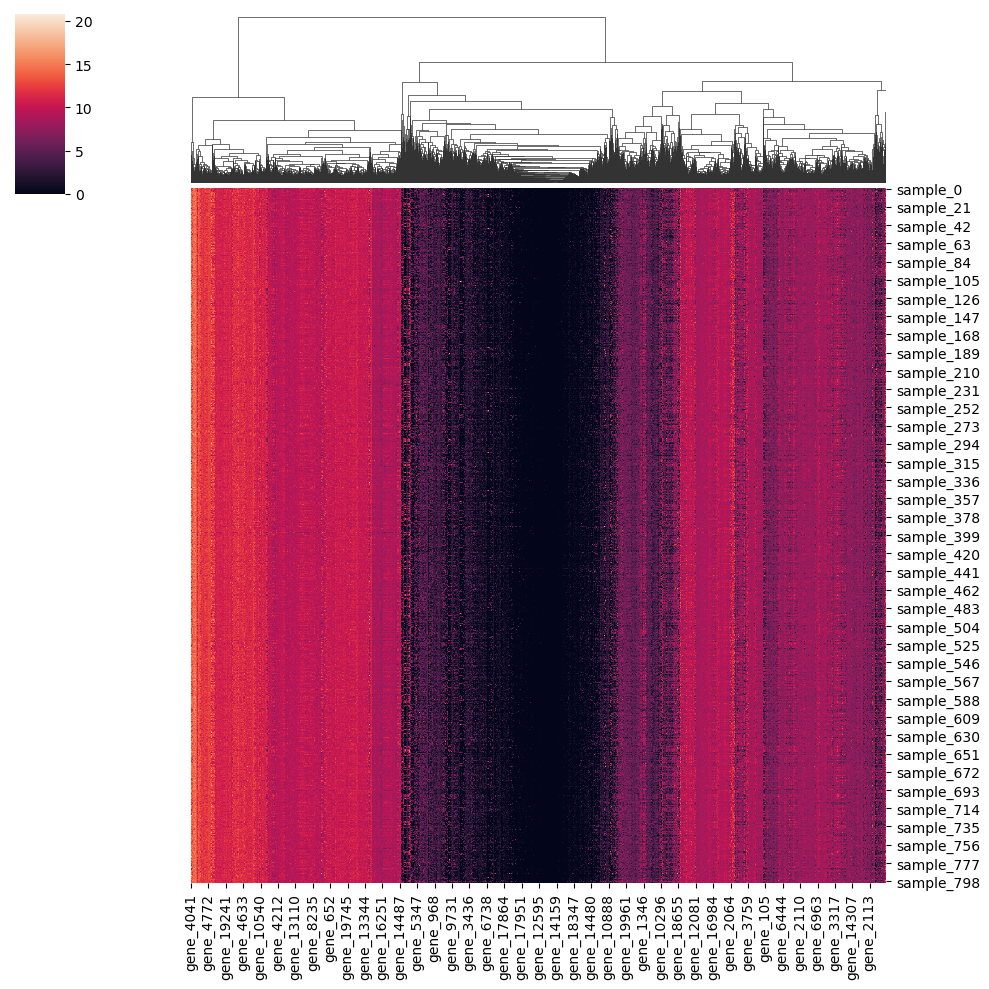

In [ ]:
sns.clustermap(data, method="complete", metric="euclidean", row_cluster=False)

In [ ]:
cancer_color_dict = dict(zip(labels['Class'].unique(), "rbgyk"))
print(cancer_color_dict )
row_colors = labels['Class'].map(cancer_color_dict )
print(row_colors)

{'PRAD': 'r', 'LUAD': 'b', 'BRCA': 'g', 'KIRC': 'y', 'COAD': 'k'}
sample_0      r
sample_1      b
sample_2      r
sample_3      r
sample_4      g
             ..
sample_796    g
sample_797    b
sample_798    k
sample_799    r
sample_800    r
Name: Class, Length: 801, dtype: object


C:\Users\Aurore Prevot\anaconda3\envs\cv\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


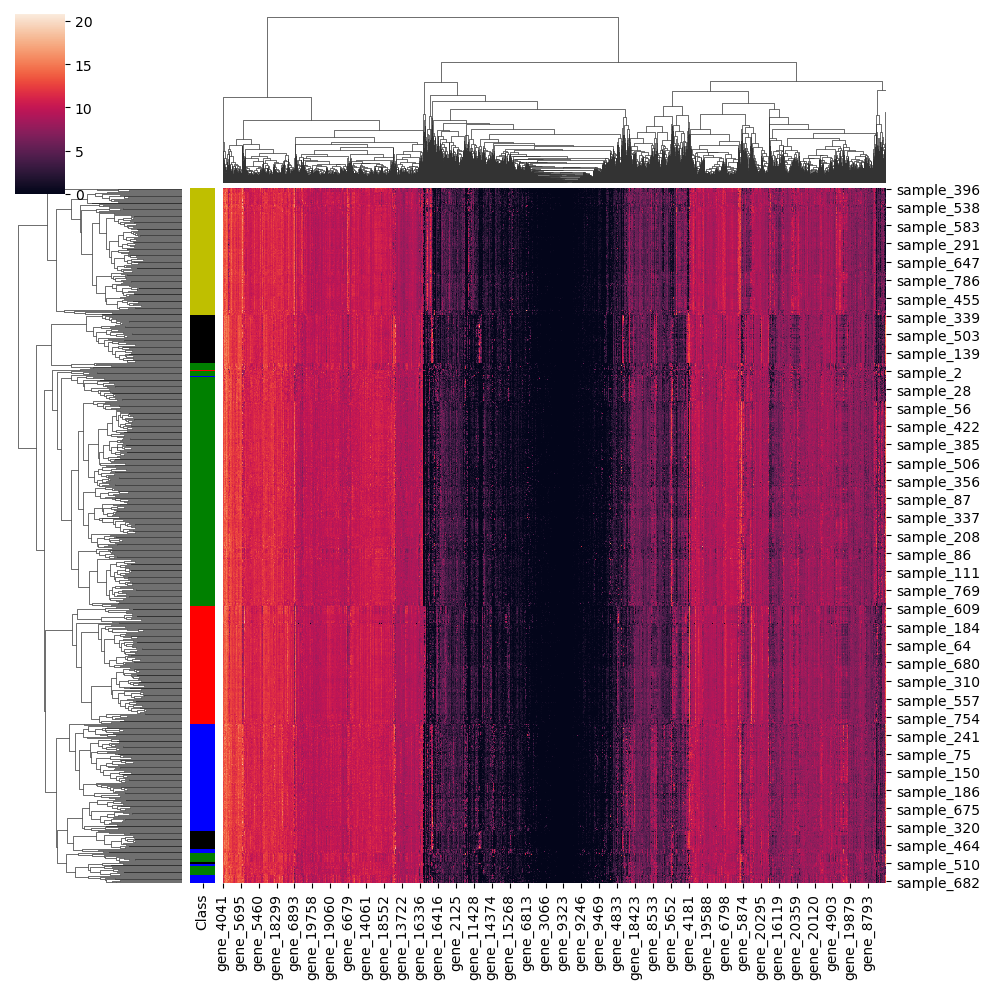

In [ ]:
sns.clustermap(data, method="complete", metric="euclidean", row_colors=row_colors)

### c) Null-hypothesis testing

#### Determination of features (genes) that are the most correlated to the labels (type of cancer)

In [ ]:
correlation_matrix = all_data_numerical.corr()

<AxesSubplot:>

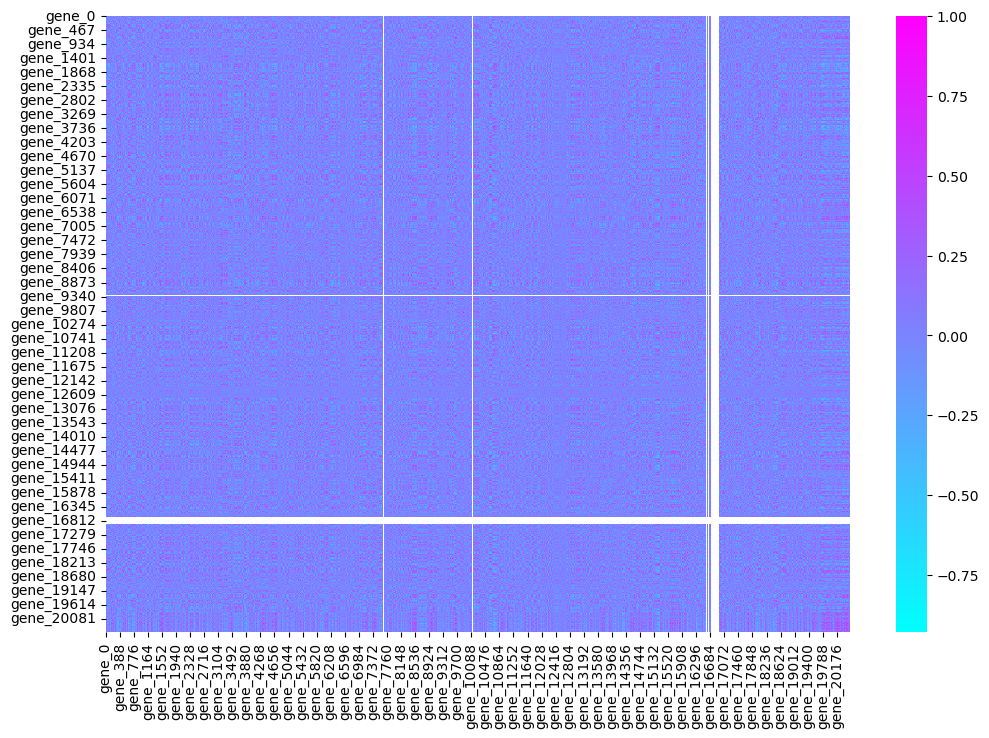

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='cool')

<AxesSubplot:>

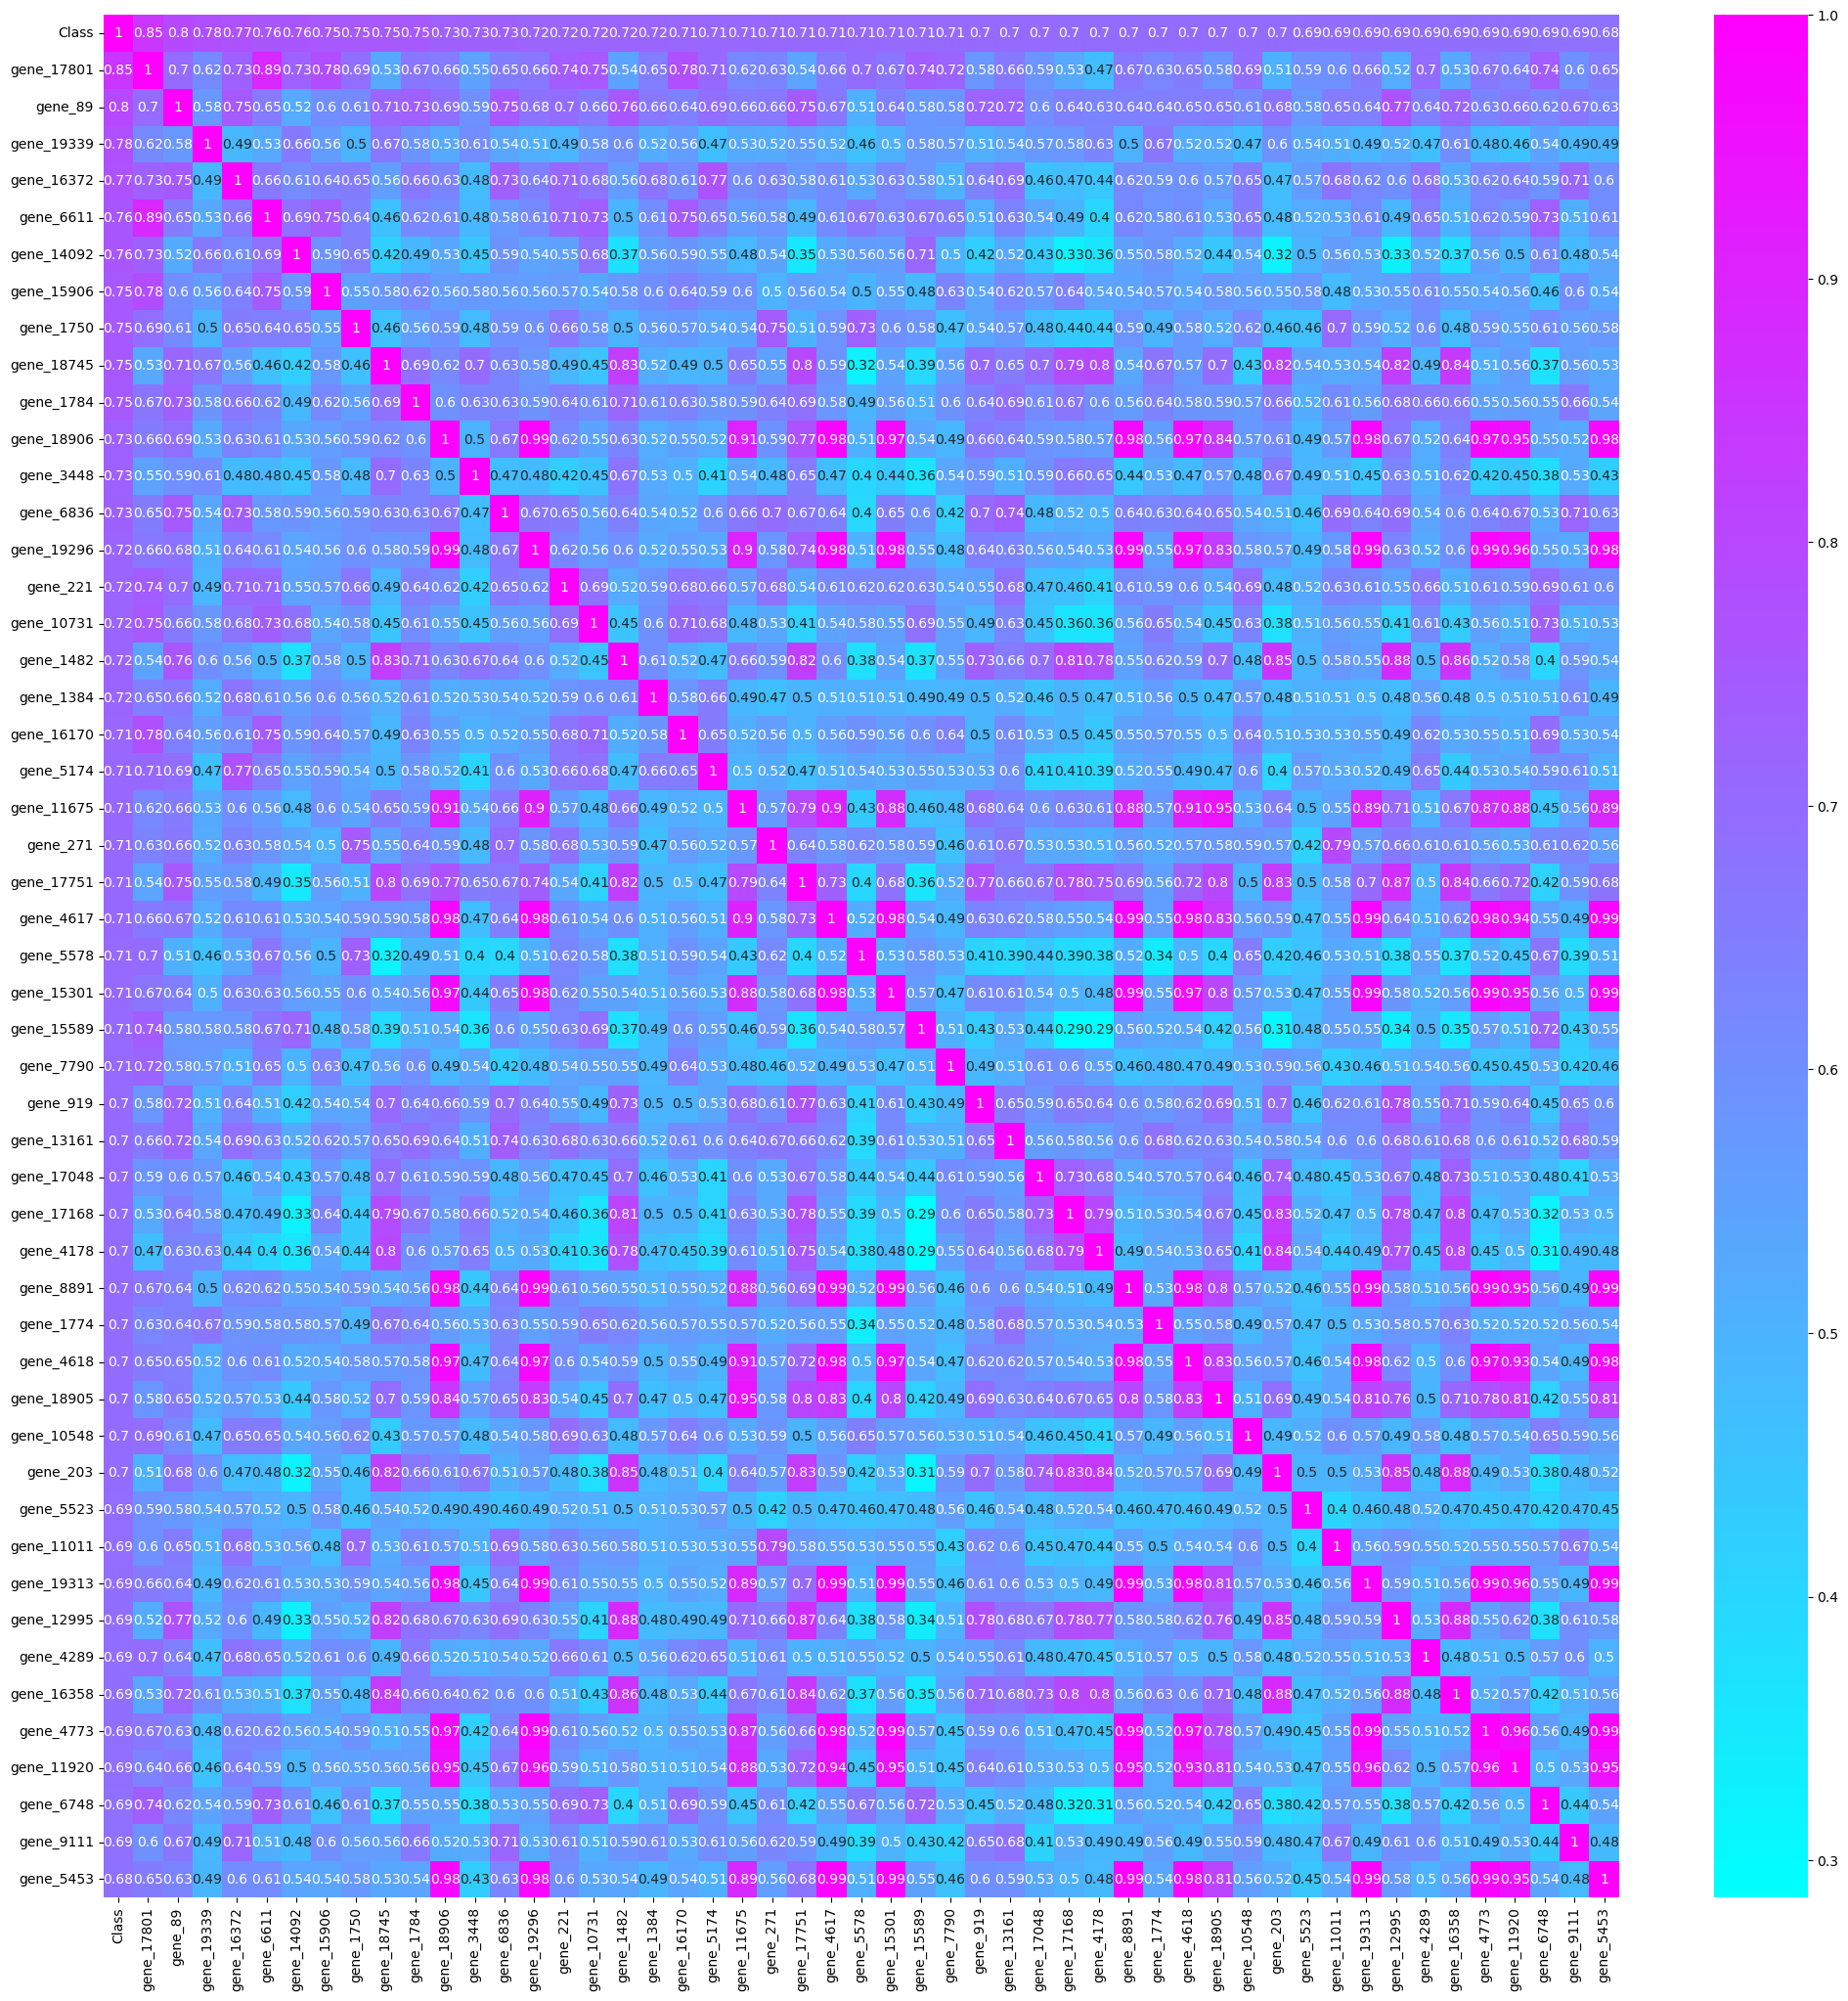

In [ ]:
columns_high_corr = correlation_matrix.abs().nlargest(51, 'Class')['Class'].index
correlation_matrix_reduced = correlation_matrix.loc[columns_high_corr, columns_high_corr].abs()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap = 'cool')

In [ ]:
print(columns_high_corr)

Index(['Class', 'gene_17801', 'gene_89', 'gene_19339', 'gene_16372',
       'gene_6611', 'gene_14092', 'gene_15906', 'gene_1750', 'gene_18745',
       'gene_1784', 'gene_18906', 'gene_3448', 'gene_6836', 'gene_19296',
       'gene_221', 'gene_10731', 'gene_1482', 'gene_1384', 'gene_16170',
       'gene_5174', 'gene_11675', 'gene_271', 'gene_17751', 'gene_4617',
       'gene_5578', 'gene_15301', 'gene_15589', 'gene_7790', 'gene_919',
       'gene_13161', 'gene_17048', 'gene_17168', 'gene_4178', 'gene_8891',
       'gene_1774', 'gene_4618', 'gene_18905', 'gene_10548', 'gene_203',
       'gene_5523', 'gene_11011', 'gene_19313', 'gene_12995', 'gene_4289',
       'gene_16358', 'gene_4773', 'gene_11920', 'gene_6748', 'gene_9111',
       'gene_5453'],
      dtype='object')


### Observations:
- The 50 most correlated features (genes) with the labels (type og cancer) are : gene_17801, gene_89, gene_19339, gene_16372, gene_6611, gene_14092, gene_15906, gene_1750, gene_18745, gene_1784, gene_18906, gene_3448, gene_6836, gene_19296, gene_221, gene_10731, gene_1482, gene_1384, gene_16170, gene_5174, gene_11675, gene_271, gene_17751, gene_4617, gene_5578, gene_15301, gene_15589, gene_7790, gene_919, gene_13161, gene_17048, gene_17168, gene_4178, gene_8891, gene_1774, gene_4618, gene_18905, gene_10548, gene_203, gene_5523, gene_11011, gene_19313, gene_12995, gene_4289, gene_16358', gene_4773, gene_11920, gene_6748, gene_9111, gene_5453.

#### Determination of the p-value of the 50 most correlated features (genes) with the labels (type of cancer) with the t-test

In [ ]:
for gene in columns_high_corr[1:]:
    print(f"The p-value after a t-test between {gene} and the label is {stats.ttest_ind(a=all_data_numerical[gene], b=all_data_numerical['Class'], equal_var=True)[1]}.")

In [ ]:
corr_sorted = correlation_matrix.abs().sort_values("Class", ascending=False)
corr_sorted.head(5)

gene_0    gene_1    gene_2    gene_3    gene_4  gene_5  \
Class       0.068750  0.159998  0.346244  0.125999  0.233125     NaN   
gene_17801  0.074768  0.113250  0.245579  0.022296  0.316135     NaN   
gene_89     0.045293  0.222457  0.311657  0.044083  0.280932     NaN   
gene_19339  0.035480  0.181802  0.371726  0.016549  0.011081     NaN   
gene_16372  0.067263  0.075799  0.172244  0.231744  0.367681     NaN   

              gene_6    gene_7    gene_8    gene_9  ...  gene_20522  \
Class       0.030793  0.047536  0.026261  0.051501  ...    0.240227   
gene_17801  0.014033  0.028600  0.049758  0.066777  ...    0.267427   
gene_89     0.038926  0.002813  0.042267  0.021330  ...    0.065781   
gene_19339  0.048389  0.112726  0.041713  0.010107  ...    0.261722   
gene_16372  0.078903  0.029071  0.030226  0.060480  ...    0.188217   

            gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
Class         0.003588    0.072732    0.112866    0.174382    0.006280   
gene_17801    0.041431    0.326207    0.054327    0.043093    0.086368   
gene_89       0.093949    0.059203    0.273951    0.248302    0.152336   
gene_19339    0.020842    0.002640    0.074796    0.099803    0.041120   
gene_16372    0.037565    0.162580    0.289993    0.155319    0.106730   

            gene_20528  gene_20529  gene_20530     Class  
Class         0.130842    0.080936    0.033728  1.000000  
gene_17801    0.218891    0.111996    0.020531  0.850083  
gene_89       0.089423    0.056284    0.008276  0.795129  
gene_19339    0.148692    0.029594    0.035886  0.779375  
gene_16372    0.076060    0.026327    0.009044  0.773608  

[5 rows x 20532 columns]

### Observations:
- With t-test, all the 50 most correlated features (genes) to the labels (type of cancer) have a p_value against the labels  less than 0.05. 
- This confirms that these 50 features are highly correlated with the labels.

#### Calculation of the p-values of all features (genes) against the labels (type of cancer)

In [ ]:
low_p_value_genes = []
for gene in corr_sorted.index:
    p_value = stats.ttest_ind(a=all_data_numerical[gene], b=all_data_numerical['Class'], equal_var=True)[1]
    if p_value < 0.05:
        low_p_value_genes.append(gene)
        print(f"The p-value between {gene} and the label is {p_value}.")
        
print(f"There are {len(low_p_value_genes)} genes with a p-value less than 0.05.")

### Observations:
- With the t-test, 20197 features (genes) are highly correlated to the labels.

## 2. Dimensionality reduction
### a) PCA

Applying and visualizing PCA with 2 components

Text(0, 0.5, 'Second Principal Component')

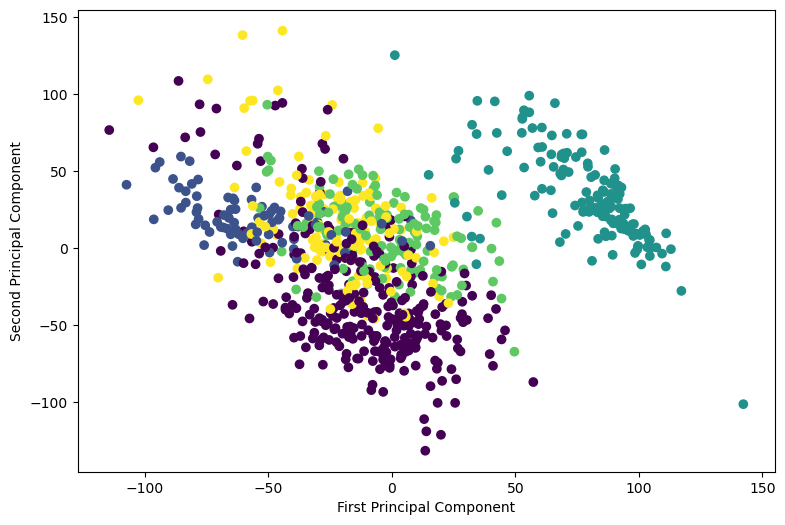

In [ ]:
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(scaled_data)

plt.figure(figsize=(9,6))
plt.scatter(data_pca_2[:,0],data_pca_2[:,1],c=labels_encod,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Observations: 
- The PCA method with 2 components is not a good fit for the datasets. Some clusters are overlapping.

Applying PCA dimensionality reduction with 95% of explained variance for the principal components.

In [ ]:
pca = PCA(n_components=.95)
data_pca = pca.fit_transform(scaled_data)

In [ ]:
data_pca.shape

(801, 530)

In [ ]:
pca.components_

array([[ 0.00097941, -0.00235639, -0.00496579, ...,  0.00233708,
         0.00195967,  0.00104891],
       [ 0.00230787, -0.00637287,  0.00046648, ..., -0.01493974,
        -0.00232062,  0.00100493],
       [-0.00025614,  0.00145302,  0.00602132, ...,  0.00300221,
         0.00704655, -0.00215189],
       ...,
       [-0.01017417, -0.0137492 , -0.00293082, ...,  0.00142603,
        -0.00029579, -0.0065031 ],
       [-0.00549048,  0.00068698, -0.01897842, ..., -0.00343555,
        -0.00065419, -0.00788982],
       [-0.00749196,  0.00522257,  0.00857452, ...,  0.00299659,
         0.01752075, -0.00684413]])

In [ ]:
pca.components_.shape

(530, 20531)

In [ ]:
pd.DataFrame(data_pca).head(5)

0          1          2          3          4          5    \
0 -57.446987  95.410981  74.301543 -12.166781   7.981831  36.157573   
1 -16.919430   0.732470 -64.072900  -2.095308 -25.426430  27.784178   
2 -70.345218 -19.303327  20.488240  48.102893  24.437757  17.462510   
3 -49.161591  -9.227586  61.243770  37.805744   1.038889  23.240002   
4 -18.132534 -51.327797  16.598116 -17.699201  26.389130  -1.551573   

         6          7          8          9    ...       520       521  \
0  -7.668542  19.951444   0.142216   3.035240  ... -2.741664  0.759257   
1 -16.132765 -17.031383 -22.023874 -27.923308  ...  0.179407 -3.873359   
2  20.706772 -47.626817 -28.647648 -12.784676  ... -0.141315 -0.705838   
3  -4.801039 -21.554809 -15.375067 -12.881511  ...  2.555190  1.110073   
4  -6.266101  12.336677  -4.233837  28.804476  ...  1.964941  4.139632   

        522       523       524       525       526       527       528  \
0  0.069311  1.190453 -0.168946 -2.505679  0.499165  0.548185 -1.501202   
1 -1.716351  1.062815 -0.991165 -3.409572 -0.367755  0.855043  4.956671   
2  1.227124 -0.055377  0.406485 -0.413498  0.549849  1.063323  1.023867   
3  2.633830  2.944072  1.410895  1.948946  3.714376 -2.717114 -0.832607   
4 -1.437741  2.040581 -0.174382 -0.132276 -1.026177 -3.027688  3.868726   

        529  
0 -1.723332  
1  0.068001  
2 -1.253420  
3  4.646922  
4 -0.282360  

[5 rows x 530 columns]

In [ ]:
pca.explained_variance_ratio_

array([0.10539781, 0.08754232, 0.07810081, 0.05165647, 0.04028932,
       0.02920881, 0.02354735, 0.02145299, 0.01632001, 0.01233899,
       0.01054096, 0.00894552, 0.00850433, 0.00752984, 0.00666611,
       0.0064694 , 0.00608615, 0.00585061, 0.00529366, 0.0051549 ,
       0.00489259, 0.00465834, 0.00454998, 0.00447636, 0.00424869,
       0.00418138, 0.00402427, 0.00393607, 0.00390401, 0.00358687,
       0.00357583, 0.00349978, 0.00337339, 0.00332523, 0.0032467 ,
       0.00320125, 0.00309221, 0.00295194, 0.00285026, 0.00280398,
       0.00277137, 0.00268945, 0.00266042, 0.00261041, 0.00258862,
       0.00255568, 0.0025224 , 0.0024917 , 0.00243814, 0.0023786 ,
       0.00233779, 0.00229684, 0.00226779, 0.00224909, 0.00217467,
       0.00214957, 0.00213074, 0.00210761, 0.00204805, 0.00204241,
       0.00199857, 0.00197631, 0.00197323, 0.00194865, 0.00192493,
       0.00184282, 0.00182154, 0.00179407, 0.00176827, 0.00176254,
       0.00172514, 0.00170721, 0.00169442, 0.00168177, 0.00164

### Observations:
- The PCA dimensionality reduction reduce the numbers of features from 20531 to 530 by combining the information of the 20531 genes into 530 features which are combinations of all the genes.

### b) LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(scaled_data, labels)
data_lda.shape

C:\Users\Aurore Prevot\anaconda3\envs\cv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(801, 4)

In [ ]:
pd.DataFrame(data_lda).head(5)

0          1         2         3
0 -7.958125 -10.922818  1.977301  0.584694
1 -0.301563   2.780898 -4.002351 -7.993575
2 -6.424952  -8.870978  1.488272  0.519171
3 -6.934259 -10.417199  3.695386 -0.343774
4 -2.872004   4.912284  2.841613  2.199768

### Observations:
- The number of features are reduced from 20531 to 4 with the LDA method. Thoes 4 features are combinations of all the genes.

### c) t-SNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, verbose=1)
data_tsne = tsne.fit_transform(scaled_data)
data_tsne.shape

C:\Users\Aurore Prevot\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Aurore Prevot\anaconda3\envs\cv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.021s...
[t-SNE] Computed neighbors for 801 samples in 0.157s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 40.641029
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.690811
[t-SNE] KL divergence after 1000 iterations: 0.823926


(801, 2)

### Observations:
- The number of features are reduced to 2 with the t-SNE method. Those 2 features are combinations of all genes.

#### Visualization of the results after applying the t-SNE method

Text(0, 0.5, 'Second Component')

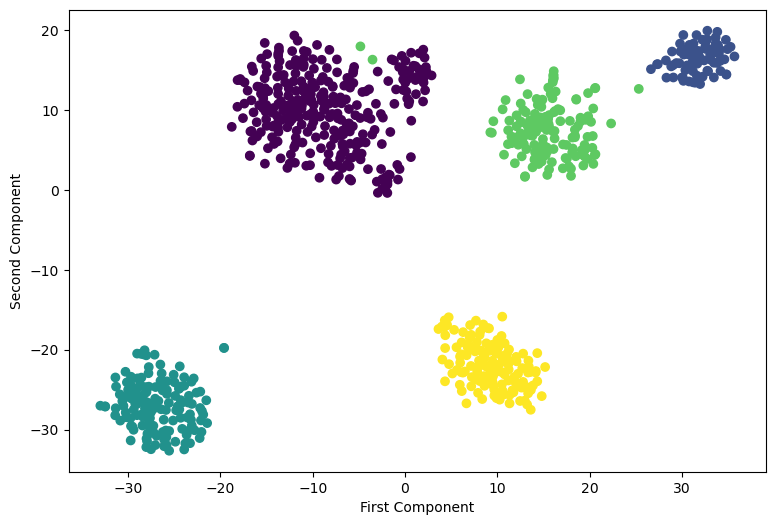

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=labels_encod,cmap='viridis')
plt.xlabel('First Component')
plt.ylabel('Second Component')

### d) Dropping low variance features and reducing highly correlated features

In [ ]:
data.describe().transpose()

count       mean       std       min        25%        50%  \
gene_0      801.0   0.026642  0.136850  0.000000   0.000000   0.000000   
gene_1      801.0   3.010909  1.200828  0.000000   2.299039   3.143687   
gene_2      801.0   3.095350  1.065601  0.000000   2.390365   3.127006   
gene_3      801.0   6.722305  0.638819  5.009284   6.303346   6.655893   
gene_4      801.0   9.813612  0.506537  8.435999   9.464466   9.791599   
...           ...        ...       ...       ...        ...        ...   
gene_20526  801.0  11.742228  0.670371  9.045255  11.315857  11.749802   
gene_20527  801.0  10.155271  0.580569  7.530141   9.836525  10.191207   
gene_20528  801.0   9.590726  0.563849  7.864533   9.244219   9.566511   
gene_20529  801.0   5.528177  2.073859  0.593975   4.092385   5.218618   
gene_20530  801.0   0.095411  0.364529  0.000000   0.000000   0.000000   

                  75%        max  
gene_0       0.000000   1.482332  
gene_1       3.883484   6.237034  
gene_2       3.802534   6.063484  
gene_3       7.038447  10.129528  
gene_4      10.142324  11.355621  
...               ...        ...  
gene_20526  12.177852  13.715361  
gene_20527  10.578561  11.675653  
gene_20528   9.917888  12.813320  
gene_20529   6.876382  11.205836  
gene_20530   0.000000   5.254133  

[20531 rows x 8 columns]

In [ ]:
list_null_var = []

for column in data.columns:
    if data[column].var() <= 0:
        list_null_var.append(column)

print(list_null_var)
print(len(list_null_var))

['gene_5', 'gene_23', 'gene_4370', 'gene_4808', 'gene_4809', 'gene_4814', 'gene_4816', 'gene_4817', 'gene_4831', 'gene_5288', 'gene_7661', 'gene_7662', 'gene_7663', 'gene_7664', 'gene_7665', 'gene_8121', 'gene_9304', 'gene_9306', 'gene_9314', 'gene_9316', 'gene_9320', 'gene_9452', 'gene_10121', 'gene_11958', 'gene_13991', 'gene_14158', 'gene_14159', 'gene_14161', 'gene_15138', 'gene_15140', 'gene_15141', 'gene_15446', 'gene_16566', 'gene_16568', 'gene_16569', 'gene_16571', 'gene_16575', 'gene_16578', 'gene_16579', 'gene_16604', 'gene_16634', 'gene_16637', 'gene_16677', 'gene_16697', 'gene_16698', 'gene_16699', 'gene_16700', 'gene_16701', 'gene_16702', 'gene_16704', 'gene_16705', 'gene_16706', 'gene_16707', 'gene_16708', 'gene_16709', 'gene_16710', 'gene_16711', 'gene_16712', 'gene_16713', 'gene_16714', 'gene_16715', 'gene_16716', 'gene_16717', 'gene_16718', 'gene_16719', 'gene_16720', 'gene_16721', 'gene_16722', 'gene_16723', 'gene_16724', 'gene_16725', 'gene_16726', 'gene_16727', 'gen

In [ ]:
for gene in list_null_var:
    if len(data[gene].value_counts().index) == 1:
        print(f"{gene} has the same value ({data[gene].value_counts().index[0]}) for the {data[gene].value_counts()[0]} samples.")
    else:
        print(f"{gene} has more than one value.")

### Observations:
- 267 features (genes) have a null variance and the same value (0) for each samples.
- Those 267 features will be remove from the data.

In [ ]:
all_data_reduced_1 = all_data_numerical.drop(list_null_var, axis=1, inplace=False)
all_data_reduced_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20265 entries, gene_0 to Class
dtypes: float64(20264), int32(1)
memory usage: 123.9+ MB


In [ ]:
correlation_matrix_2 = all_data_reduced_1.corr()

In [ ]:
list_no_corr = []
for column in correlation_matrix_2.columns:
    if np.isnan(correlation_matrix_2.loc["Class", column]) == True:
        print(f' Class has no correlation with {column}')
        list_no_corr.append(column)

print(list_no_corr)
print(len(list_no_corr))

[]
0


### Observations:
- All the features (genes) are correlated to the class (type of cancer).

<AxesSubplot:>

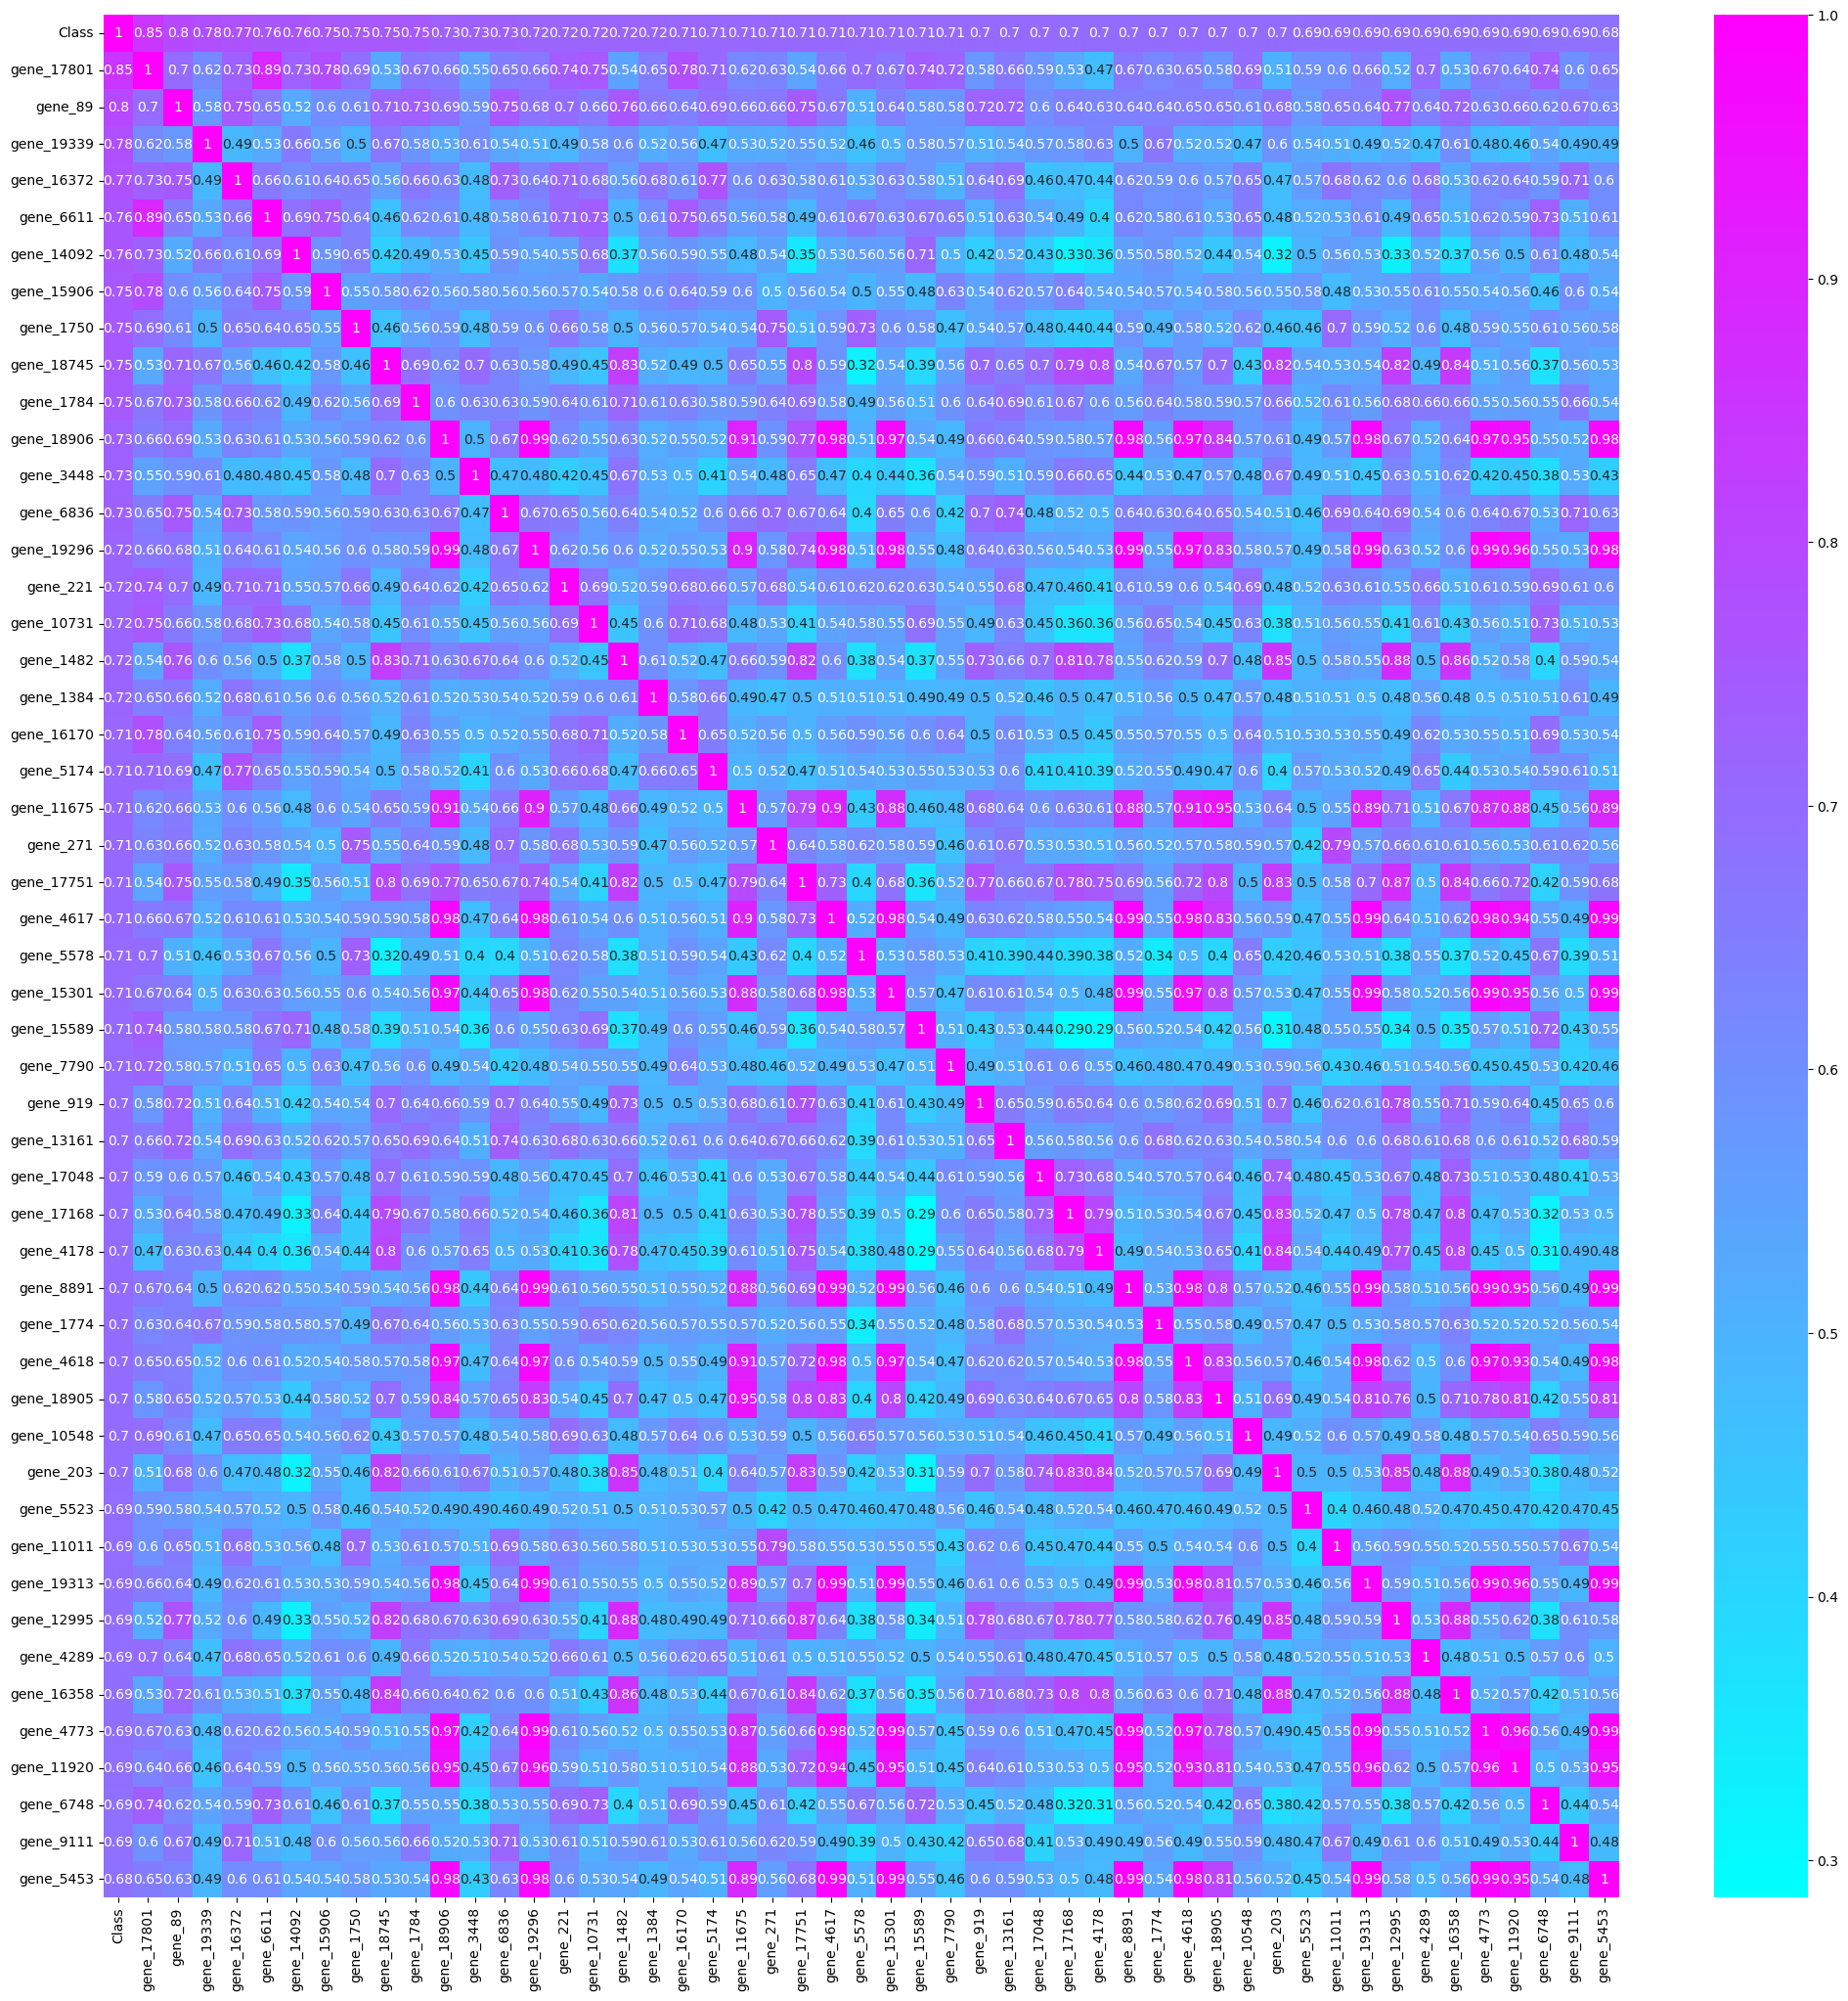

In [ ]:
columns_high_corr_2 = correlation_matrix_2.abs().nlargest(51, 'Class')['Class'].index
correlation_matrix_reduced_2 = correlation_matrix_2.loc[columns_high_corr_2, columns_high_corr_2].abs()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix_reduced_2, annot=True, cmap = 'cool')

In [ ]:
correlation_matrix_2_abs = correlation_matrix_2.abs()

In [ ]:
for row in correlation_matrix_2.index:
    list_corr = []
    for column in correlation_matrix_2.columns:
        if correlation_matrix_2_abs.loc[row, column] >= 0.7 and row != column:
            list_corr.append(column)
    if len(list_corr) > 0:
        print(f'{row} is highly correlated to {list_corr}')

### Observations:
- Some features (genes) are highly correlated together.
- The most features correlated to the class (type of cancer) will be kept.

In [ ]:
genes_to_keep = []
for row in correlation_matrix_2.index:
    dict_corr = {row: correlation_matrix_2.loc["Class", row]}
    for column in correlation_matrix_2.columns:
        if correlation_matrix_2_abs.loc[row, column] >= 0.7 and row != column:
            dict_corr[column] = correlation_matrix_2.loc["Class", column]
    to_keep = max(dict_corr, key=dict_corr.get) 
    if to_keep not in genes_to_keep:
        genes_to_keep.append(to_keep)

print(sorted(genes_to_keep)) 
print(len(genes_to_keep))

['Class', 'gene_0', 'gene_1', 'gene_10', 'gene_1000', 'gene_10000', 'gene_10002', 'gene_10004', 'gene_10005', 'gene_10006', 'gene_10007', 'gene_10008', 'gene_10009', 'gene_1001', 'gene_10011', 'gene_10012', 'gene_10015', 'gene_10017', 'gene_10018', 'gene_10019', 'gene_1002', 'gene_10021', 'gene_10022', 'gene_10024', 'gene_10025', 'gene_10026', 'gene_10027', 'gene_10028', 'gene_10029', 'gene_1003', 'gene_10030', 'gene_10031', 'gene_10032', 'gene_10033', 'gene_10034', 'gene_10036', 'gene_10037', 'gene_10038', 'gene_10039', 'gene_10041', 'gene_10042', 'gene_10044', 'gene_10045', 'gene_10046', 'gene_10047', 'gene_10048', 'gene_10049', 'gene_1005', 'gene_10050', 'gene_10052', 'gene_10053', 'gene_10054', 'gene_10055', 'gene_10056', 'gene_10057', 'gene_10058', 'gene_1006', 'gene_10060', 'gene_10061', 'gene_10062', 'gene_10064', 'gene_10066', 'gene_10067', 'gene_10069', 'gene_10071', 'gene_10072', 'gene_10073', 'gene_10074', 'gene_10075', 'gene_10076', 'gene_10077', 'gene_10078', 'gene_10079',

In [ ]:
all_data_numerical_reduced_final = all_data_numerical[genes_to_keep]
all_data_numerical_reduced_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 15804 entries, gene_0 to gene_20530
dtypes: float64(15803), int32(1)
memory usage: 96.6+ MB


In [ ]:
all_data_numerical_reduced_final.head(5)

gene_0    gene_1  gene_10174    gene_3     gene_4  gene_11646  \
sample_0     0.0  2.017209   11.800419  5.478487  10.431999    6.180391   
sample_1     0.0  0.592732    7.900517  7.586157   9.623011    4.294834   
sample_2     0.0  3.511759   10.297684  6.881787   9.870730    5.570870   
sample_3     0.0  3.663618   11.231059  6.659068  10.196184    6.192133   
sample_4     0.0  2.655741    8.699586  6.539454   9.738265    4.907237   

            gene_7  gene_8  gene_9   gene_10  ...  gene_20515  gene_20516  \
sample_0  0.591871     0.0     0.0  0.591871  ...    7.175175    9.249369   
sample_1  0.000000     0.0     0.0  0.000000  ...    8.572901    7.549030   
sample_2  0.452595     0.0     0.0  0.000000  ...    7.716332    6.745802   
sample_3  0.434882     0.0     0.0  0.000000  ...    8.963286    7.744699   
sample_4  0.360982     0.0     0.0  0.000000  ...    8.948989    7.010366   

          gene_20518  gene_20522  gene_20523  gene_20524  gene_20526  \
sample_0    8.045563    8.210257    9.723516    7.220030   12.003135   
sample_1    9.458940    7.323865    9.740931    6.256586   12.674552   
sample_2    8.602350    8.127123   10.908640    5.401607    9.045255   
sample_3    8.981473    8.792959   10.141520    8.942805   11.392682   
sample_4    8.950646    8.891425   10.373790    7.181162   11.922439   

          gene_19268  gene_20529  gene_20530  
sample_0   10.214003    5.286759         0.0  
sample_1    9.408572    2.094168         0.0  
sample_2   11.065450    1.683023         0.0  
sample_3   10.572890    3.292001         0.0  
sample_4    9.768674    5.110372         0.0  

[5 rows x 15804 columns]

### Observations:
- For each feature, the features with a correlation coefficient more than 0.7 have been filtered and the feature with the highest correlation coefficient with the label has been selected.
- With a threshold of 0.7 on the correlation coefficient, 15803 features (genes) of the 20264 will be kept.
- With more insight on the domaine knoledge, the threshold may be adjusted.

## 3. Clustering the genes and samples

### A)  K_means clustering


In [ ]:
def elbow_curve(data):
    sse = []
    k_range = range(1,16)
    for k in k_range:
        km = KMeans(n_clusters=k)
        km.fit(data)
        sse.append(km.inertia_)

    plt.title("K-means elbow curve")
    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    plt.plot(k_range,sse)


#### 1) Clustering the genes across all samples


In [ ]:
genes_data = data.T
genes_data.head(5)

sample_0  sample_1  sample_2   sample_3  sample_4  sample_5  \
gene_0   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
gene_1   2.017209  0.592732  3.511759   3.663618  2.655741  3.467853   
gene_2   3.265527  1.588421  4.327199   4.507649  2.821547  3.581918   
gene_3   5.478487  7.586157  6.881787   6.659068  6.539454  6.620243   
gene_4  10.431999  9.623011  9.870730  10.196184  9.738265  9.706829   

        sample_6  sample_7   sample_8  sample_9  ...  sample_791  sample_792  \
gene_0  0.000000  0.000000   0.000000  0.000000  ...    0.000000    0.000000   
gene_1  1.224966  2.854853   3.992125  3.642494  ...    3.080061    4.337404   
gene_2  1.691177  1.750478   2.772730  4.423558  ...    2.815739    2.597126   
gene_3  6.572007  7.226720   6.546692  6.849511  ...    6.209617    6.070379   
gene_4  9.640511  9.758691  10.488252  9.464466  ...    9.644469    9.863990   

        sample_793  sample_794  sample_795  sample_796  sample_797  \
gene_0    0.000000    0.000000    0.436588    0.000000    0.000000   
gene_1    2.068224    4.288388    4.472176    1.865642    3.942955   
gene_2    0.857663    3.452490    4.908746    2.718197    4.453807   
gene_3    6.218739    7.209151    5.937848    7.350099    6.346597   
gene_4   10.623068    9.875620    9.330901   10.006003   10.056868   

        sample_798  sample_799  sample_800  
gene_0    0.000000    0.000000    0.000000  
gene_1    3.249582    2.590339    2.325242  
gene_2    3.707492    2.787976    3.805932  
gene_3    8.185901    7.318624    6.530246  
gene_4    9.504082    9.987136    9.560367  

[5 rows x 801 columns]

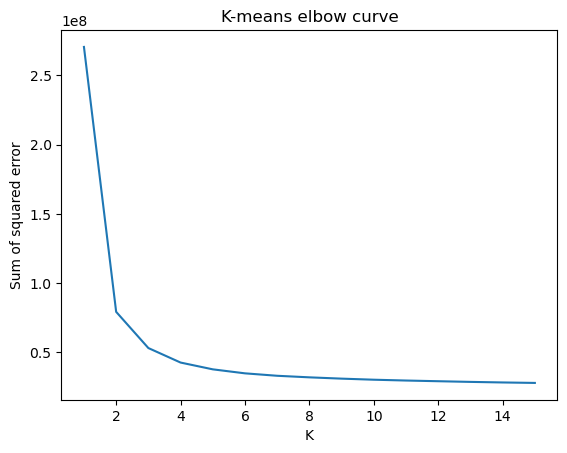

In [ ]:
elbow_curve(genes_data)

In [ ]:
km = KMeans(n_clusters=3)
genes_clusters_km = km.fit_transform(genes_data)
genes_clusters_km.shape

(20531, 3)

In [ ]:
pd.DataFrame(genes_clusters_km).head(5)

0           1           2
0  279.947747   35.028309  175.637678
1  198.358985   60.326409   97.202825
2  195.390209   60.118614   93.636736
3   92.300742  156.328593   26.104748
4   15.147458  243.144847  103.339568

In [ ]:
clusters_km = km.predict(genes_data)
genes_clustered_km = genes_data.copy()
genes_clustered_km['Cluster'] = clusters_km
genes_clustered_km.head(5)

sample_0  sample_1  sample_2   sample_3  sample_4  sample_5  \
gene_0   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
gene_1   2.017209  0.592732  3.511759   3.663618  2.655741  3.467853   
gene_2   3.265527  1.588421  4.327199   4.507649  2.821547  3.581918   
gene_3   5.478487  7.586157  6.881787   6.659068  6.539454  6.620243   
gene_4  10.431999  9.623011  9.870730  10.196184  9.738265  9.706829   

        sample_6  sample_7   sample_8  sample_9  ...  sample_792  sample_793  \
gene_0  0.000000  0.000000   0.000000  0.000000  ...    0.000000    0.000000   
gene_1  1.224966  2.854853   3.992125  3.642494  ...    4.337404    2.068224   
gene_2  1.691177  1.750478   2.772730  4.423558  ...    2.597126    0.857663   
gene_3  6.572007  7.226720   6.546692  6.849511  ...    6.070379    6.218739   
gene_4  9.640511  9.758691  10.488252  9.464466  ...    9.863990   10.623068   

        sample_794  sample_795  sample_796  sample_797  sample_798  \
gene_0    0.000000    0.436588    0.000000    0.000000    0.000000   
gene_1    4.288388    4.472176    1.865642    3.942955    3.249582   
gene_2    3.452490    4.908746    2.718197    4.453807    3.707492   
gene_3    7.209151    5.937848    7.350099    6.346597    8.185901   
gene_4    9.875620    9.330901   10.006003   10.056868    9.504082   

        sample_799  sample_800  Cluster  
gene_0    0.000000    0.000000        1  
gene_1    2.590339    2.325242        1  
gene_2    2.787976    3.805932        1  
gene_3    7.318624    6.530246        2  
gene_4    9.987136    9.560367        0  

[5 rows x 802 columns]

In [ ]:
genes_cluster_0_km = genes_clustered_km[genes_clustered_km.Cluster==0]
print(genes_cluster_0_km.shape)
genes_cluster_0_km.head(5)

(9191, 802)


sample_0   sample_1   sample_2   sample_3   sample_4   sample_5  \
gene_4   10.431999   9.623011   9.870730  10.196184   9.738265   9.706829   
gene_19   5.619994  11.055208   8.210248   8.306317  10.149150   6.842765   
gene_22   9.796088  10.070470   8.970920   8.524616   8.047238   7.663935   
gene_27  10.839070   8.522476   9.861616   9.511573   8.821535   9.628387   
gene_34  13.714396  13.286240  10.731098  12.659474  13.556734  14.021153   

          sample_6   sample_7   sample_8   sample_9  ...  sample_792  \
gene_4    9.640511   9.758691  10.488252   9.464466  ...    9.863990   
gene_19   7.424200   7.373431  10.147625   7.856780  ...    9.887388   
gene_22   9.973640   8.922008   8.343976   6.020051  ...    9.183437   
gene_27   9.508977   9.406279   7.600537   9.871312  ...    8.117939   
gene_34  15.597753  16.798586  13.531004  12.578644  ...   12.275903   

         sample_793  sample_794  sample_795  sample_796  sample_797  \
gene_4    10.623068    9.875620    9.330901   10.006003   10.056868   
gene_19    9.183588    9.316162    9.859712    7.763611    9.650467   
gene_22    9.341743    6.810816    7.470358    6.283574    8.113409   
gene_27    8.349613    9.642637    8.712527    9.168667   11.181065   
gene_34   12.515431   15.389164   14.906101   12.275895   12.910624   

         sample_798  sample_799  sample_800  Cluster  
gene_4     9.504082    9.987136    9.560367        0  
gene_19    9.326032    7.987867    9.261148        0  
gene_22    7.439839    9.770383    7.880000        0  
gene_27    9.660764   10.163713    9.288070        0  
gene_34   14.593625   13.648358   14.702395        0  

[5 rows x 802 columns]

In [ ]:
genes_cluster_1_km = genes_clustered_km[genes_clustered_km.Cluster==1]
print(genes_cluster_1_km.shape)
genes_cluster_1_km.head(5)

(5908, 802)


sample_0  sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  \
gene_0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
gene_1  2.017209  0.592732  3.511759  3.663618  2.655741  3.467853  1.224966   
gene_2  3.265527  1.588421  4.327199  4.507649  2.821547  3.581918  1.691177   
gene_5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
gene_7  0.591871  0.000000  0.452595  0.434882  0.360982  0.000000  0.531868   

        sample_7  sample_8  sample_9  ...  sample_792  sample_793  sample_794  \
gene_0  0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
gene_1  2.854853  3.992125  3.642494  ...    4.337404    2.068224    4.288388   
gene_2  1.750478  2.772730  4.423558  ...    2.597126    0.857663    3.452490   
gene_5  0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
gene_7  0.000000  0.352307  0.724214  ...    1.269512    0.789354    0.416948   

        sample_795  sample_796  sample_797  sample_798  sample_799  \
gene_0    0.436588    0.000000    0.000000    0.000000    0.000000   
gene_1    4.472176    1.865642    3.942955    3.249582    2.590339   
gene_2    4.908746    2.718197    4.453807    3.707492    2.787976   
gene_5    0.000000    0.000000    0.000000    0.000000    0.000000   
gene_7    0.429107    0.496922    0.000000    1.811101    0.000000   

        sample_800  Cluster  
gene_0    0.000000        1  
gene_1    2.325242        1  
gene_2    3.805932        1  
gene_5    0.000000        1  
gene_7    0.000000        1  

[5 rows x 802 columns]

In [ ]:
genes_cluster_2_km = genes_clustered_km[genes_clustered_km.Cluster==2]
print(genes_cluster_2_km.shape)
genes_cluster_2_km.head(5)

(5432, 802)


sample_0  sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  \
gene_3   5.478487  7.586157  6.881787  6.659068  6.539454  6.620243  6.572007   
gene_6   7.175175  6.816049  6.972130  7.843375  6.566967  7.758510  6.754888   
gene_28  6.620204  1.174790  7.680507  6.469165  5.861429  7.220446  4.485420   
gene_29  9.513538  4.926991  3.119439  7.029895  7.755709  7.012759  8.633177   
gene_32  7.764805  5.819832  7.899526  6.800641  5.570241  8.002236  5.899400   

         sample_7  sample_8  sample_9  ...  sample_792  sample_793  \
gene_3   7.226720  6.546692  6.849511  ...    6.070379    6.218739   
gene_6   5.952103  7.690222  7.947216  ...    7.095112    6.634082   
gene_28  4.664710  2.824931  6.118104  ...    5.785977    5.638025   
gene_29  5.705193  4.934233  6.284211  ...    7.204757    7.730409   
gene_32  7.012714  5.244617  5.907184  ...    5.743526    7.216387   

         sample_794  sample_795  sample_796  sample_797  sample_798  \
gene_3     7.209151    5.937848    7.350099    6.346597    8.185901   
gene_6     7.332717    7.254944    6.764792    7.320331    7.536589   
gene_28    6.869896    5.098382    6.139531    3.480317    4.362533   
gene_29    4.366413    5.234310    7.641965    9.218353    7.553959   
gene_32    6.919984    6.921460    6.563730    6.399556    6.220460   

         sample_799  sample_800  Cluster  
gene_3     7.318624    6.530246        2  
gene_6     9.213464    7.957027        2  
gene_28    5.514419    6.164110        2  
gene_29    6.584029    5.639365        2  
gene_32    6.997078    7.119304        2  

[5 rows x 802 columns]

### Observations:
 - The best number of clusters for all the genes across all samples is 3.
 - After k-means clustering, the 3 clusters have: 5908 genes (with similar values), 9191 genes and 5432 genes.

#### 2) Clustering the genes across samples of each cancer type
##### Cancer type 1: BRCA

In [ ]:
data_cancer_1 = all_data[all_data.Class=="BRCA"].T
data_cancer_1 = data_cancer_1.drop(["Class"], axis=0)
print(data_cancer_1.shape)
data_cancer_1.head(5)

(20531, 300)


sample_4   sample_8  sample_10  sample_13  sample_14 sample_15  \
gene_0       0.0        0.0        0.0        0.0        0.0       0.0   
gene_1  2.655741   3.992125   3.492071   1.551048   1.964842  2.901379   
gene_2  2.821547    2.77273   3.553373   3.529846    2.18301  3.685368   
gene_3  6.539454   6.546692   7.151707   6.326825   6.596832  6.669665   
gene_4  9.738265  10.488252  10.253446  10.633849  10.248141  9.999098   

       sample_20 sample_23 sample_27 sample_28  ... sample_775 sample_782  \
gene_0       0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1  2.066916  3.121844  0.657091  3.670081  ...   1.584337   3.031942   
gene_2  2.619953  2.473943  1.026304  3.382792  ...   2.610629   2.575554   
gene_3  6.757997  7.119616  5.411196  7.581939  ...   6.813538   6.403079   
gene_4  11.12394  10.73249  9.601388  9.386658  ...   9.368515  10.485024   

       sample_784 sample_785 sample_787 sample_790 sample_791 sample_792  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.656016   2.752963   4.315436   2.301734   3.080061   4.337404   
gene_2   1.746958   1.960549   4.398385    1.81455   2.815739   2.597126   
gene_3    6.64106   5.748145   6.273313   7.013462   6.209617   6.070379   
gene_4  10.519164  10.248912   10.34689   9.750047   9.644469    9.86399   

       sample_793 sample_796  
gene_0        0.0        0.0  
gene_1   2.068224   1.865642  
gene_2   0.857663   2.718197  
gene_3   6.218739   7.350099  
gene_4  10.623068  10.006003  

[5 rows x 300 columns]

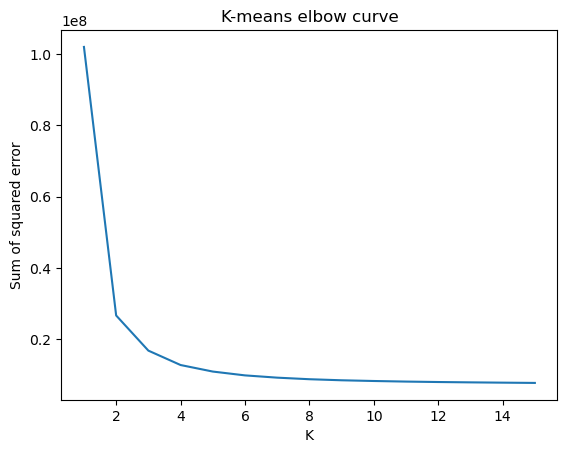

In [ ]:
elbow_curve(data_cancer_1)

In [ ]:
km_1 = KMeans(n_clusters=3)
clusters_km1 = km_1.fit_predict(data_cancer_1)
data_cancer_1_clustered_km = data_cancer_1.copy()
data_cancer_1_clustered_km["Cluster"] = clusters_km1
data_cancer_1_clustered_km.head(5)

sample_4   sample_8  sample_10  sample_13  sample_14 sample_15  \
gene_0       0.0        0.0        0.0        0.0        0.0       0.0   
gene_1  2.655741   3.992125   3.492071   1.551048   1.964842  2.901379   
gene_2  2.821547    2.77273   3.553373   3.529846    2.18301  3.685368   
gene_3  6.539454   6.546692   7.151707   6.326825   6.596832  6.669665   
gene_4  9.738265  10.488252  10.253446  10.633849  10.248141  9.999098   

       sample_20 sample_23 sample_27 sample_28  ... sample_782 sample_784  \
gene_0       0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1  2.066916  3.121844  0.657091  3.670081  ...   3.031942   2.656016   
gene_2  2.619953  2.473943  1.026304  3.382792  ...   2.575554   1.746958   
gene_3  6.757997  7.119616  5.411196  7.581939  ...   6.403079    6.64106   
gene_4  11.12394  10.73249  9.601388  9.386658  ...  10.485024  10.519164   

       sample_785 sample_787 sample_790 sample_791 sample_792 sample_793  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.752963   4.315436   2.301734   3.080061   4.337404   2.068224   
gene_2   1.960549   4.398385    1.81455   2.815739   2.597126   0.857663   
gene_3   5.748145   6.273313   7.013462   6.209617   6.070379   6.218739   
gene_4  10.248912   10.34689   9.750047   9.644469    9.86399  10.623068   

       sample_796 Cluster  
gene_0        0.0       1  
gene_1   1.865642       1  
gene_2   2.718197       1  
gene_3   7.350099       2  
gene_4  10.006003       0  

[5 rows x 301 columns]

In [ ]:
data_cancer_1_cluster_0_km = data_cancer_1_clustered_km[data_cancer_1_clustered_km.Cluster==0]
print(data_cancer_1_cluster_0_km.shape)
data_cancer_1_cluster_0_km.head(5)

(9175, 301)


sample_4   sample_8  sample_10  sample_13  sample_14  sample_15  \
gene_4    9.738265  10.488252  10.253446  10.633849  10.248141   9.999098   
gene_19   10.14915  10.147625   7.965224   8.526534   7.993499   8.392201   
gene_22   8.047238   8.343976   8.115408  10.717848   9.580091    8.25743   
gene_27   8.821535   7.600537   9.540533   11.25076    9.03072   8.472504   
gene_34  13.556734  13.531004  13.927871  12.882658  11.795273  13.915562   

         sample_20 sample_23 sample_27  sample_28  ... sample_782 sample_784  \
gene_4    11.12394  10.73249  9.601388   9.386658  ...  10.485024  10.519164   
gene_19   8.923743    7.6483  9.087505   9.380355  ...   8.113435   9.288271   
gene_22  10.103353  9.803679  6.926296   6.143283  ...   9.391585   7.917438   
gene_27   7.433101  8.820045   8.81254   8.365063  ...   8.225222   9.281184   
gene_34  13.056401  9.710345  13.43262  12.357711  ...  14.244282  12.745489   

        sample_785 sample_787 sample_790 sample_791 sample_792 sample_793  \
gene_4   10.248912   10.34689   9.750047   9.644469    9.86399  10.623068   
gene_19  10.776038   9.119942   8.335922  10.249777   9.887388   9.183588   
gene_22    8.49758   8.332681    9.25842   5.951583   9.183437   9.341743   
gene_27   9.328062   8.538783   9.567538   7.482719   8.117939   8.349613   
gene_34   13.55647  12.027543  13.473579  13.752412  12.275903  12.515431   

        sample_796 Cluster  
gene_4   10.006003       0  
gene_19   7.763611       0  
gene_22   6.283574       0  
gene_27   9.168667       0  
gene_34  12.275895       0  

[5 rows x 301 columns]

In [ ]:
data_cancer_1_cluster_1_km = data_cancer_1_clustered_km[data_cancer_1_clustered_km.Cluster==1]
print(data_cancer_1_cluster_1_km.shape)
data_cancer_1_cluster_1_km.head(5)

(5984, 301)


sample_4  sample_8 sample_10 sample_13 sample_14 sample_15 sample_20  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  2.655741  3.992125  3.492071  1.551048  1.964842  2.901379  2.066916   
gene_2  2.821547   2.77273  3.553373  3.529846   2.18301  3.685368  2.619953   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7  0.360982  0.352307       0.0       0.0  0.441483       0.0       0.0   

       sample_23 sample_27 sample_28  ... sample_782 sample_784 sample_785  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.121844  0.657091  3.670081  ...   3.031942   2.656016   2.752963   
gene_2  2.473943  1.026304  3.382792  ...   2.575554   1.746958   1.960549   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_7       0.0       0.0       0.0  ...        0.0        0.0        0.0   

       sample_787 sample_790 sample_791 sample_792 sample_793 sample_796  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   4.315436   2.301734   3.080061   4.337404   2.068224   1.865642   
gene_2   4.398385    1.81455   2.815739   2.597126   0.857663   2.718197   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7   1.683786   0.642193        0.0   1.269512   0.789354   0.496922   

       Cluster  
gene_0       1  
gene_1       1  
gene_2       1  
gene_5       1  
gene_7       1  

[5 rows x 301 columns]

In [ ]:
data_cancer_1_cluster_2_km = data_cancer_1_clustered_km[data_cancer_1_clustered_km.Cluster==2]
print(data_cancer_1_cluster_2_km.shape)
data_cancer_1_cluster_2_km.head(5)

(5372, 301)


sample_4  sample_8 sample_10 sample_13 sample_14 sample_15 sample_20  \
gene_3   6.539454  6.546692  7.151707  6.326825  6.596832  6.669665  6.757997   
gene_6   6.566967  7.690222  8.301258  8.944659  7.087251  6.948834  5.415674   
gene_28  5.861429  2.824931  7.617298  4.932496  7.468868  7.402219  1.666711   
gene_29  7.755709  4.934233  8.353231  8.156048  8.245191  7.690284  6.098295   
gene_32  5.570241  5.244617  7.342919  7.041024  5.618142  5.151347  6.919638   

        sample_23 sample_27 sample_28  ... sample_782 sample_784 sample_785  \
gene_3   7.119616  5.411196  7.581939  ...   6.403079    6.64106   5.748145   
gene_6   5.506031  6.263874  7.140523  ...   7.549723    6.80814   7.487173   
gene_28  7.134057  4.289665   3.05252  ...   3.978653    1.34022   5.441151   
gene_29  9.033159  9.842823  5.239356  ...   7.466227   6.896865   8.009414   
gene_32  5.741621  5.568728  6.028881  ...   6.879363   6.977417    8.05247   

        sample_787 sample_790 sample_791 sample_792 sample_793 sample_796  \
gene_3    6.273313   7.013462   6.209617   6.070379   6.218739   7.350099   
gene_6    7.770809   7.808366    6.35198   7.095112   6.634082   6.764792   
gene_28    6.14927   3.675206   5.951583   5.785977   5.638025   6.139531   
gene_29   7.795001   5.805873   6.029831   7.204757   7.730409   7.641965   
gene_32   7.016585   5.911984   6.934163   5.743526   7.216387    6.56373   

        Cluster  
gene_3        2  
gene_6        2  
gene_28       2  
gene_29       2  
gene_32       2  

[5 rows x 301 columns]

### Observations:
- The best number of clusters for the genes for cancer type 1, BRCA, is 3.
- After k-means clustering, the 3 clusters have: 9176 genes (with similar values), 5984 genes and 5371.


##### Cancer type 2: COAD

In [ ]:
data_cancer_2 = all_data[all_data.Class=="COAD"].T
data_cancer_2 = data_cancer_2.drop(["Class"], axis=0)
print(data_cancer_2.shape)
data_cancer_2.head(5)

(20531, 78)


sample_26 sample_47  sample_54 sample_57  sample_65  sample_79  \
gene_0        0.0       0.0        0.0       0.0        0.0        0.0   
gene_1   2.325242   3.44619   2.554196  3.667699   3.821935   3.219029   
gene_2   3.247092  3.620962   1.296134  3.083179   3.717605   2.284781   
gene_3   8.174007  7.171917   8.770277  7.997292     7.5931   8.124178   
gene_4  10.065053  9.796559  10.462901  9.516886  10.205964  10.386132   

        sample_96 sample_107 sample_130 sample_132  ... sample_670 sample_692  \
gene_0    0.54409        0.0        0.0        0.0  ...        0.0        0.0   
gene_1   2.231647    4.18593   2.900548   1.624335  ...   5.119609    4.37121   
gene_2   3.833133   4.003944   3.695315   2.880039  ...   2.836369   3.979833   
gene_3   7.077296   7.827019   7.956126   7.849242  ...   7.069734   7.773647   
gene_4  10.795228  10.202038  10.168258   9.961128  ...   9.548256  10.222396   

       sample_693 sample_713 sample_732 sample_745 sample_755 sample_766  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.757237   1.951215   2.297866   3.487692    5.21595   3.351332   
gene_2   2.416191   2.939603   3.468987   4.071145   3.787735   3.512277   
gene_3   7.349162   7.099474   8.253569   8.695938   7.986786   7.927849   
gene_4   9.439698   9.693903   9.370563   10.39623   9.278686   9.277999   

       sample_767 sample_798  
gene_0        0.0        0.0  
gene_1   4.672505   3.249582  
gene_2   5.151839   3.707492  
gene_3   7.273012   8.185901  
gene_4   9.688172   9.504082  

[5 rows x 78 columns]

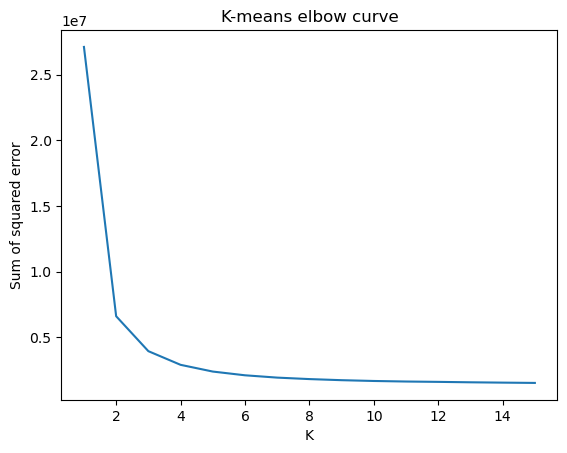

In [ ]:
elbow_curve(data_cancer_2)

In [ ]:
km_2 = KMeans(n_clusters=3)
clusters_km2 = km_2.fit_predict(data_cancer_2)
data_cancer_2_clustered_km = data_cancer_2.copy()
data_cancer_2_clustered_km["Cluster"] = clusters_km2
data_cancer_2_clustered_km.head(5)

sample_26 sample_47  sample_54 sample_57  sample_65  sample_79  \
gene_0        0.0       0.0        0.0       0.0        0.0        0.0   
gene_1   2.325242   3.44619   2.554196  3.667699   3.821935   3.219029   
gene_2   3.247092  3.620962   1.296134  3.083179   3.717605   2.284781   
gene_3   8.174007  7.171917   8.770277  7.997292     7.5931   8.124178   
gene_4  10.065053  9.796559  10.462901  9.516886  10.205964  10.386132   

        sample_96 sample_107 sample_130 sample_132  ... sample_692 sample_693  \
gene_0    0.54409        0.0        0.0        0.0  ...        0.0        0.0   
gene_1   2.231647    4.18593   2.900548   1.624335  ...    4.37121   2.757237   
gene_2   3.833133   4.003944   3.695315   2.880039  ...   3.979833   2.416191   
gene_3   7.077296   7.827019   7.956126   7.849242  ...   7.773647   7.349162   
gene_4  10.795228  10.202038  10.168258   9.961128  ...  10.222396   9.439698   

       sample_713 sample_732 sample_745 sample_755 sample_766 sample_767  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   1.951215   2.297866   3.487692    5.21595   3.351332   4.672505   
gene_2   2.939603   3.468987   4.071145   3.787735   3.512277   5.151839   
gene_3   7.099474   8.253569   8.695938   7.986786   7.927849   7.273012   
gene_4   9.693903   9.370563   10.39623   9.278686   9.277999   9.688172   

       sample_798 Cluster  
gene_0        0.0       2  
gene_1   3.249582       2  
gene_2   3.707492       2  
gene_3   8.185901       0  
gene_4   9.504082       1  

[5 rows x 79 columns]

In [ ]:
data_cancer_2_cluster_0_km = data_cancer_2_clustered_km[data_cancer_2_clustered_km.Cluster==0]
print(data_cancer_2_cluster_0_km.shape)
data_cancer_2_cluster_0_km.head(5)

(5107, 79)


sample_26 sample_47  sample_54 sample_57 sample_65 sample_79  \
gene_3   8.174007  7.171917   8.770277  7.997292    7.5931  8.124178   
gene_6   7.487446  8.175245   8.013993  7.925424  7.613185   5.78031   
gene_22   7.16366  7.783575  10.231857  7.065637  7.445346  8.697916   
gene_29  4.742653    4.4593   4.275089  4.948568  4.314203   4.75051   
gene_30  6.921841  7.451277   8.379864   7.99815  8.779703  7.415429   

        sample_96 sample_107 sample_130 sample_132  ... sample_692 sample_693  \
gene_3   7.077296   7.827019   7.956126   7.849242  ...   7.773647   7.349162   
gene_6   7.009056   7.442098   7.117165   7.426315  ...   7.561456   6.073865   
gene_22  7.940272    8.08315   8.464762   8.739646  ...   7.584414    8.56413   
gene_29  4.711203   5.316077   4.590093    3.23952  ...   4.007285   4.372694   
gene_30  7.972199   7.009739   7.456732   7.780441  ...   7.270753   6.886745   

        sample_713 sample_732 sample_745 sample_755 sample_766 sample_767  \
gene_3    7.099474   8.253569   8.695938   7.986786   7.927849   7.273012   
gene_6    7.668445   6.718266    8.74514   7.966638   7.540322   7.402969   
gene_22   8.649745   7.011607   5.812347   6.325825   6.408905   6.746944   
gene_29   4.897352   3.109561   2.409337   6.254783   4.098167   4.867649   
gene_30   4.665467   7.521396   7.470472   7.285643   7.420819   6.638178   

        sample_798 Cluster  
gene_3    8.185901       0  
gene_6    7.536589       0  
gene_22   7.439839       0  
gene_29   7.553959       0  
gene_30   6.831738       0  

[5 rows x 79 columns]

In [ ]:
data_cancer_2_cluster_1_km = data_cancer_2_clustered_km[data_cancer_2_clustered_km.Cluster==1]
print(data_cancer_2_cluster_1_km.shape)
data_cancer_2_cluster_1_km.head(5)

(9130, 79)


sample_26  sample_47  sample_54  sample_57  sample_65  sample_79  \
gene_4   10.065053   9.796559  10.462901   9.516886  10.205964  10.386132   
gene_19   6.944554   8.617963   7.243802  10.178167   9.138154   7.154079   
gene_27   9.569892   9.492714  10.094869   9.595472   9.685061  10.982109   
gene_34  12.054272  10.382159  10.112335  13.035014  12.562846  11.935032   
gene_38   9.733709   9.968537   9.625966   9.634415   9.702687  10.204926   

         sample_96 sample_107 sample_130 sample_132  ... sample_692  \
gene_4   10.795228  10.202038  10.168258   9.961128  ...  10.222396   
gene_19   8.695754   8.894133   8.699756   7.921121  ...   8.687911   
gene_27   8.982452   9.900191  10.160401  10.429302  ...   9.067856   
gene_34  11.421776  11.757511  12.646365   9.866341  ...  11.187049   
gene_38   9.940573  10.090972  10.529401  10.023907  ...   9.843153   

        sample_693 sample_713 sample_732 sample_745 sample_755 sample_766  \
gene_4    9.439698   9.693903   9.370563   10.39623   9.278686   9.277999   
gene_19   7.901096   9.071009    8.83258   8.342235  11.613145  10.033272   
gene_27   9.421602   9.386414   9.645658    9.70053   9.533727   9.201634   
gene_34  13.063193  15.034201   12.44193  11.154027  13.898223  12.680399   
gene_38   9.726007   9.043744  10.040632  10.230993    9.81115    9.39913   

        sample_767 sample_798 Cluster  
gene_4    9.688172   9.504082       1  
gene_19   8.577648   9.326032       1  
gene_27   9.564129   9.660764       1  
gene_34  12.751249  14.593625       1  
gene_38   9.588344  10.053043       1  

[5 rows x 79 columns]

In [ ]:
data_cancer_2_cluster_2_km = data_cancer_2_clustered_km[data_cancer_2_clustered_km.Cluster==2]
print(data_cancer_2_cluster_2_km.shape)
data_cancer_2_cluster_2_km.head(5)

(6294, 79)


sample_26 sample_47 sample_54 sample_57 sample_65 sample_79 sample_96  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0   0.54409   
gene_1  2.325242   3.44619  2.554196  3.667699  3.821935  3.219029  2.231647   
gene_2  3.247092  3.620962  1.296134  3.083179  3.717605  2.284781  3.833133   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7       0.0  1.972509       0.0  0.732486       0.0  0.521252   0.54409   

       sample_107 sample_130 sample_132  ... sample_692 sample_693 sample_713  \
gene_0        0.0        0.0        0.0  ...        0.0        0.0        0.0   
gene_1    4.18593   2.900548   1.624335  ...    4.37121   2.757237   1.951215   
gene_2   4.003944   3.695315   2.880039  ...   3.979833   2.416191   2.939603   
gene_5        0.0        0.0        0.0  ...        0.0        0.0        0.0   
gene_7   1.078542   0.410233        0.0  ...        0.0   0.566474   0.613437   

       sample_732 sample_745 sample_755 sample_766 sample_767 sample_798  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.297866   3.487692    5.21595   3.351332   4.672505   3.249582   
gene_2   3.468987   4.071145   3.787735   3.512277   5.151839   3.707492   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7        0.0        0.0   1.434882   0.755571        0.0   1.811101   

       Cluster  
gene_0       2  
gene_1       2  
gene_2       2  
gene_5       2  
gene_7       2  

[5 rows x 79 columns]

### Observations:
- The best number of clusters for the genes for cancer type 2, COAD, is 3.
- After k-means clustering, the 3 clusters have: 5107 genes (with similar values), 9130 genes and 6294 genes.

##### Cancer type 3: KIRC

In [ ]:
data_cancer_3 = all_data[all_data.Class=="KIRC"].T
data_cancer_3 = data_cancer_3.drop(["Class"], axis=0)
print(data_cancer_3.shape)
data_cancer_3.head(5)

(20531, 146)


sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  1.224966  2.941181  3.004519  1.541465  3.529783  4.801852       0.0   
gene_2  1.691177  2.663276  3.007178   2.54154  2.976712  2.648465  2.499578   
gene_3  6.572007   6.56169  6.524205  6.843255  6.038416  6.009255  6.950748   
gene_4  9.640511  9.376293  9.062661  9.444468  9.437973  9.611917  9.390092   

       sample_36 sample_40 sample_43  ... sample_733 sample_736 sample_748  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.384243  3.729379  3.757322  ...   1.744376   3.910176   1.993022   
gene_2  2.673624  2.293871  3.231048  ...   2.396625   3.047661   1.271665   
gene_3  6.679832   6.50571  6.722958  ...   6.782264   5.887194   5.850139   
gene_4   8.94676  8.555398  9.184962  ...   8.934292   9.152794   9.685266   

       sample_764 sample_765 sample_774 sample_777 sample_781 sample_786  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.578214    1.92391   2.542852   0.792022   1.499527    2.36446   
gene_2   2.761498   1.365581   2.020235    2.54201   3.213254   3.180689   
gene_3   5.988003   6.467914   5.083098   6.286147   6.873949   6.745049   
gene_4   9.506998     9.1765  10.328428   9.183747   9.091655   9.499661   

       sample_789  
gene_0        0.0  
gene_1   1.687061  
gene_2   2.826376  
gene_3   5.830164  
gene_4  10.921023  

[5 rows x 146 columns]

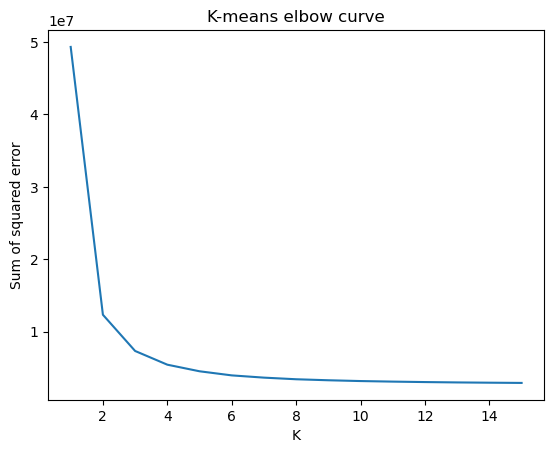

In [ ]:
elbow_curve(data_cancer_3)

In [ ]:
km_3 = KMeans(n_clusters=3)
clusters_km3 = km_3.fit_predict(data_cancer_3)
data_cancer_3_clustered_km = data_cancer_3.copy()
data_cancer_3_clustered_km["Cluster"] = clusters_km3
data_cancer_3_clustered_km.head(5)

sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  1.224966  2.941181  3.004519  1.541465  3.529783  4.801852       0.0   
gene_2  1.691177  2.663276  3.007178   2.54154  2.976712  2.648465  2.499578   
gene_3  6.572007   6.56169  6.524205  6.843255  6.038416  6.009255  6.950748   
gene_4  9.640511  9.376293  9.062661  9.444468  9.437973  9.611917  9.390092   

       sample_36 sample_40 sample_43  ... sample_736 sample_748 sample_764  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.384243  3.729379  3.757322  ...   3.910176   1.993022   2.578214   
gene_2  2.673624  2.293871  3.231048  ...   3.047661   1.271665   2.761498   
gene_3  6.679832   6.50571  6.722958  ...   5.887194   5.850139   5.988003   
gene_4   8.94676  8.555398  9.184962  ...   9.152794   9.685266   9.506998   

       sample_765 sample_774 sample_777 sample_781 sample_786 sample_789  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1    1.92391   2.542852   0.792022   1.499527    2.36446   1.687061   
gene_2   1.365581   2.020235    2.54201   3.213254   3.180689   2.826376   
gene_3   6.467914   5.083098   6.286147   6.873949   6.745049   5.830164   
gene_4     9.1765  10.328428   9.183747   9.091655   9.499661  10.921023   

       Cluster  
gene_0       1  
gene_1       1  
gene_2       1  
gene_3       2  
gene_4       0  

[5 rows x 147 columns]

In [ ]:
data_cancer_3_cluster_0_km = data_cancer_3_clustered_km[data_cancer_3_clustered_km.Cluster==0]
print(data_cancer_3_cluster_0_km.shape)
data_cancer_3_cluster_0_km.head(5)

(9102, 147)


sample_6 sample_11 sample_17  sample_18  sample_21 sample_24  \
gene_4   9.640511  9.376293  9.062661   9.444468   9.437973  9.611917   
gene_18  9.466878  8.732354  8.805347   7.433377   6.473824  10.31227   
gene_19    7.4242  9.796182   8.31715  10.602717  10.199182  10.91369   
gene_22   9.97364  8.614732  7.697197   8.026241   8.697826  6.517632   
gene_27  9.508977  9.501147  9.691972   9.223968   9.169707  8.054816   

        sample_32  sample_36  sample_40 sample_43  ... sample_736 sample_748  \
gene_4   9.390092    8.94676   8.555398  9.184962  ...   9.152794   9.685266   
gene_18  7.557448   9.161752  10.538208  8.320151  ...    8.00151    7.19023   
gene_19  9.973496  10.441035  10.072508  7.924379  ...  10.012233  10.872936   
gene_22  7.268977   7.304785   7.375378  8.926281  ...   8.456958   8.408657   
gene_27  8.613425   9.015513   9.195697  9.609009  ...   9.246501   9.530966   

        sample_764 sample_765 sample_774 sample_777 sample_781 sample_786  \
gene_4    9.506998     9.1765  10.328428   9.183747   9.091655   9.499661   
gene_18   9.512065   6.299135   8.020447   8.996369   9.950043   4.969556   
gene_19   7.163398   9.793995   9.580715     8.0083  10.302433   9.667497   
gene_22   9.162288   8.089212  10.890956  10.358662    7.34545   8.338496   
gene_27   9.401718   9.386921   9.275161  10.149963   8.996293   9.324939   

        sample_789 Cluster  
gene_4   10.921023       0  
gene_18   6.299219       0  
gene_19   9.604564       0  
gene_22   9.032701       0  
gene_27  10.229432       0  

[5 rows x 147 columns]

In [ ]:
data_cancer_3_cluster_1_km = data_cancer_3_clustered_km[data_cancer_3_clustered_km.Cluster==1]
print(data_cancer_3_cluster_1_km.shape)
data_cancer_3_cluster_1_km.head(5)

(5882, 147)


sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  1.224966  2.941181  3.004519  1.541465  3.529783  4.801852       0.0   
gene_2  1.691177  2.663276  3.007178   2.54154  2.976712  2.648465  2.499578   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7  0.531868  0.754118  1.687419       0.0       0.0  0.902498       0.0   

       sample_36 sample_40 sample_43  ... sample_736 sample_748 sample_764  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.384243  3.729379  3.757322  ...   3.910176   1.993022   2.578214   
gene_2  2.673624  2.293871  3.231048  ...   3.047661   1.271665   2.761498   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_7  0.454702  0.742955  0.495695  ...   1.977573        0.0   1.831958   

       sample_765 sample_774 sample_777 sample_781 sample_786 sample_789  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1    1.92391   2.542852   0.792022   1.499527    2.36446   1.687061   
gene_2   1.365581   2.020235    2.54201   3.213254   3.180689   2.826376   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7   0.391988        0.0    0.54893        0.0   0.881665        0.0   

       Cluster  
gene_0       1  
gene_1       1  
gene_2       1  
gene_5       1  
gene_7       1  

[5 rows x 147 columns]

In [ ]:
data_cancer_3_cluster_2_km = data_cancer_3_clustered_km[data_cancer_3_clustered_km.Cluster==2]
print(data_cancer_3_cluster_2_km.shape)
data_cancer_3_cluster_2_km.head(5)

(5547, 147)


sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_3   6.572007   6.56169  6.524205  6.843255  6.038416  6.009255  6.950748   
gene_6   6.754888  7.860323  7.995937  5.479091  5.893828   6.38136  5.018937   
gene_28   4.48542  6.695479  3.877234  3.172392  2.034638   4.37686  2.996895   
gene_29  8.633177  5.583609  5.375672  5.423272  4.598651  3.570876  6.176129   
gene_30       0.0  7.596823  6.991125  7.838939  3.565609  9.434793   5.08638   

        sample_36 sample_40 sample_43  ... sample_736 sample_748 sample_764  \
gene_3   6.679832   6.50571  6.722958  ...   5.887194   5.850139   5.988003   
gene_6   6.554681  7.798459   7.83394  ...   8.536169    6.53759   6.741386   
gene_28  4.538073  6.007218  5.305398  ...   4.925211   4.496737   5.557177   
gene_29  5.395005  4.764144  6.556955  ...   6.539832   5.368894   6.045054   
gene_30  4.017227   8.12171    6.4104  ...   7.318949   5.589407   6.434832   

        sample_765 sample_774 sample_777 sample_781 sample_786 sample_789  \
gene_3    6.467914   5.083098   6.286147   6.873949   6.745049   5.830164   
gene_6    6.597762   4.852848   9.758661   4.812057   6.455861   5.235528   
gene_28   5.205815   2.305095   7.522519   4.554564   4.191578   4.697045   
gene_29    5.81297   3.930898   5.377908   4.925397   5.165506  13.105095   
gene_30   8.164932   5.620976   6.166557   8.721321   3.677587   9.643014   

        Cluster  
gene_3        2  
gene_6        2  
gene_28       2  
gene_29       2  
gene_30       2  

[5 rows x 147 columns]

### Observations:
- The best number of clusters for the genes for cancer type 3, KIRC, is 3.
- After k-means clustering, the 3 clusters have: 5882 genes (with similar values), 9102 genes and 5547 genes.


##### Cancer type 4: LUAD

In [ ]:
data_cancer_4 = all_data[all_data.Class=="LUAD"].T
data_cancer_4 = data_cancer_4.drop(["Class"], axis=0)
print(data_cancer_4.shape)
data_cancer_4.head(5)

(20531, 141)


sample_1 sample_16 sample_22 sample_25 sample_37  sample_49  \
gene_0       0.0       0.0       0.0  0.341758       0.0        0.0   
gene_1  0.592732  3.460913  1.131853  4.317702  4.416259   4.577822   
gene_2  1.588421  3.618474  2.351515  3.642678  4.188978   3.800237   
gene_3  7.586157  5.661048  6.845841  6.790003  6.664198    7.28078   
gene_4  9.623011  9.731217   9.19686  8.435999  9.070819  10.153223   

        sample_51 sample_60 sample_63 sample_73  ... sample_761 sample_763  \
gene_0        0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1   3.858916  1.005687  4.418817  3.425688  ...   3.303109   4.235061   
gene_2   4.324523  2.075088  3.555374  3.836631  ...    2.61471   4.218874   
gene_3    6.70838  6.899985  6.468829  6.499878  ...   6.289482   6.542637   
gene_4  10.240899  9.789379  9.777303  9.171247  ...   9.982509   8.981995   

       sample_771 sample_773 sample_776 sample_778 sample_779 sample_780  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   3.683427   3.280006        0.0   3.834731   3.482255   1.693944   
gene_2   4.158555   3.607425   2.316406   1.894372   3.064952   2.605139   
gene_3   5.976767   5.659805   6.510695   6.314852   6.699288   6.487568   
gene_4  10.272548  10.064864   9.932385   10.96437  10.134182   9.533067   

       sample_795 sample_797  
gene_0   0.436588        0.0  
gene_1   4.472176   3.942955  
gene_2   4.908746   4.453807  
gene_3   5.937848   6.346597  
gene_4   9.330901  10.056868  

[5 rows x 141 columns]

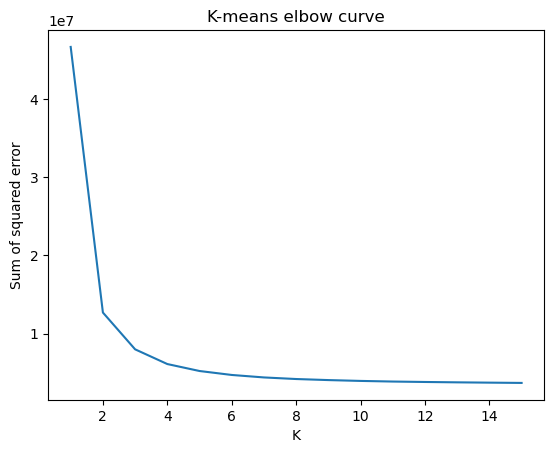

In [ ]:
elbow_curve(data_cancer_4)

In [ ]:
km_4 = KMeans(n_clusters=3)
clusters_km4 = km_4.fit_predict(data_cancer_4)
data_cancer_4_clustered_km = data_cancer_4.copy()
data_cancer_4_clustered_km["Cluster"] = clusters_km4
data_cancer_4_clustered_km.head(5)

sample_1 sample_16 sample_22 sample_25 sample_37  sample_49  \
gene_0       0.0       0.0       0.0  0.341758       0.0        0.0   
gene_1  0.592732  3.460913  1.131853  4.317702  4.416259   4.577822   
gene_2  1.588421  3.618474  2.351515  3.642678  4.188978   3.800237   
gene_3  7.586157  5.661048  6.845841  6.790003  6.664198    7.28078   
gene_4  9.623011  9.731217   9.19686  8.435999  9.070819  10.153223   

        sample_51 sample_60 sample_63 sample_73  ... sample_763 sample_771  \
gene_0        0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1   3.858916  1.005687  4.418817  3.425688  ...   4.235061   3.683427   
gene_2   4.324523  2.075088  3.555374  3.836631  ...   4.218874   4.158555   
gene_3    6.70838  6.899985  6.468829  6.499878  ...   6.542637   5.976767   
gene_4  10.240899  9.789379  9.777303  9.171247  ...   8.981995  10.272548   

       sample_773 sample_776 sample_778 sample_779 sample_780 sample_795  \
gene_0        0.0        0.0        0.0        0.0        0.0   0.436588   
gene_1   3.280006        0.0   3.834731   3.482255   1.693944   4.472176   
gene_2   3.607425   2.316406   1.894372   3.064952   2.605139   4.908746   
gene_3   5.659805   6.510695   6.314852   6.699288   6.487568   5.937848   
gene_4  10.064864   9.932385   10.96437  10.134182   9.533067   9.330901   

       sample_797 Cluster  
gene_0        0.0       0  
gene_1   3.942955       0  
gene_2   4.453807       0  
gene_3   6.346597       1  
gene_4  10.056868       2  

[5 rows x 142 columns]

In [ ]:
data_cancer_4_cluster_0_km = data_cancer_4_clustered_km[data_cancer_4_clustered_km.Cluster==0]
print(data_cancer_4_cluster_0_km.shape)
data_cancer_4_cluster_0_km.head(5)

(5763, 142)


sample_1 sample_16 sample_22 sample_25 sample_37 sample_49 sample_51  \
gene_0       0.0       0.0       0.0  0.341758       0.0       0.0       0.0   
gene_1  0.592732  3.460913  1.131853  4.317702  4.416259  4.577822  3.858916   
gene_2  1.588421  3.618474  2.351515  3.642678  4.188978  3.800237  4.324523   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7       0.0  1.033652  0.462785  1.216051  0.906275       0.0       0.0   

       sample_60 sample_63 sample_73  ... sample_763 sample_771 sample_773  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  1.005687  4.418817  3.425688  ...   4.235061   3.683427   3.280006   
gene_2  2.075088  3.555374  3.836631  ...   4.218874   4.158555   3.607425   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_7       0.0       0.0  0.365021  ...        0.0    0.69964   0.657091   

       sample_776 sample_778 sample_779 sample_780 sample_795 sample_797  \
gene_0        0.0        0.0        0.0        0.0   0.436588        0.0   
gene_1        0.0   3.834731   3.482255   1.693944   4.472176   3.942955   
gene_2   2.316406   1.894372   3.064952   2.605139   4.908746   4.453807   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7        0.0        0.0        0.0        0.0   0.429107        0.0   

       Cluster  
gene_0       0  
gene_1       0  
gene_2       0  
gene_5       0  
gene_7       0  

[5 rows x 142 columns]

In [ ]:
data_cancer_4_cluster_1_km = data_cancer_4_clustered_km[data_cancer_4_clustered_km.Cluster==1]
print(data_cancer_4_cluster_1_km.shape)
data_cancer_4_cluster_1_km.head(5)

(5623, 142)


sample_1 sample_16 sample_22 sample_25 sample_37 sample_49 sample_51  \
gene_3   7.586157  5.661048  6.845841  6.790003  6.664198   7.28078   6.70838   
gene_6   6.816049  8.435591  7.853827  8.573628  7.915318  7.183417  6.401096   
gene_20  3.562621  5.679936  5.412903  5.045229  4.568598  3.373843  3.167165   
gene_26  9.949812  4.523022  7.158165  1.757706  3.284218  3.373843  2.025135   
gene_29  4.926991    4.7565  7.981533  6.667935  6.649694  8.313019  5.190757   

        sample_60 sample_63 sample_73  ... sample_763 sample_771 sample_773  \
gene_3   6.899985  6.468829  6.499878  ...   6.542637   5.976767   5.659805   
gene_6   6.684356  6.361089  6.486645  ...   6.571407    6.69566   7.436253   
gene_20  2.230787  3.460887  3.352349  ...   2.022829   3.283433   3.227217   
gene_26  9.579535  4.050754  8.571612  ...   2.833416   5.036793   3.087344   
gene_29  5.114634  4.810618  6.467716  ...    5.87604   7.168592   7.098537   

        sample_776 sample_778 sample_779 sample_780 sample_795 sample_797  \
gene_3    6.510695   6.314852   6.699288   6.487568   5.937848   6.346597   
gene_6    6.442733   7.437053   5.946555   7.762987   7.254944   7.320331   
gene_20   2.065124   2.661886   2.218781   3.151031   4.658257   3.844888   
gene_26      7.744   9.768067  10.194818   1.931797   2.041944   9.169589   
gene_29   5.930361    4.81578   6.166581   5.487441    5.23431   9.218353   

        Cluster  
gene_3        1  
gene_6        1  
gene_20       1  
gene_26       1  
gene_29       1  

[5 rows x 142 columns]

In [ ]:
data_cancer_4_cluster_2_km = data_cancer_4_clustered_km[data_cancer_4_clustered_km.Cluster==2]
print(data_cancer_4_cluster_2_km.shape)
data_cancer_4_cluster_2_km.head(5)

(9145, 142)


sample_1  sample_16  sample_22  sample_25  sample_37  sample_49  \
gene_4    9.623011   9.731217    9.19686   8.435999   9.070819  10.153223   
gene_19  11.055208  10.103576   9.986724   9.708972   9.107863   9.517039   
gene_22   10.07047   9.097097   6.329574    8.75864   7.941206   8.363587   
gene_27   8.522476   8.267639   9.528491   9.329198   9.089461   9.111308   
gene_34   13.28624  13.265291  15.647259  16.969398  15.766314  14.149715   

         sample_51  sample_60  sample_63  sample_73  ... sample_763  \
gene_4   10.240899   9.789379   9.777303   9.171247  ...   8.981995   
gene_19   7.750258  10.137747    8.54119   9.732366  ...   9.478873   
gene_22   9.872593   9.945772   9.502112   8.327121  ...   8.588149   
gene_27    9.87637   8.825817   9.604611   9.013027  ...   9.470885   
gene_34  13.788412  13.946815  14.422866  14.827179  ...  15.448294   

        sample_771 sample_773 sample_776 sample_778 sample_779 sample_780  \
gene_4   10.272548  10.064864   9.932385   10.96437  10.134182   9.533067   
gene_19   7.807986   9.790554  10.005723    9.41712   8.890824   9.975318   
gene_22   9.826145   7.357244   9.377239   9.039366   7.165349   8.519601   
gene_27   8.949278   9.143294    8.87636   9.514931   9.412688   7.961803   
gene_34  12.636233   13.87761  14.845941  15.377041  13.488091  12.607268   

        sample_795 sample_797 Cluster  
gene_4    9.330901  10.056868       2  
gene_19   9.859712   9.650467       2  
gene_22   7.470358   8.113409       2  
gene_27   8.712527  11.181065       2  
gene_34  14.906101  12.910624       2  

[5 rows x 142 columns]

### Observations:
- The best number of clusters for the genes for cancer type 4, LUAD, is 3.
- After k-means clustering, the 3 clusters have: 5761 genes (with similar values), 9153 genes and 5617 genes.

##### Cancer type 5: PRAD

In [ ]:
data_cancer_5 = all_data[all_data.Class=="PRAD"].T
data_cancer_5 = data_cancer_5.drop(["Class"], axis=0)
print(data_cancer_5.shape)
data_cancer_5.head(5)

(20531, 136)


sample_0  sample_2   sample_3  sample_5  sample_7  sample_9  \
gene_0        0.0       0.0        0.0       0.0       0.0       0.0   
gene_1   2.017209  3.511759   3.663618  3.467853  2.854853  3.642494   
gene_2   3.265527  4.327199   4.507649  3.581918  1.750478  4.423558   
gene_3   5.478487  6.881787   6.659068  6.620243   7.22672  6.849511   
gene_4  10.431999   9.87073  10.196184  9.706829  9.758691  9.464466   

       sample_12 sample_19 sample_34 sample_41  ... sample_731 sample_741  \
gene_0       0.0       0.0  0.631523       0.0  ...        0.0   0.408603   
gene_1  3.970348  4.167583   3.19022  3.026375  ...   4.156243    4.40131   
gene_2  2.364292  3.841389  5.690191  4.364103  ...   4.598431   4.418905   
gene_3  7.145443  6.976123  5.770615  7.164917  ...   6.690599   6.524161   
gene_4  9.240605  9.982252  9.207844  9.552402  ...    9.38993   9.406262   

       sample_743 sample_752 sample_754 sample_783 sample_788 sample_794  \
gene_0        0.0   0.404031        0.0        0.0        0.0        0.0   
gene_1   4.522953   4.449324   2.146101   2.060705     4.8692   4.288388   
gene_2   3.924413   4.419337   3.404753    3.71983   4.087717    3.45249   
gene_3   7.441218   7.176981   7.255227   6.427137   6.369039   7.209151   
gene_4   9.959676   9.551633  10.704016  10.432187   9.684507    9.87562   

       sample_799 sample_800  
gene_0        0.0        0.0  
gene_1   2.590339   2.325242  
gene_2   2.787976   3.805932  
gene_3   7.318624   6.530246  
gene_4   9.987136   9.560367  

[5 rows x 136 columns]

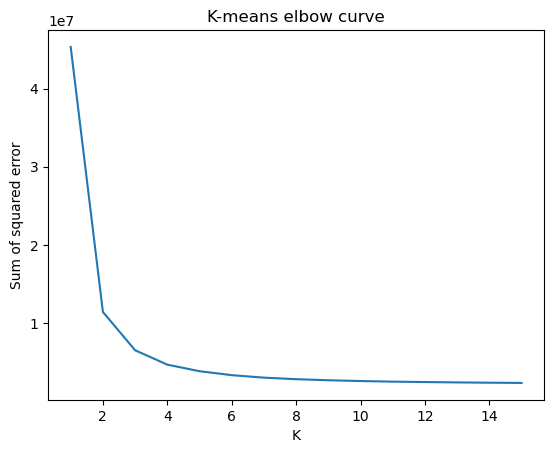

In [ ]:
elbow_curve(data_cancer_5)

In [ ]:
km_5 = KMeans(n_clusters=3)
clusters_km5 = km_5.fit_predict(data_cancer_5)
data_cancer_5_clustered_km = data_cancer_5.copy()
data_cancer_5_clustered_km["Cluster"] = clusters_km5
data_cancer_5_clustered_km.head(5)

sample_0  sample_2   sample_3  sample_5  sample_7  sample_9  \
gene_0        0.0       0.0        0.0       0.0       0.0       0.0   
gene_1   2.017209  3.511759   3.663618  3.467853  2.854853  3.642494   
gene_2   3.265527  4.327199   4.507649  3.581918  1.750478  4.423558   
gene_3   5.478487  6.881787   6.659068  6.620243   7.22672  6.849511   
gene_4  10.431999   9.87073  10.196184  9.706829  9.758691  9.464466   

       sample_12 sample_19 sample_34 sample_41  ... sample_741 sample_743  \
gene_0       0.0       0.0  0.631523       0.0  ...   0.408603        0.0   
gene_1  3.970348  4.167583   3.19022  3.026375  ...    4.40131   4.522953   
gene_2  2.364292  3.841389  5.690191  4.364103  ...   4.418905   3.924413   
gene_3  7.145443  6.976123  5.770615  7.164917  ...   6.524161   7.441218   
gene_4  9.240605  9.982252  9.207844  9.552402  ...   9.406262   9.959676   

       sample_752 sample_754 sample_783 sample_788 sample_794 sample_799  \
gene_0   0.404031        0.0        0.0        0.0        0.0        0.0   
gene_1   4.449324   2.146101   2.060705     4.8692   4.288388   2.590339   
gene_2   4.419337   3.404753    3.71983   4.087717    3.45249   2.787976   
gene_3   7.176981   7.255227   6.427137   6.369039   7.209151   7.318624   
gene_4   9.551633  10.704016  10.432187   9.684507    9.87562   9.987136   

       sample_800 Cluster  
gene_0        0.0       0  
gene_1   2.325242       0  
gene_2   3.805932       2  
gene_3   6.530246       2  
gene_4   9.560367       1  

[5 rows x 137 columns]

In [ ]:
data_cancer_5_cluster_0_km = data_cancer_5_clustered_km[data_cancer_5_clustered_km.Cluster==0]
print(data_cancer_5_cluster_0_km.shape)
data_cancer_5_cluster_0_km.head(5)

(5824, 137)


sample_0  sample_2  sample_3  sample_5  sample_7  sample_9 sample_12  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  2.017209  3.511759  3.663618  3.467853  2.854853  3.642494  3.970348   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7  0.591871  0.452595  0.434882       0.0       0.0  0.724214       0.0   
gene_8       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

       sample_19 sample_34 sample_41  ... sample_741 sample_743 sample_752  \
gene_0       0.0  0.631523       0.0  ...   0.408603        0.0   0.404031   
gene_1  4.167583   3.19022  3.026375  ...    4.40131   4.522953   4.449324   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_7       0.0  1.069221  0.638862  ...   0.721066   1.402886   0.387142   
gene_8       0.0       0.0       0.0  ...        0.0        0.0        0.0   

       sample_754 sample_783 sample_788 sample_794 sample_799 sample_800  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.146101   2.060705     4.8692   4.288388   2.590339   2.325242   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7   0.948451        0.0        0.0   0.416948        0.0        0.0   
gene_8        0.0        0.0        0.0        0.0        0.0        0.0   

       Cluster  
gene_0       0  
gene_1       0  
gene_5       0  
gene_7       0  
gene_8       0  

[5 rows x 137 columns]

In [ ]:
data_cancer_5_cluster_1_km = data_cancer_5_clustered_km[data_cancer_5_clustered_km.Cluster==1]
print(data_cancer_5_cluster_1_km.shape)
data_cancer_5_cluster_1_km.head(5)

(9094, 137)


sample_0   sample_2   sample_3   sample_5   sample_7   sample_9  \
gene_4   10.431999    9.87073  10.196184   9.706829   9.758691   9.464466   
gene_27   10.83907   9.861616   9.511573   9.628387   9.406279   9.871312   
gene_34  13.714396  10.731098  12.659474  14.021153  16.798586  12.578644   
gene_35  10.034496   6.967883    8.29989   9.126059  10.113911   8.285411   
gene_38   9.833458   9.646323   9.670731   9.962887   9.349567   9.292131   

         sample_12  sample_19  sample_34  sample_41  ... sample_741  \
gene_4    9.240605   9.982252   9.207844   9.552402  ...   9.406262   
gene_27    9.30999   9.641822  10.257341   9.740786  ...   9.217262   
gene_34  13.839155  13.452164  14.159398  12.343019  ...  14.692027   
gene_35   9.327708     8.5994   9.090671   9.346822  ...   8.883716   
gene_38   9.686054   9.793473   9.590424   9.911567  ...   9.372086   

        sample_743 sample_752 sample_754 sample_783 sample_788 sample_794  \
gene_4    9.959676   9.551633  10.704016  10.432187   9.684507    9.87562   
gene_27   9.837953   9.686001   9.125194  11.498555   9.159773   9.642637   
gene_34  12.719188  13.688294  14.079568  11.623081  12.801951  15.389164   
gene_35   8.244193   7.922513   8.745416   8.597125   7.915563   8.052198   
gene_38    9.91418   9.676264   9.636587  10.232709   9.540822   9.533345   

        sample_799 sample_800 Cluster  
gene_4    9.987136   9.560367       1  
gene_27  10.163713    9.28807       1  
gene_34  13.648358  14.702395       1  
gene_35   9.083426   8.261902       1  
gene_38  10.493986   9.825463       1  

[5 rows x 137 columns]

In [ ]:
data_cancer_5_cluster_2_km = data_cancer_5_clustered_km[data_cancer_5_clustered_km.Cluster==2]
print(data_cancer_5_cluster_2_km.shape)
data_cancer_5_cluster_2_km.head(5)

(5613, 137)


sample_0  sample_2  sample_3  sample_5  sample_7  sample_9 sample_12  \
gene_2   3.265527  4.327199  4.507649  3.581918  1.750478  4.423558  2.364292   
gene_3   5.478487  6.881787  6.659068  6.620243   7.22672  6.849511  7.145443   
gene_6   7.175175   6.97213  7.843375   7.75851  5.952103  7.947216  7.810758   
gene_19  5.619994  8.210248  8.306317  6.842765  7.373431   7.85678  9.217032   
gene_22  9.796088   8.97092  8.524616  7.663935  8.922008  6.020051  8.174142   

        sample_19 sample_34 sample_41  ... sample_741 sample_743 sample_752  \
gene_2   3.841389  5.690191  4.364103  ...   4.418905   3.924413   4.419337   
gene_3   6.976123  5.770615  7.164917  ...   6.524161   7.441218   7.176981   
gene_6   6.977372  8.206262   7.90352  ...   7.251624   8.158786   8.669874   
gene_19  7.890471  7.831624  7.534505  ...   9.943318   8.483022   9.133091   
gene_22  8.368799  8.499025   8.39154  ...   6.846869   7.995496   6.863195   

        sample_754 sample_783 sample_788 sample_794 sample_799 sample_800  \
gene_2    3.404753    3.71983   4.087717    3.45249   2.787976   3.805932   
gene_3    7.255227   6.427137   6.369039   7.209151   7.318624   6.530246   
gene_6    8.653469    8.35376   7.929903   7.332717   9.213464   7.957027   
gene_19   6.388055   5.613579   9.153674   9.316162   7.987867   9.261148   
gene_22   9.403928   9.077053   7.179372   6.810816   9.770383       7.88   

        Cluster  
gene_2        2  
gene_3        2  
gene_6        2  
gene_19       2  
gene_22       2  

[5 rows x 137 columns]

### Observations:
- The best number of clusters for the genes for cancer type 5, PRAD, is 3.
- After k-means clustering, the 3 clusters have: 9095 genes (with similar values), 5824 genes and 5612 genes. 


#### 3) Clustering all samples 

C:\Users\Aurore Prevot\anaconda3\envs\cv\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


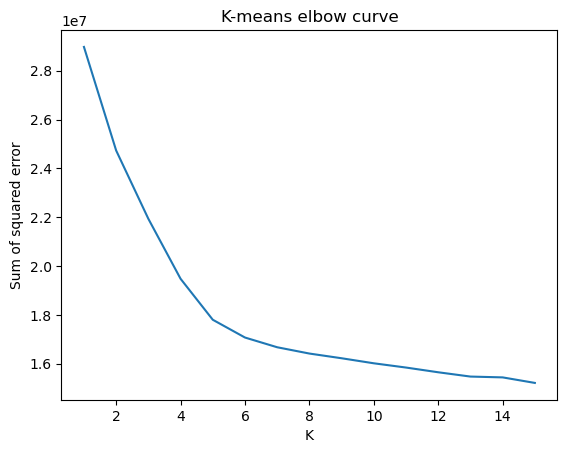

In [ ]:
elbow_curve(data)

In [ ]:
km_samples = KMeans(n_clusters=5)
clusters_kms = km_samples.fit_predict(data)
data_clustered_km = data.copy()
data_clustered_km["Cluster"] = clusters_kms
data_clustered_km["Class"] = all_data["Class"]
data_clustered_km.head(5)

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_0  0.591871     0.0     0.0  ...    9.723516    7.220030    9.119813   
sample_1  0.000000     0.0     0.0  ...    9.740931    6.256586    8.381612   
sample_2  0.452595     0.0     0.0  ...   10.908640    5.401607    9.911597   
sample_3  0.434882     0.0     0.0  ...   10.141520    8.942805    9.601208   
sample_4  0.360982     0.0     0.0  ...   10.373790    7.181162    9.846910   

          gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  Cluster  \
sample_0   12.003135    9.650743    8.921326    5.286759         0.0        0   
sample_1   12.674552   10.517059    9.397854    2.094168         0.0        2   
sample_2    9.045255    9.788359   10.090470    1.683023         0.0        0   
sample_3   11.392682    9.694814    9.684365    3.292001         0.0        0   
sample_4   11.922439    9.217749    9.461191    5.110372         0.0        1   

          Class  
sample_0   PRAD  
sample_1   LUAD  
sample_2   PRAD  
sample_3   PRAD  
sample_4   BRCA  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_1_km = data_clustered_km[data_clustered_km.Class=="BRCA"]
print(data_clustered_cancer_1_km.shape)
data_clustered_cancer_1_km.head(5)

(300, 20533)


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_4      0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
sample_8      0.0  3.992125  2.772730  6.546692  10.488252     0.0  7.690222   
sample_10     0.0  3.492071  3.553373  7.151707  10.253446     0.0  8.301258   
sample_13     0.0  1.551048  3.529846  6.326825  10.633849     0.0  8.944659   
sample_14     0.0  1.964842  2.183010  6.596832  10.248141     0.0  7.087251   

             gene_7  gene_8    gene_9  ...  gene_20523  gene_20524  \
sample_4   0.360982     0.0  0.000000  ...   10.373790    7.181162   
sample_8   0.352307     0.0  4.067604  ...    9.763753    7.933278   
sample_10  0.000000     0.0  0.000000  ...   10.042261    6.580103   
sample_13  0.000000     0.0  0.000000  ...    9.379835    7.195800   
sample_14  0.441483     0.0  0.000000  ...   10.404567    6.588536   

           gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
sample_4     9.846910   11.922439    9.217749    9.461191    5.110372   
sample_8    10.952880   12.498919   10.389954   10.390255    7.828321   
sample_10    9.785004   12.383834    9.869359    8.991768    5.735121   
sample_13    8.907645   12.079481    9.218936    8.104101    3.660894   
sample_14    8.952596   10.461725   10.582857    9.488141    3.261967   

           gene_20530  Cluster  Class  
sample_4     0.000000        1   BRCA  
sample_8     0.000000        1   BRCA  
sample_10    0.892818        1   BRCA  
sample_13    0.000000        1   BRCA  
sample_14    0.000000        1   BRCA  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_1_km["Cluster"].value_counts()

1    299
2      1
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_2_km = data_clustered_km[data_clustered_km.Class=="COAD"]
print(data_clustered_cancer_2_km.shape)
data_clustered_cancer_2_km.head(5)

(78, 20533)


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_26     0.0  2.325242  3.247092  8.174007  10.065053     0.0  7.487446   
sample_47     0.0  3.446190  3.620962  7.171917   9.796559     0.0  8.175245   
sample_54     0.0  2.554196  1.296134  8.770277  10.462901     0.0  8.013993   
sample_57     0.0  3.667699  3.083179  7.997292   9.516886     0.0  7.925424   
sample_65     0.0  3.821935  3.717605  7.593100  10.205964     0.0  7.613185   

             gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_26  0.000000     0.0     0.0  ...   10.097084    0.566572    9.414850   
sample_47  1.972509     0.0     0.0  ...   10.082854    0.000000    9.389552   
sample_54  0.000000     0.0     0.0  ...    9.876580    1.736302    9.230261   
sample_57  0.732486     0.0     0.0  ...   10.331936    0.732486    8.922457   
sample_65  0.000000     0.0     0.0  ...   10.057464    0.000000    8.988114   

           gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
sample_26   12.513264    9.714840    9.413833    4.470146         0.0   
sample_47   12.123349   11.552194    9.052753    1.675093         0.0   
sample_54   12.363812    9.441293    9.639285    2.221630         0.0   
sample_57   12.182373   10.525648    9.444771    3.449205         0.0   
sample_65   12.993375   10.565978    9.184890    3.102541         0.0   

           Cluster  Class  
sample_26        3   COAD  
sample_47        3   COAD  
sample_54        3   COAD  
sample_57        3   COAD  
sample_65        3   COAD  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_2_km["Cluster"].value_counts()

3    76
2     2
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_3_km = data_clustered_km[data_clustered_km.Class=="KIRC"]
print(data_clustered_cancer_3_km.shape)
data_clustered_cancer_3_km.head(5)

(146, 20533)


gene_0    gene_1    gene_2    gene_3    gene_4  gene_5    gene_6  \
sample_6      0.0  1.224966  1.691177  6.572007  9.640511     0.0  6.754888   
sample_11     0.0  2.941181  2.663276  6.561690  9.376293     0.0  7.860323   
sample_17     0.0  3.004519  3.007178  6.524205  9.062661     0.0  7.995937   
sample_18     0.0  1.541465  2.541540  6.843255  9.444468     0.0  5.479091   
sample_21     0.0  3.529783  2.976712  6.038416  9.437973     0.0  5.893828   

             gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_6   0.531868     0.0     0.0  ...    9.673966    1.877744    9.802692   
sample_11  0.754118     0.0     0.0  ...   10.405099    5.070922    9.865778   
sample_17  1.687419     0.0     0.0  ...   10.392532    2.711935   10.118149   
sample_18  0.000000     0.0     0.0  ...   10.088165    2.178492   10.072360   
sample_21  0.000000     0.0     0.0  ...   10.241781    1.349705    9.957147   

           gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
sample_6    13.256060    9.664486    9.244219    8.330912    0.000000   
sample_11   11.749802   10.397407    9.300561    5.276564    0.425782   
sample_17   11.623369   10.327115    9.772328    3.597400    0.000000   
sample_18   12.380688   10.741298    9.808642    5.777772    0.000000   
sample_21   12.826908    9.538280   10.131587    7.738390    0.000000   

           Cluster  Class  
sample_6         4   KIRC  
sample_11        4   KIRC  
sample_17        4   KIRC  
sample_18        4   KIRC  
sample_21        4   KIRC  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_3_km["Cluster"].value_counts()

4    145
1      1
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_4_km = data_clustered_km[data_clustered_km.Class=="LUAD"]
print(data_clustered_cancer_4_km.shape)
data_clustered_cancer_4_km.head(5)

(141, 20533)


gene_0    gene_1    gene_2    gene_3    gene_4  gene_5    gene_6  \
sample_1   0.000000  0.592732  1.588421  7.586157  9.623011     0.0  6.816049   
sample_16  0.000000  3.460913  3.618474  5.661048  9.731217     0.0  8.435591   
sample_22  0.000000  1.131853  2.351515  6.845841  9.196860     0.0  7.853827   
sample_25  0.341758  4.317702  3.642678  6.790003  8.435999     0.0  8.573628   
sample_37  0.000000  4.416259  4.188978  6.664198  9.070819     0.0  7.915318   

             gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_1   0.000000     0.0     0.0  ...    9.740931    6.256586    8.381612   
sample_16  1.033652     0.0     0.0  ...    9.907260    0.763921   10.088854   
sample_22  0.462785     0.0     0.0  ...    9.524792    7.891079   10.579429   
sample_25  1.216051     0.0     0.0  ...   10.445253    1.757706    9.709429   
sample_37  0.906275     0.0     0.0  ...   10.431884    2.168899    9.402496   

           gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
sample_1    12.674552   10.517059    9.397854    2.094168    0.000000   
sample_16   11.471137    9.768648    9.170596    2.932118    0.000000   
sample_22   12.098697   10.550256   10.248165    5.250397    0.000000   
sample_25   12.364996   11.175213    9.509716    4.912085    0.000000   
sample_37   12.072283   10.637458    9.379959    6.148450    0.906275   

           Cluster  Class  
sample_1         2   LUAD  
sample_16        2   LUAD  
sample_22        2   LUAD  
sample_25        2   LUAD  
sample_37        2   LUAD  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_4_km["Cluster"].value_counts()

2    139
1      2
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_5_km = data_clustered_km[data_clustered_km.Class=="PRAD"]
print(data_clustered_cancer_5_km.shape)
data_clustered_cancer_5_km.head(5)

(136, 20533)


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_5     0.0  3.467853  3.581918  6.620243   9.706829     0.0  7.758510   
sample_7     0.0  2.854853  1.750478  7.226720   9.758691     0.0  5.952103   

            gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_0  0.591871     0.0     0.0  ...    9.723516    7.220030    9.119813   
sample_2  0.452595     0.0     0.0  ...   10.908640    5.401607    9.911597   
sample_3  0.434882     0.0     0.0  ...   10.141520    8.942805    9.601208   
sample_5  0.000000     0.0     0.0  ...    9.928339    6.096154    9.816001   
sample_7  0.000000     0.0     0.0  ...    9.599230    5.244290    9.994339   

          gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  Cluster  \
sample_0   12.003135    9.650743    8.921326    5.286759         0.0        0   
sample_2    9.045255    9.788359   10.090470    1.683023         0.0        0   
sample_3   11.392682    9.694814    9.684365    3.292001         0.0        0   
sample_5   11.556995    9.244150    9.836473    5.355133         0.0        0   
sample_7   12.670377    9.987733    9.216872    6.551490         0.0        0   

          Class  
sample_0   PRAD  
sample_2   PRAD  
sample_3   PRAD  
sample_5   PRAD  
sample_7   PRAD  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_5_km["Cluster"].value_counts()

0    136
Name: Cluster, dtype: int64

### Observations:
- All the samples, 300, of the cancer type 1, BRCA, have been classified in the same cluster (0).

- 76 out of 78 samples of the cancer type 2, COAD, have been classifed in the same cluster (2).
- Two samples of the cancer type 2, COAD, have been classified has a cancer type 4, LUAD (1).

- 145 out of 146 samples of the cancer type 3, KIRC, have been classifed in the same cluster (3).
- One sample of the cancer type 3, KIRC, has been classified has a cancer type 1, BRCA (0).

- 139 out of 141 samples of the cancer type 4, LUAD, have been classifed in the same cluster (1).
- Two samples of the cancer type 4, LUAD, have been classified has a cancer type 1, BRCA (0).

- All the samples, 136, of the cancer type 5, PRAD, have been classified in the same cluster (4).

### B)  Hierarchical clustering

#### 1) Clustering the genes across all samples

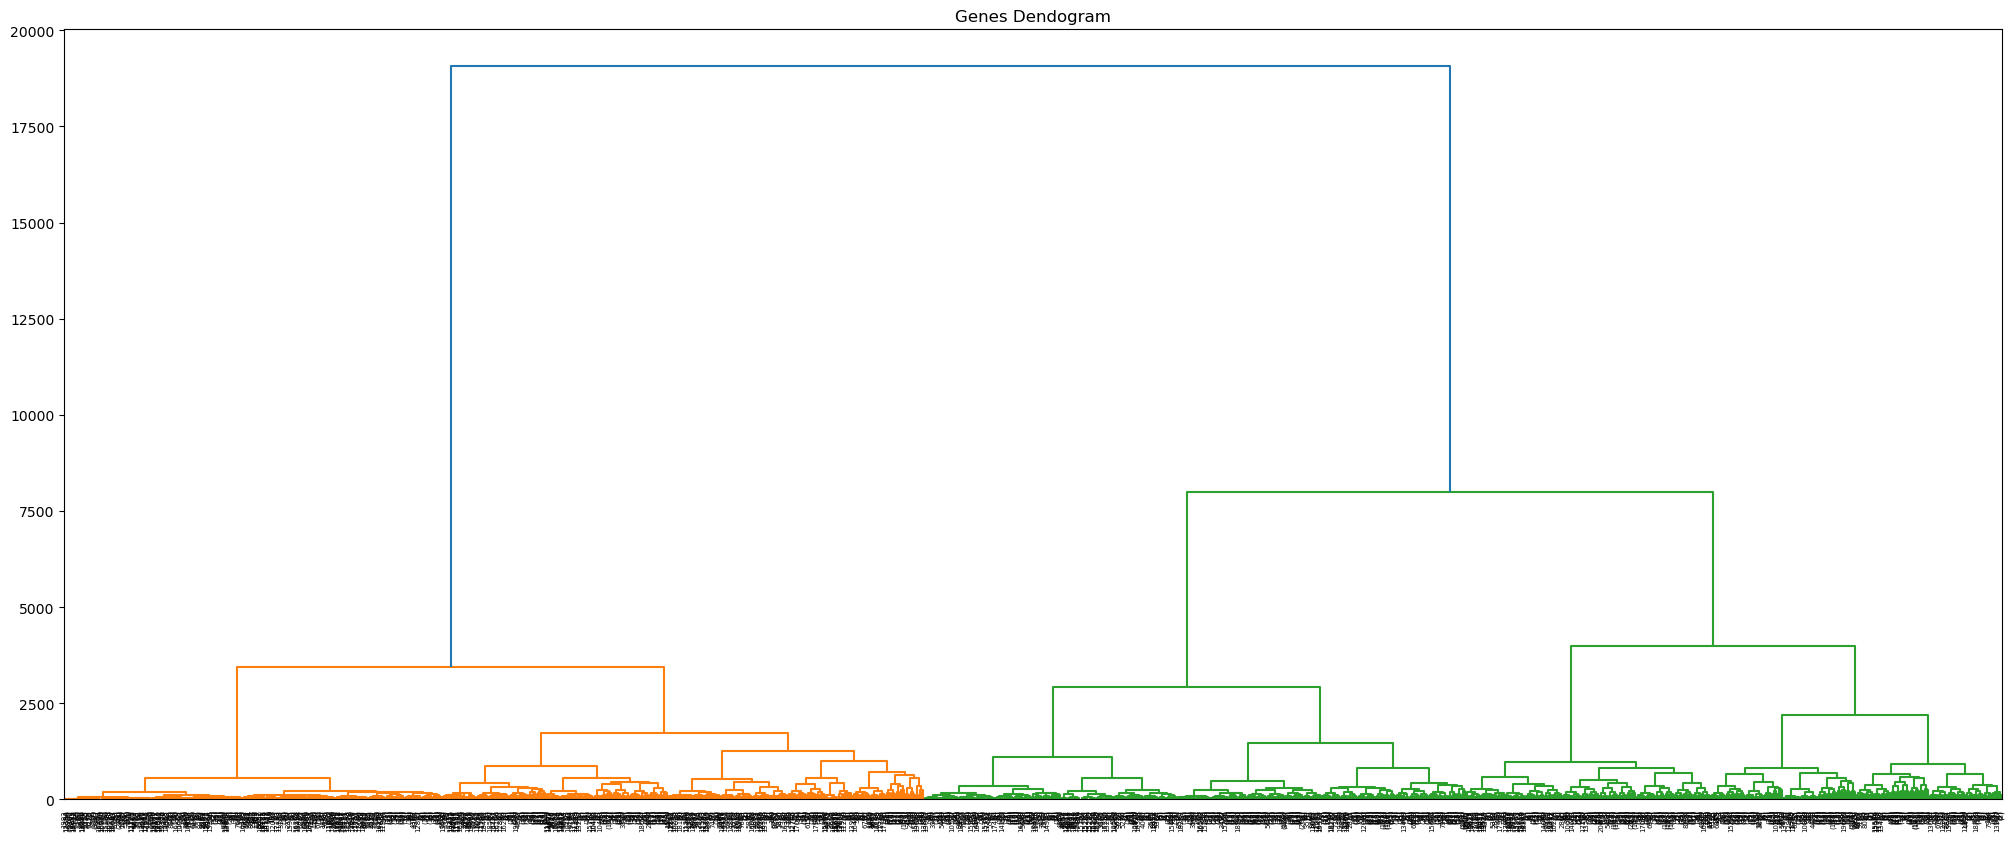

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Genes Dendogram")
dend = shc.dendrogram(shc.linkage(genes_data, method='ward'), p= 10, truncate_mode="level")

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = hierarchical_cluster.fit_predict(genes_data)
genes_clustered_hc = genes_data.copy()
genes_clustered_hc['Cluster'] = clusters
genes_clustered_hc.head(5)

sample_0  sample_1  sample_2   sample_3  sample_4  sample_5  \
gene_0   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
gene_1   2.017209  0.592732  3.511759   3.663618  2.655741  3.467853   
gene_2   3.265527  1.588421  4.327199   4.507649  2.821547  3.581918   
gene_3   5.478487  7.586157  6.881787   6.659068  6.539454  6.620243   
gene_4  10.431999  9.623011  9.870730  10.196184  9.738265  9.706829   

        sample_6  sample_7   sample_8  sample_9  ...  sample_792  sample_793  \
gene_0  0.000000  0.000000   0.000000  0.000000  ...    0.000000    0.000000   
gene_1  1.224966  2.854853   3.992125  3.642494  ...    4.337404    2.068224   
gene_2  1.691177  1.750478   2.772730  4.423558  ...    2.597126    0.857663   
gene_3  6.572007  7.226720   6.546692  6.849511  ...    6.070379    6.218739   
gene_4  9.640511  9.758691  10.488252  9.464466  ...    9.863990   10.623068   

        sample_794  sample_795  sample_796  sample_797  sample_798  \
gene_0    0.000000    0.436588    0.000000    0.000000    0.000000   
gene_1    4.288388    4.472176    1.865642    3.942955    3.249582   
gene_2    3.452490    4.908746    2.718197    4.453807    3.707492   
gene_3    7.209151    5.937848    7.350099    6.346597    8.185901   
gene_4    9.875620    9.330901   10.006003   10.056868    9.504082   

        sample_799  sample_800  Cluster  
gene_0    0.000000    0.000000        1  
gene_1    2.590339    2.325242        1  
gene_2    2.787976    3.805932        1  
gene_3    7.318624    6.530246        0  
gene_4    9.987136    9.560367        0  

[5 rows x 802 columns]

In [ ]:
genes_cluster_0_hc = genes_clustered_hc[genes_clustered_hc.Cluster==0]
print(genes_cluster_0_hc.shape)
genes_cluster_0_hc.head(5)

(14332, 802)


sample_0   sample_1  sample_2   sample_3   sample_4  sample_5  \
gene_3    5.478487   7.586157  6.881787   6.659068   6.539454  6.620243   
gene_4   10.431999   9.623011  9.870730  10.196184   9.738265  9.706829   
gene_6    7.175175   6.816049  6.972130   7.843375   6.566967  7.758510   
gene_19   5.619994  11.055208  8.210248   8.306317  10.149150  6.842765   
gene_22   9.796088  10.070470  8.970920   8.524616   8.047238  7.663935   

         sample_6  sample_7   sample_8  sample_9  ...  sample_792  sample_793  \
gene_3   6.572007  7.226720   6.546692  6.849511  ...    6.070379    6.218739   
gene_4   9.640511  9.758691  10.488252  9.464466  ...    9.863990   10.623068   
gene_6   6.754888  5.952103   7.690222  7.947216  ...    7.095112    6.634082   
gene_19  7.424200  7.373431  10.147625  7.856780  ...    9.887388    9.183588   
gene_22  9.973640  8.922008   8.343976  6.020051  ...    9.183437    9.341743   

         sample_794  sample_795  sample_796  sample_797  sample_798  \
gene_3     7.209151    5.937848    7.350099    6.346597    8.185901   
gene_4     9.875620    9.330901   10.006003   10.056868    9.504082   
gene_6     7.332717    7.254944    6.764792    7.320331    7.536589   
gene_19    9.316162    9.859712    7.763611    9.650467    9.326032   
gene_22    6.810816    7.470358    6.283574    8.113409    7.439839   

         sample_799  sample_800  Cluster  
gene_3     7.318624    6.530246        0  
gene_4     9.987136    9.560367        0  
gene_6     9.213464    7.957027        0  
gene_19    7.987867    9.261148        0  
gene_22    9.770383    7.880000        0  

[5 rows x 802 columns]

In [ ]:
genes_cluster_1_hc = genes_clustered_hc[genes_clustered_hc.Cluster==1]
print(genes_cluster_1_hc.shape)
genes_cluster_1_hc.head(5)

(6199, 802)


sample_0  sample_1  sample_2  sample_3  sample_4  sample_5  sample_6  \
gene_0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
gene_1  2.017209  0.592732  3.511759  3.663618  2.655741  3.467853  1.224966   
gene_2  3.265527  1.588421  4.327199  4.507649  2.821547  3.581918  1.691177   
gene_5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
gene_7  0.591871  0.000000  0.452595  0.434882  0.360982  0.000000  0.531868   

        sample_7  sample_8  sample_9  ...  sample_792  sample_793  sample_794  \
gene_0  0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
gene_1  2.854853  3.992125  3.642494  ...    4.337404    2.068224    4.288388   
gene_2  1.750478  2.772730  4.423558  ...    2.597126    0.857663    3.452490   
gene_5  0.000000  0.000000  0.000000  ...    0.000000    0.000000    0.000000   
gene_7  0.000000  0.352307  0.724214  ...    1.269512    0.789354    0.416948   

        sample_795  sample_796  sample_797  sample_798  sample_799  \
gene_0    0.436588    0.000000    0.000000    0.000000    0.000000   
gene_1    4.472176    1.865642    3.942955    3.249582    2.590339   
gene_2    4.908746    2.718197    4.453807    3.707492    2.787976   
gene_5    0.000000    0.000000    0.000000    0.000000    0.000000   
gene_7    0.429107    0.496922    0.000000    1.811101    0.000000   

        sample_800  Cluster  
gene_0    0.000000        1  
gene_1    2.325242        1  
gene_2    3.805932        1  
gene_5    0.000000        1  
gene_7    0.000000        1  

[5 rows x 802 columns]

### Observations:
- The best number of clusters for all the genes across all samples is 2.
- After hierarchical clustering, the 2 clusters have: 14332 genes (with similar values) and 6199 genes.

#### 2) Clustering the genes across samples of each cancer type
##### Cancer type 1: BRCA

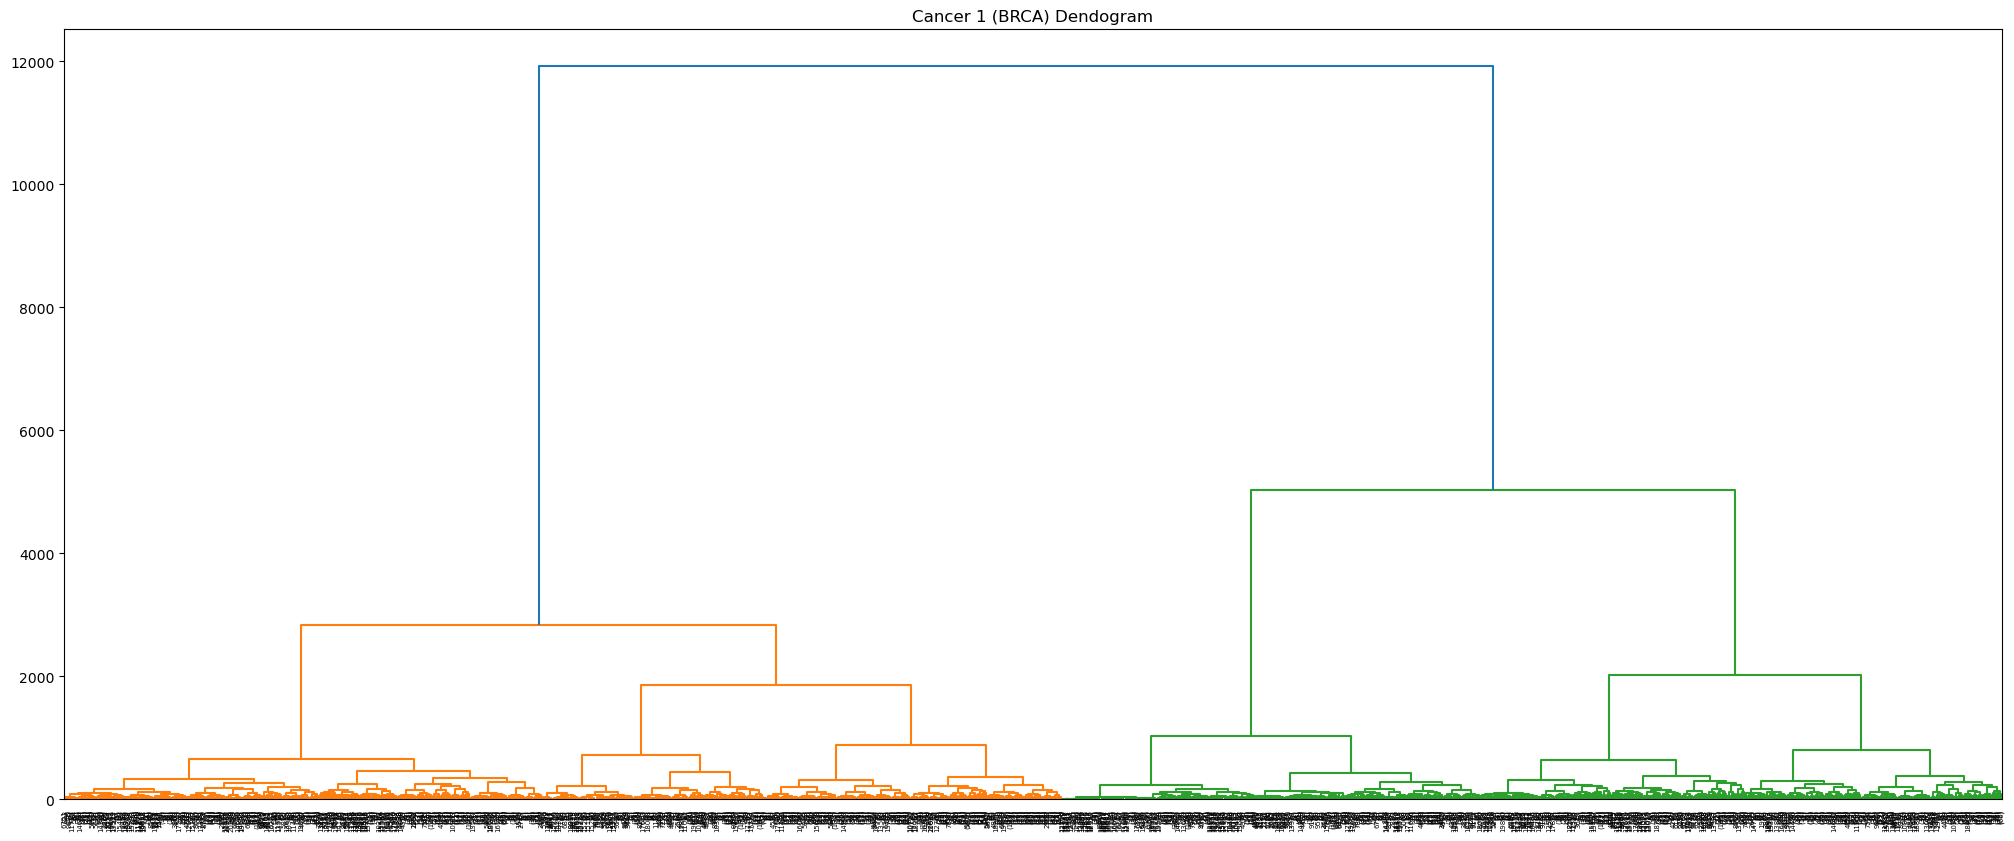

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Cancer 1 (BRCA) Dendogram")
dend = shc.dendrogram(shc.linkage(data_cancer_1, method='ward'), p= 10, truncate_mode="level")

In [ ]:
hierarchical_cluster_1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters_hc1 = hierarchical_cluster_1.fit_predict(data_cancer_1)
data_cancer_1_clustered_hc = data_cancer_1.copy()
data_cancer_1_clustered_hc['Cluster'] = clusters_hc1
data_cancer_1_clustered_hc.head(5)

sample_4   sample_8  sample_10  sample_13  sample_14 sample_15  \
gene_0       0.0        0.0        0.0        0.0        0.0       0.0   
gene_1  2.655741   3.992125   3.492071   1.551048   1.964842  2.901379   
gene_2  2.821547    2.77273   3.553373   3.529846    2.18301  3.685368   
gene_3  6.539454   6.546692   7.151707   6.326825   6.596832  6.669665   
gene_4  9.738265  10.488252  10.253446  10.633849  10.248141  9.999098   

       sample_20 sample_23 sample_27 sample_28  ... sample_782 sample_784  \
gene_0       0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1  2.066916  3.121844  0.657091  3.670081  ...   3.031942   2.656016   
gene_2  2.619953  2.473943  1.026304  3.382792  ...   2.575554   1.746958   
gene_3  6.757997  7.119616  5.411196  7.581939  ...   6.403079    6.64106   
gene_4  11.12394  10.73249  9.601388  9.386658  ...  10.485024  10.519164   

       sample_785 sample_787 sample_790 sample_791 sample_792 sample_793  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.752963   4.315436   2.301734   3.080061   4.337404   2.068224   
gene_2   1.960549   4.398385    1.81455   2.815739   2.597126   0.857663   
gene_3   5.748145   6.273313   7.013462   6.209617   6.070379   6.218739   
gene_4  10.248912   10.34689   9.750047   9.644469    9.86399  10.623068   

       sample_796 Cluster  
gene_0        0.0       0  
gene_1   1.865642       0  
gene_2   2.718197       0  
gene_3   7.350099       0  
gene_4  10.006003       1  

[5 rows x 301 columns]

In [ ]:
data_cancer_1_cluster_0_hc = data_cancer_1_clustered_hc[data_cancer_1_clustered_hc.Cluster==0]
print(data_cancer_1_cluster_0_hc.shape)
data_cancer_1_cluster_0_hc.head(5)

(9423, 301)


sample_4  sample_8 sample_10 sample_13 sample_14 sample_15 sample_20  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  2.655741  3.992125  3.492071  1.551048  1.964842  2.901379  2.066916   
gene_2  2.821547   2.77273  3.553373  3.529846   2.18301  3.685368  2.619953   
gene_3  6.539454  6.546692  7.151707  6.326825  6.596832  6.669665  6.757997   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

       sample_23 sample_27 sample_28  ... sample_782 sample_784 sample_785  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.121844  0.657091  3.670081  ...   3.031942   2.656016   2.752963   
gene_2  2.473943  1.026304  3.382792  ...   2.575554   1.746958   1.960549   
gene_3  7.119616  5.411196  7.581939  ...   6.403079    6.64106   5.748145   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   

       sample_787 sample_790 sample_791 sample_792 sample_793 sample_796  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   4.315436   2.301734   3.080061   4.337404   2.068224   1.865642   
gene_2   4.398385    1.81455   2.815739   2.597126   0.857663   2.718197   
gene_3   6.273313   7.013462   6.209617   6.070379   6.218739   7.350099   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   

       Cluster  
gene_0       0  
gene_1       0  
gene_2       0  
gene_3       0  
gene_5       0  

[5 rows x 301 columns]

In [ ]:
data_cancer_1_cluster_1_hc = data_cancer_1_clustered_hc[data_cancer_1_clustered_hc.Cluster==1]
print(data_cancer_1_cluster_1_hc.shape)
data_cancer_1_cluster_1_hc.head(5)

(11108, 301)


sample_4   sample_8  sample_10  sample_13  sample_14 sample_15  \
gene_4   9.738265  10.488252  10.253446  10.633849  10.248141  9.999098   
gene_6   6.566967   7.690222   8.301258   8.944659   7.087251  6.948834   
gene_19  10.14915  10.147625   7.965224   8.526534   7.993499  8.392201   
gene_22  8.047238   8.343976   8.115408  10.717848   9.580091   8.25743   
gene_27  8.821535   7.600537   9.540533   11.25076    9.03072  8.472504   

         sample_20 sample_23 sample_27 sample_28  ... sample_782 sample_784  \
gene_4    11.12394  10.73249  9.601388  9.386658  ...  10.485024  10.519164   
gene_6    5.415674  5.506031  6.263874  7.140523  ...   7.549723    6.80814   
gene_19   8.923743    7.6483  9.087505  9.380355  ...   8.113435   9.288271   
gene_22  10.103353  9.803679  6.926296  6.143283  ...   9.391585   7.917438   
gene_27   7.433101  8.820045   8.81254  8.365063  ...   8.225222   9.281184   

        sample_785 sample_787 sample_790 sample_791 sample_792 sample_793  \
gene_4   10.248912   10.34689   9.750047   9.644469    9.86399  10.623068   
gene_6    7.487173   7.770809   7.808366    6.35198   7.095112   6.634082   
gene_19  10.776038   9.119942   8.335922  10.249777   9.887388   9.183588   
gene_22    8.49758   8.332681    9.25842   5.951583   9.183437   9.341743   
gene_27   9.328062   8.538783   9.567538   7.482719   8.117939   8.349613   

        sample_796 Cluster  
gene_4   10.006003       1  
gene_6    6.764792       1  
gene_19   7.763611       1  
gene_22   6.283574       1  
gene_27   9.168667       1  

[5 rows x 301 columns]

### Observations:
- The best number of clusters for the genes for cancer type  1, BRCA, is 2.
- After hierarchical clustering, the 2 clusters have: 9423 genes (with similar values) and 11108 genes.

##### Cancer type 2: COAD

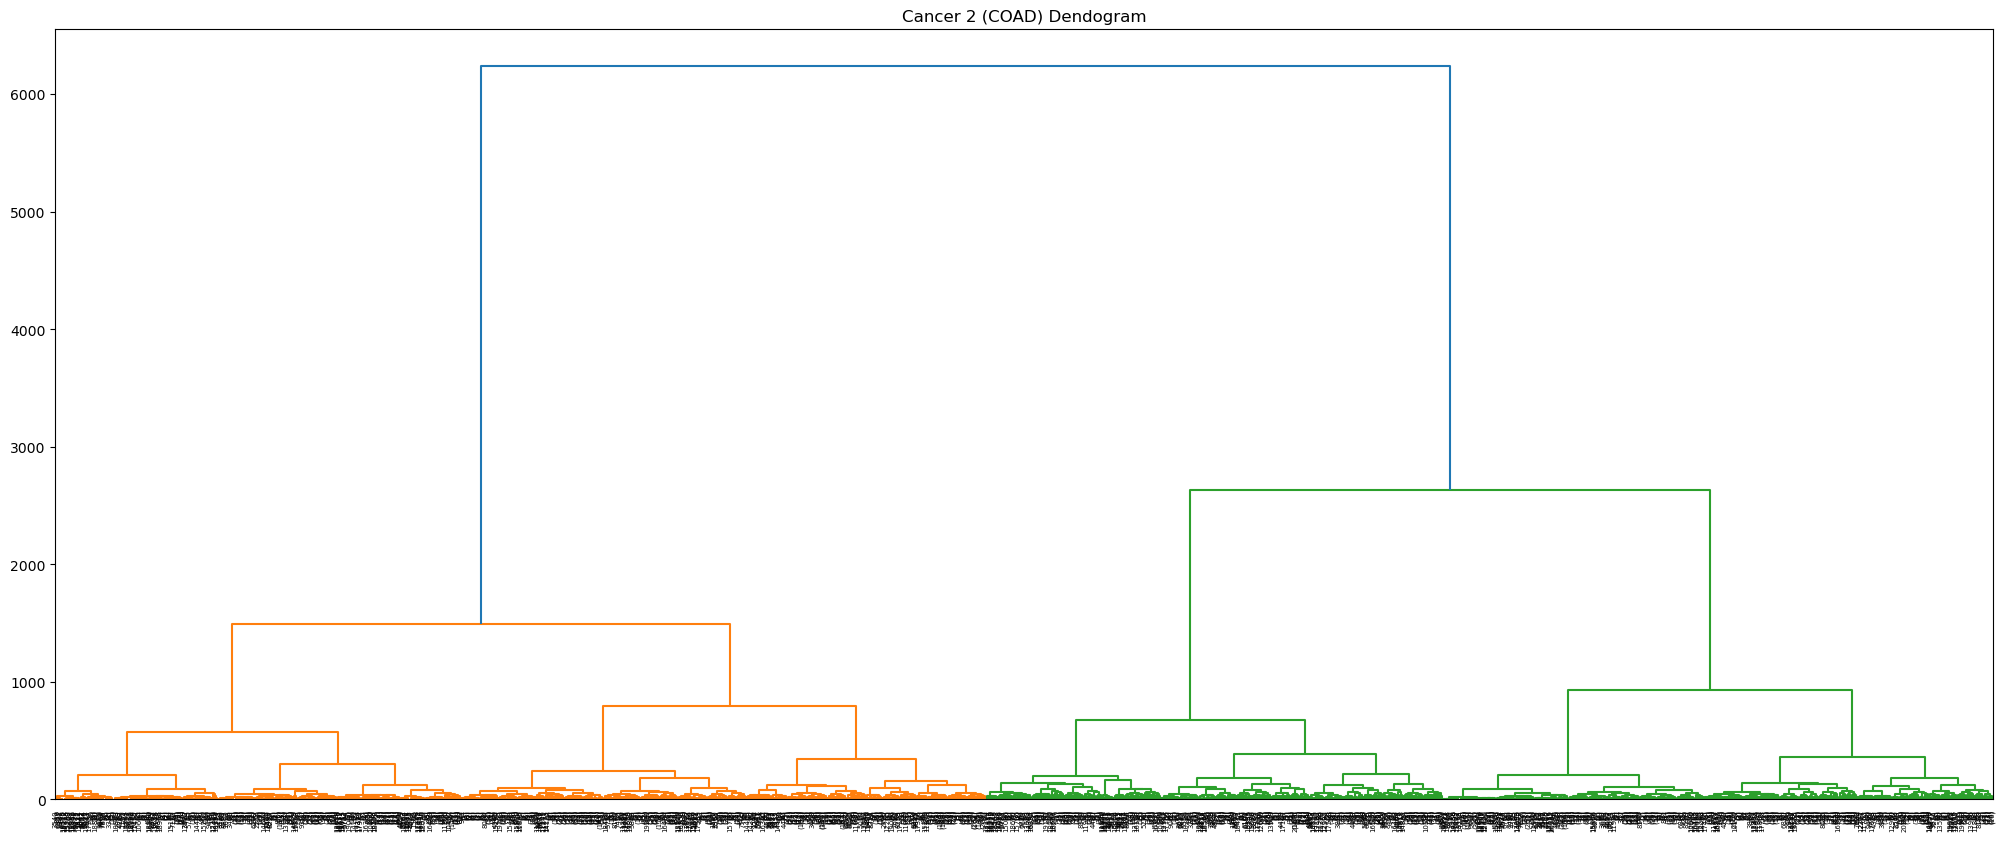

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Cancer 2 (COAD) Dendogram")
dend = shc.dendrogram(shc.linkage(data_cancer_2, method='ward'), p= 10, truncate_mode="level")

In [ ]:
hierarchical_cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters_hc2 = hierarchical_cluster_2.fit_predict(data_cancer_2)
data_cancer_2_clustered_hc = data_cancer_2.copy()
data_cancer_2_clustered_hc['Cluster'] = clusters_hc2
data_cancer_2_clustered_hc.head(5)

sample_26 sample_47  sample_54 sample_57  sample_65  sample_79  \
gene_0        0.0       0.0        0.0       0.0        0.0        0.0   
gene_1   2.325242   3.44619   2.554196  3.667699   3.821935   3.219029   
gene_2   3.247092  3.620962   1.296134  3.083179   3.717605   2.284781   
gene_3   8.174007  7.171917   8.770277  7.997292     7.5931   8.124178   
gene_4  10.065053  9.796559  10.462901  9.516886  10.205964  10.386132   

        sample_96 sample_107 sample_130 sample_132  ... sample_692 sample_693  \
gene_0    0.54409        0.0        0.0        0.0  ...        0.0        0.0   
gene_1   2.231647    4.18593   2.900548   1.624335  ...    4.37121   2.757237   
gene_2   3.833133   4.003944   3.695315   2.880039  ...   3.979833   2.416191   
gene_3   7.077296   7.827019   7.956126   7.849242  ...   7.773647   7.349162   
gene_4  10.795228  10.202038  10.168258   9.961128  ...  10.222396   9.439698   

       sample_713 sample_732 sample_745 sample_755 sample_766 sample_767  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   1.951215   2.297866   3.487692    5.21595   3.351332   4.672505   
gene_2   2.939603   3.468987   4.071145   3.787735   3.512277   5.151839   
gene_3   7.099474   8.253569   8.695938   7.986786   7.927849   7.273012   
gene_4   9.693903   9.370563   10.39623   9.278686   9.277999   9.688172   

       sample_798 Cluster  
gene_0        0.0       0  
gene_1   3.249582       0  
gene_2   3.707492       0  
gene_3   8.185901       1  
gene_4   9.504082       1  

[5 rows x 79 columns]

In [ ]:
data_cancer_2_cluster_0_hc = data_cancer_2_clustered_hc[data_cancer_2_clustered_hc.Cluster==0]
print(data_cancer_2_cluster_0_hc.shape)
data_cancer_2_cluster_0_hc.head(5)

(9860, 79)


sample_26 sample_47 sample_54 sample_57 sample_65 sample_79 sample_96  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0   0.54409   
gene_1  2.325242   3.44619  2.554196  3.667699  3.821935  3.219029  2.231647   
gene_2  3.247092  3.620962  1.296134  3.083179  3.717605  2.284781  3.833133   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7       0.0  1.972509       0.0  0.732486       0.0  0.521252   0.54409   

       sample_107 sample_130 sample_132  ... sample_692 sample_693 sample_713  \
gene_0        0.0        0.0        0.0  ...        0.0        0.0        0.0   
gene_1    4.18593   2.900548   1.624335  ...    4.37121   2.757237   1.951215   
gene_2   4.003944   3.695315   2.880039  ...   3.979833   2.416191   2.939603   
gene_5        0.0        0.0        0.0  ...        0.0        0.0        0.0   
gene_7   1.078542   0.410233        0.0  ...        0.0   0.566474   0.613437   

       sample_732 sample_745 sample_755 sample_766 sample_767 sample_798  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.297866   3.487692    5.21595   3.351332   4.672505   3.249582   
gene_2   3.468987   4.071145   3.787735   3.512277   5.151839   3.707492   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7        0.0        0.0   1.434882   0.755571        0.0   1.811101   

       Cluster  
gene_0       0  
gene_1       0  
gene_2       0  
gene_5       0  
gene_7       0  

[5 rows x 79 columns]

In [ ]:
data_cancer_2_cluster_1_hc = data_cancer_2_clustered_hc[data_cancer_2_clustered_hc.Cluster==1]
print(data_cancer_2_cluster_1_hc.shape)
data_cancer_2_cluster_1_hc.head(5)

(10671, 79)


sample_26 sample_47  sample_54  sample_57  sample_65  sample_79  \
gene_3    8.174007  7.171917   8.770277   7.997292     7.5931   8.124178   
gene_4   10.065053  9.796559  10.462901   9.516886  10.205964  10.386132   
gene_6    7.487446  8.175245   8.013993   7.925424   7.613185    5.78031   
gene_19   6.944554  8.617963   7.243802  10.178167   9.138154   7.154079   
gene_22    7.16366  7.783575  10.231857   7.065637   7.445346   8.697916   

         sample_96 sample_107 sample_130 sample_132  ... sample_692  \
gene_3    7.077296   7.827019   7.956126   7.849242  ...   7.773647   
gene_4   10.795228  10.202038  10.168258   9.961128  ...  10.222396   
gene_6    7.009056   7.442098   7.117165   7.426315  ...   7.561456   
gene_19   8.695754   8.894133   8.699756   7.921121  ...   8.687911   
gene_22   7.940272    8.08315   8.464762   8.739646  ...   7.584414   

        sample_693 sample_713 sample_732 sample_745 sample_755 sample_766  \
gene_3    7.349162   7.099474   8.253569   8.695938   7.986786   7.927849   
gene_4    9.439698   9.693903   9.370563   10.39623   9.278686   9.277999   
gene_6    6.073865   7.668445   6.718266    8.74514   7.966638   7.540322   
gene_19   7.901096   9.071009    8.83258   8.342235  11.613145  10.033272   
gene_22    8.56413   8.649745   7.011607   5.812347   6.325825   6.408905   

        sample_767 sample_798 Cluster  
gene_3    7.273012   8.185901       1  
gene_4    9.688172   9.504082       1  
gene_6    7.402969   7.536589       1  
gene_19   8.577648   9.326032       1  
gene_22   6.746944   7.439839       1  

[5 rows x 79 columns]

### Observations:
- The best number of clusters for for the genes for cancer type  2, COAD, is 2.
- After hierarchical clustering, the 2 clusters have: 9860 genes (with similar values) and 10671 genes.

##### Cancer type 3: KIRC

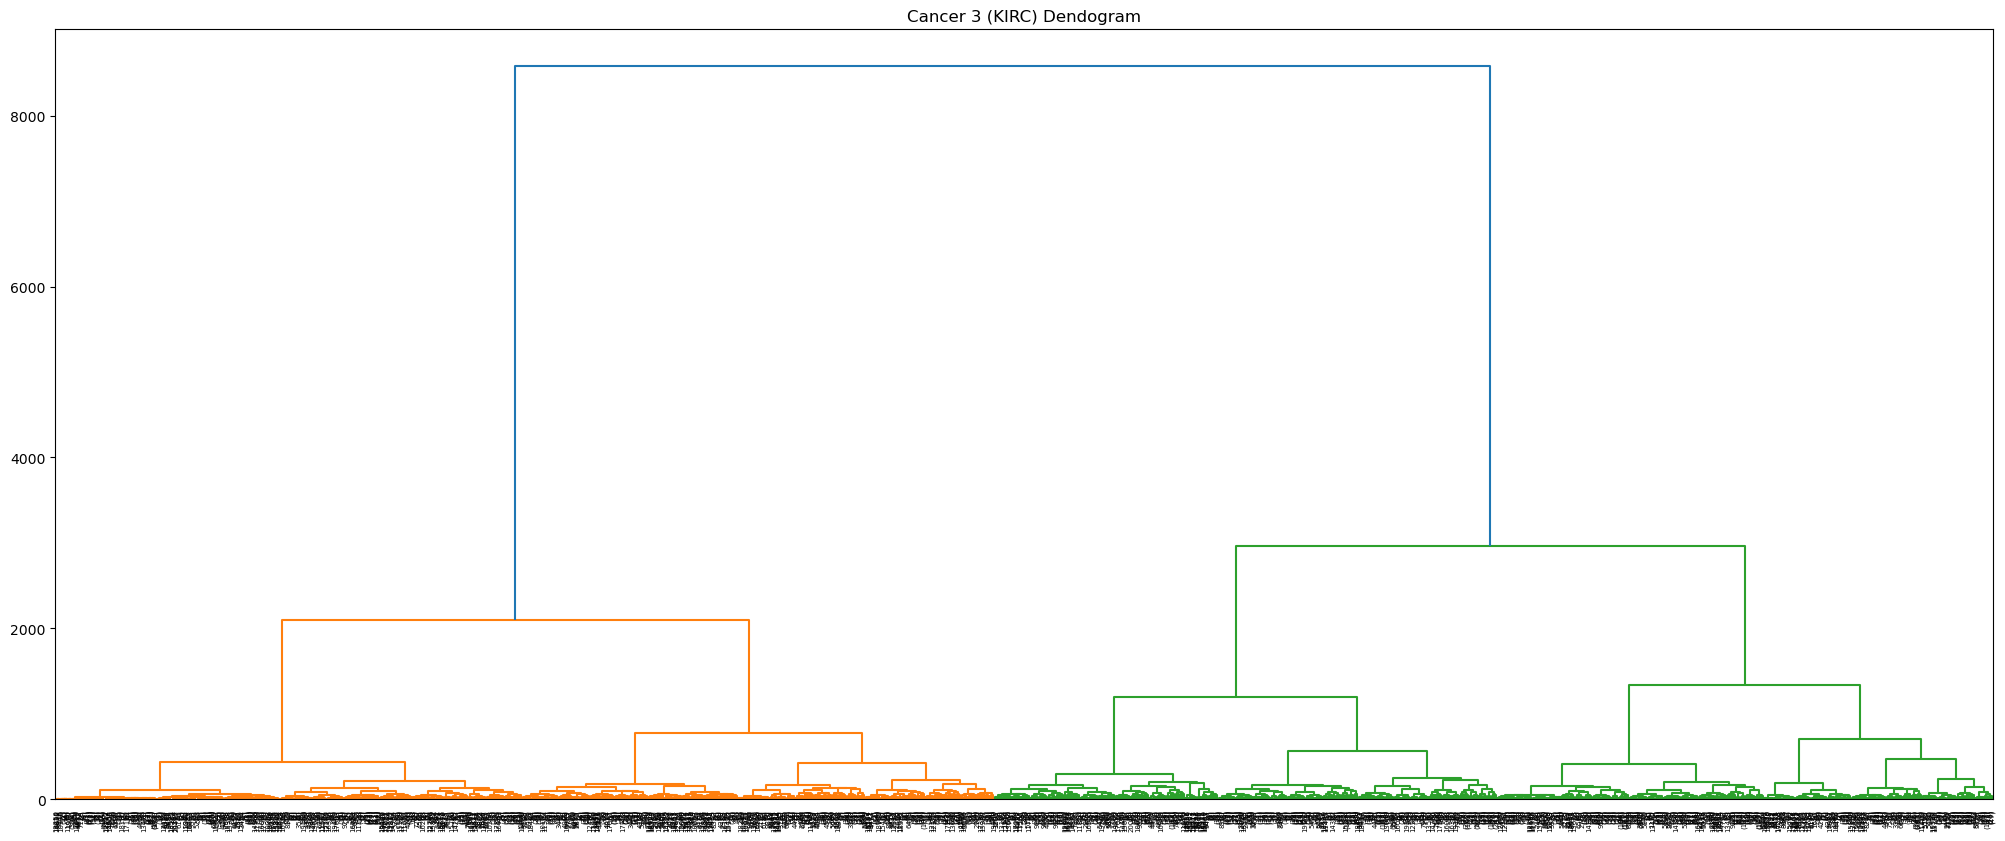

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Cancer 3 (KIRC) Dendogram")
dend = shc.dendrogram(shc.linkage(data_cancer_3, method='ward'), p= 10, truncate_mode="level")

In [ ]:
hierarchical_cluster_3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters_hc3 = hierarchical_cluster_3.fit_predict(data_cancer_3)
data_cancer_3_clustered_hc = data_cancer_3.copy()
data_cancer_3_clustered_hc['Cluster'] = clusters_hc3
data_cancer_3_clustered_hc.head(5)

sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  1.224966  2.941181  3.004519  1.541465  3.529783  4.801852       0.0   
gene_2  1.691177  2.663276  3.007178   2.54154  2.976712  2.648465  2.499578   
gene_3  6.572007   6.56169  6.524205  6.843255  6.038416  6.009255  6.950748   
gene_4  9.640511  9.376293  9.062661  9.444468  9.437973  9.611917  9.390092   

       sample_36 sample_40 sample_43  ... sample_736 sample_748 sample_764  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.384243  3.729379  3.757322  ...   3.910176   1.993022   2.578214   
gene_2  2.673624  2.293871  3.231048  ...   3.047661   1.271665   2.761498   
gene_3  6.679832   6.50571  6.722958  ...   5.887194   5.850139   5.988003   
gene_4   8.94676  8.555398  9.184962  ...   9.152794   9.685266   9.506998   

       sample_765 sample_774 sample_777 sample_781 sample_786 sample_789  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1    1.92391   2.542852   0.792022   1.499527    2.36446   1.687061   
gene_2   1.365581   2.020235    2.54201   3.213254   3.180689   2.826376   
gene_3   6.467914   5.083098   6.286147   6.873949   6.745049   5.830164   
gene_4     9.1765  10.328428   9.183747   9.091655   9.499661  10.921023   

       Cluster  
gene_0       1  
gene_1       1  
gene_2       1  
gene_3       0  
gene_4       0  

[5 rows x 147 columns]

In [ ]:
data_cancer_3_cluster_0_hc = data_cancer_3_clustered_hc[data_cancer_3_clustered_hc.Cluster==0]
print(data_cancer_3_cluster_0_hc.shape)
data_cancer_3_cluster_0_hc.head(5)

(13460, 147)


sample_6 sample_11 sample_17  sample_18  sample_21 sample_24  \
gene_3   6.572007   6.56169  6.524205   6.843255   6.038416  6.009255   
gene_4   9.640511  9.376293  9.062661   9.444468   9.437973  9.611917   
gene_6   6.754888  7.860323  7.995937   5.479091   5.893828   6.38136   
gene_18  9.466878  8.732354  8.805347   7.433377   6.473824  10.31227   
gene_19    7.4242  9.796182   8.31715  10.602717  10.199182  10.91369   

        sample_32  sample_36  sample_40 sample_43  ... sample_736 sample_748  \
gene_3   6.950748   6.679832    6.50571  6.722958  ...   5.887194   5.850139   
gene_4   9.390092    8.94676   8.555398  9.184962  ...   9.152794   9.685266   
gene_6   5.018937   6.554681   7.798459   7.83394  ...   8.536169    6.53759   
gene_18  7.557448   9.161752  10.538208  8.320151  ...    8.00151    7.19023   
gene_19  9.973496  10.441035  10.072508  7.924379  ...  10.012233  10.872936   

        sample_764 sample_765 sample_774 sample_777 sample_781 sample_786  \
gene_3    5.988003   6.467914   5.083098   6.286147   6.873949   6.745049   
gene_4    9.506998     9.1765  10.328428   9.183747   9.091655   9.499661   
gene_6    6.741386   6.597762   4.852848   9.758661   4.812057   6.455861   
gene_18   9.512065   6.299135   8.020447   8.996369   9.950043   4.969556   
gene_19   7.163398   9.793995   9.580715     8.0083  10.302433   9.667497   

        sample_789 Cluster  
gene_3    5.830164       0  
gene_4   10.921023       0  
gene_6    5.235528       0  
gene_18   6.299219       0  
gene_19   9.604564       0  

[5 rows x 147 columns]

In [ ]:
data_cancer_3_cluster_1_hc = data_cancer_3_clustered_hc[data_cancer_3_clustered_hc.Cluster==1]
print(data_cancer_3_cluster_1_hc.shape)
data_cancer_3_cluster_1_hc.head(5)

(7071, 147)


sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  1.224966  2.941181  3.004519  1.541465  3.529783  4.801852       0.0   
gene_2  1.691177  2.663276  3.007178   2.54154  2.976712  2.648465  2.499578   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7  0.531868  0.754118  1.687419       0.0       0.0  0.902498       0.0   

       sample_36 sample_40 sample_43  ... sample_736 sample_748 sample_764  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.384243  3.729379  3.757322  ...   3.910176   1.993022   2.578214   
gene_2  2.673624  2.293871  3.231048  ...   3.047661   1.271665   2.761498   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_7  0.454702  0.742955  0.495695  ...   1.977573        0.0   1.831958   

       sample_765 sample_774 sample_777 sample_781 sample_786 sample_789  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1    1.92391   2.542852   0.792022   1.499527    2.36446   1.687061   
gene_2   1.365581   2.020235    2.54201   3.213254   3.180689   2.826376   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7   0.391988        0.0    0.54893        0.0   0.881665        0.0   

       Cluster  
gene_0       1  
gene_1       1  
gene_2       1  
gene_5       1  
gene_7       1  

[5 rows x 147 columns]

### Observations:
- The best number of clusters for for the genes for cancer type  3, KIRC, is 2.
- After hierarchical clustering, the 2 clusters have: 13460 genes (with similar values) and 7071 genes.

##### Cancer type 4: LUAD

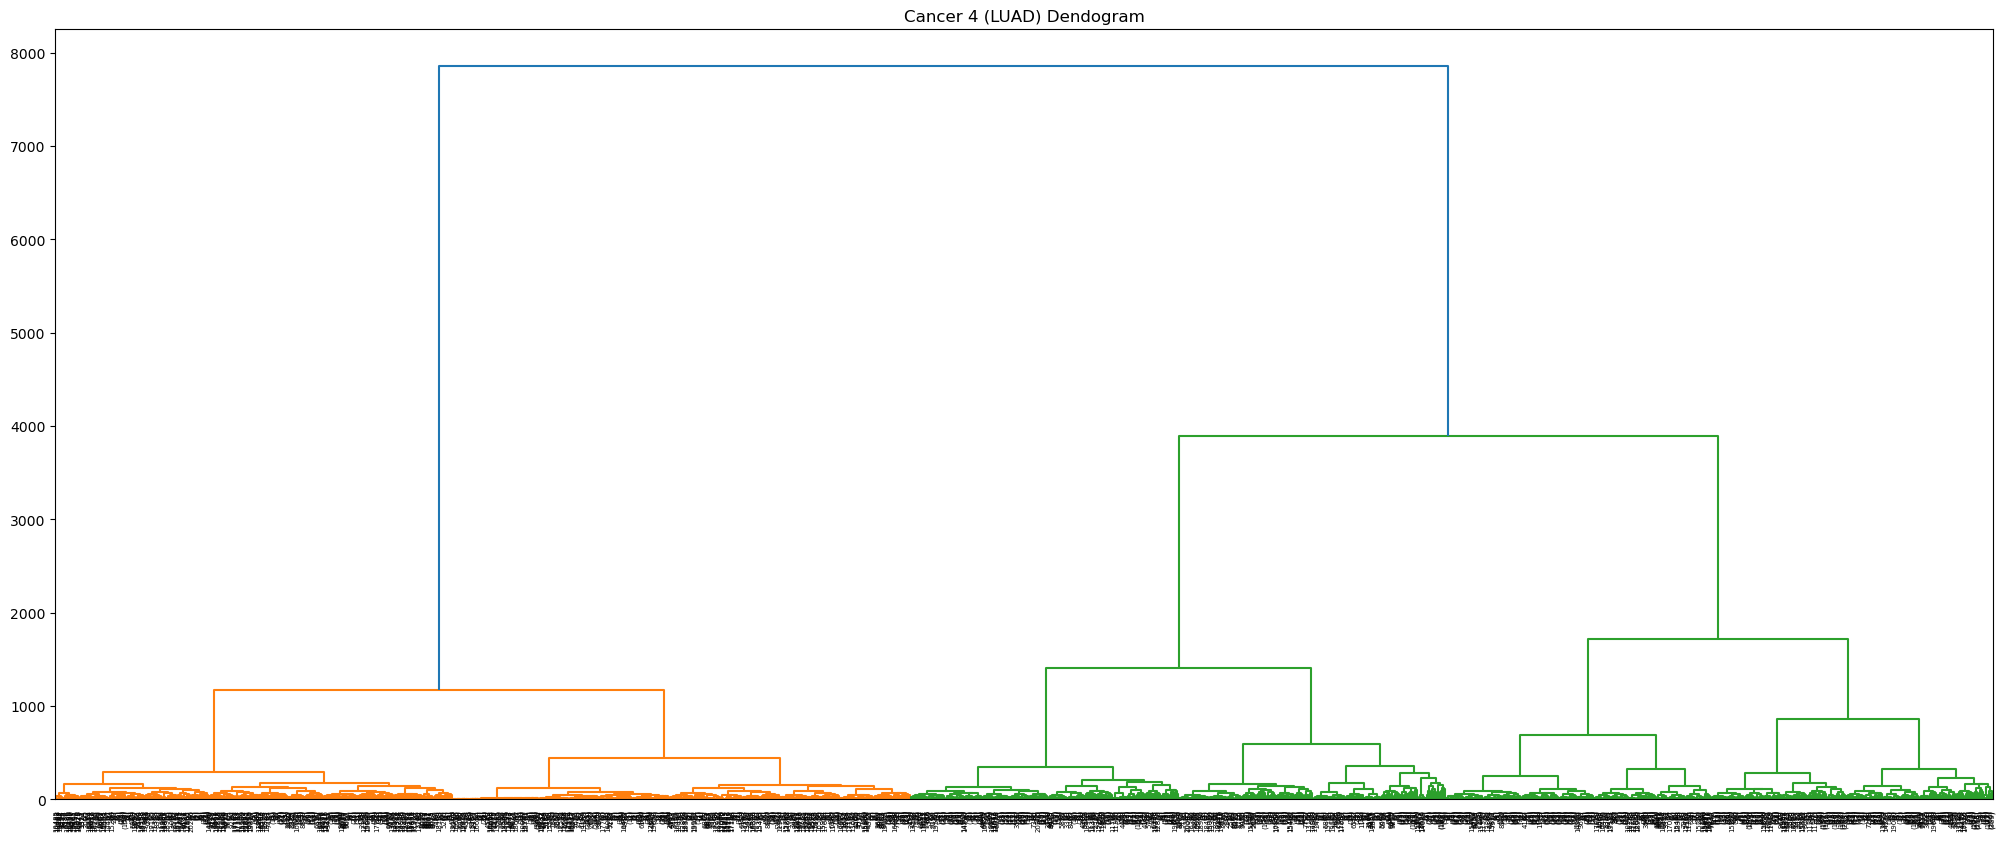

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Cancer 4 (LUAD) Dendogram")
dend = shc.dendrogram(shc.linkage(data_cancer_4, method='ward'), p= 10, truncate_mode="level")

In [ ]:
hierarchical_cluster_4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters_hc4 = hierarchical_cluster_4.fit_predict(data_cancer_4)
data_cancer_4_clustered_hc = data_cancer_4.copy()
data_cancer_4_clustered_hc['Cluster'] = clusters_hc4
data_cancer_4_clustered_hc.head(5)

sample_1 sample_16 sample_22 sample_25 sample_37  sample_49  \
gene_0       0.0       0.0       0.0  0.341758       0.0        0.0   
gene_1  0.592732  3.460913  1.131853  4.317702  4.416259   4.577822   
gene_2  1.588421  3.618474  2.351515  3.642678  4.188978   3.800237   
gene_3  7.586157  5.661048  6.845841  6.790003  6.664198    7.28078   
gene_4  9.623011  9.731217   9.19686  8.435999  9.070819  10.153223   

        sample_51 sample_60 sample_63 sample_73  ... sample_763 sample_771  \
gene_0        0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1   3.858916  1.005687  4.418817  3.425688  ...   4.235061   3.683427   
gene_2   4.324523  2.075088  3.555374  3.836631  ...   4.218874   4.158555   
gene_3    6.70838  6.899985  6.468829  6.499878  ...   6.542637   5.976767   
gene_4  10.240899  9.789379  9.777303  9.171247  ...   8.981995  10.272548   

       sample_773 sample_776 sample_778 sample_779 sample_780 sample_795  \
gene_0        0.0        0.0        0.0        0.0        0.0   0.436588   
gene_1   3.280006        0.0   3.834731   3.482255   1.693944   4.472176   
gene_2   3.607425   2.316406   1.894372   3.064952   2.605139   4.908746   
gene_3   5.659805   6.510695   6.314852   6.699288   6.487568   5.937848   
gene_4  10.064864   9.932385   10.96437  10.134182   9.533067   9.330901   

       sample_797 Cluster  
gene_0        0.0       1  
gene_1   3.942955       1  
gene_2   4.453807       1  
gene_3   6.346597       0  
gene_4  10.056868       0  

[5 rows x 142 columns]

In [ ]:
data_cancer_4_cluster_0_hc = data_cancer_4_clustered_hc[data_cancer_4_clustered_hc.Cluster==0]
print(data_cancer_4_cluster_0_hc.shape)
data_cancer_4_cluster_0_hc.head(5)

(15151, 142)


sample_1  sample_16 sample_22 sample_25 sample_37  sample_49  \
gene_3    7.586157   5.661048  6.845841  6.790003  6.664198    7.28078   
gene_4    9.623011   9.731217   9.19686  8.435999  9.070819  10.153223   
gene_6    6.816049   8.435591  7.853827  8.573628  7.915318   7.183417   
gene_19  11.055208  10.103576  9.986724  9.708972  9.107863   9.517039   
gene_22   10.07047   9.097097  6.329574   8.75864  7.941206   8.363587   

         sample_51  sample_60 sample_63 sample_73  ... sample_763 sample_771  \
gene_3     6.70838   6.899985  6.468829  6.499878  ...   6.542637   5.976767   
gene_4   10.240899   9.789379  9.777303  9.171247  ...   8.981995  10.272548   
gene_6    6.401096   6.684356  6.361089  6.486645  ...   6.571407    6.69566   
gene_19   7.750258  10.137747   8.54119  9.732366  ...   9.478873   7.807986   
gene_22   9.872593   9.945772  9.502112  8.327121  ...   8.588149   9.826145   

        sample_773 sample_776 sample_778 sample_779 sample_780 sample_795  \
gene_3    5.659805   6.510695   6.314852   6.699288   6.487568   5.937848   
gene_4   10.064864   9.932385   10.96437  10.134182   9.533067   9.330901   
gene_6    7.436253   6.442733   7.437053   5.946555   7.762987   7.254944   
gene_19   9.790554  10.005723    9.41712   8.890824   9.975318   9.859712   
gene_22   7.357244   9.377239   9.039366   7.165349   8.519601   7.470358   

        sample_797 Cluster  
gene_3    6.346597       0  
gene_4   10.056868       0  
gene_6    7.320331       0  
gene_19   9.650467       0  
gene_22   8.113409       0  

[5 rows x 142 columns]

In [ ]:
data_cancer_4_cluster_1_hc = data_cancer_4_clustered_hc[data_cancer_4_clustered_hc.Cluster==1]
print(data_cancer_4_cluster_1_hc.shape)
data_cancer_4_cluster_1_hc.head(5)

(5380, 142)


sample_1 sample_16 sample_22 sample_25 sample_37 sample_49 sample_51  \
gene_0       0.0       0.0       0.0  0.341758       0.0       0.0       0.0   
gene_1  0.592732  3.460913  1.131853  4.317702  4.416259  4.577822  3.858916   
gene_2  1.588421  3.618474  2.351515  3.642678  4.188978  3.800237  4.324523   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_7       0.0  1.033652  0.462785  1.216051  0.906275       0.0       0.0   

       sample_60 sample_63 sample_73  ... sample_763 sample_771 sample_773  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  1.005687  4.418817  3.425688  ...   4.235061   3.683427   3.280006   
gene_2  2.075088  3.555374  3.836631  ...   4.218874   4.158555   3.607425   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_7       0.0       0.0  0.365021  ...        0.0    0.69964   0.657091   

       sample_776 sample_778 sample_779 sample_780 sample_795 sample_797  \
gene_0        0.0        0.0        0.0        0.0   0.436588        0.0   
gene_1        0.0   3.834731   3.482255   1.693944   4.472176   3.942955   
gene_2   2.316406   1.894372   3.064952   2.605139   4.908746   4.453807   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   
gene_7        0.0        0.0        0.0        0.0   0.429107        0.0   

       Cluster  
gene_0       1  
gene_1       1  
gene_2       1  
gene_5       1  
gene_7       1  

[5 rows x 142 columns]

### Observations:
- The best number of clusters for for the genes for cancer type  4, LUAD, is 2.
- After hierarchical clustering, the 2 clusters have: 15151 genes (with similar values) and 5380 genes.

##### Cancer type 5: PRAD

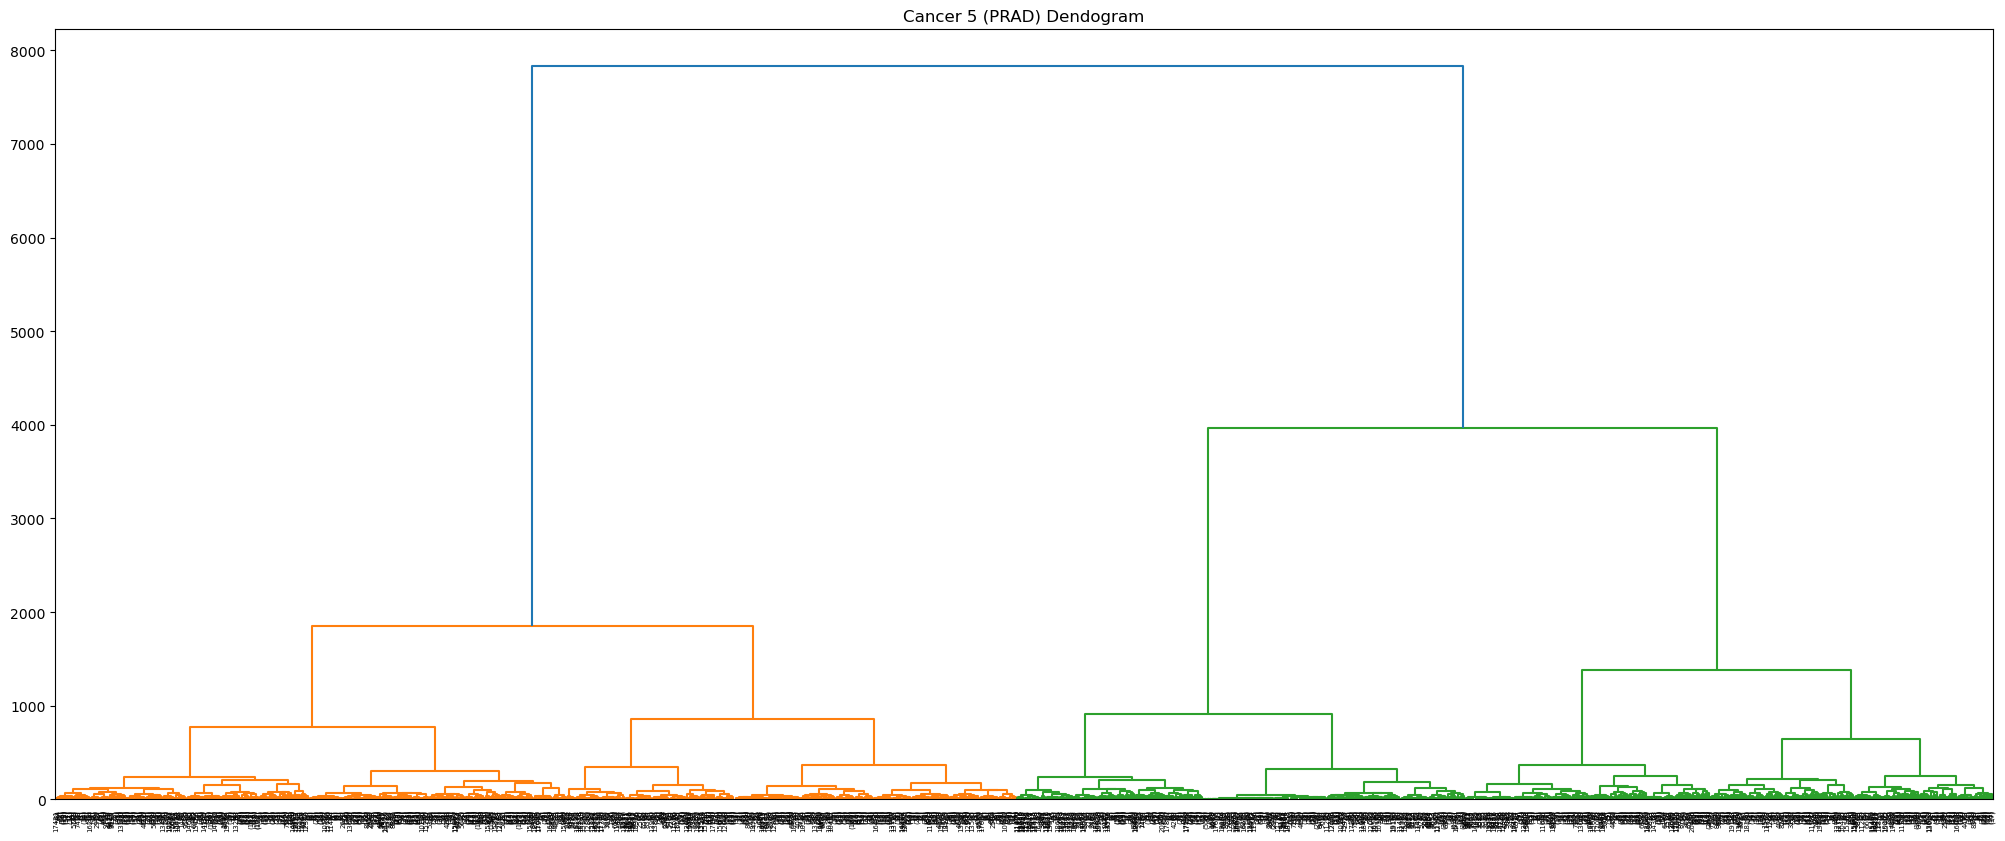

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Cancer 5 (PRAD) Dendogram")
dend = shc.dendrogram(shc.linkage(data_cancer_5, method='ward'), p= 10, truncate_mode="level")

In [ ]:
hierarchical_cluster_5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters_hc5 = hierarchical_cluster_5.fit_predict(data_cancer_5)
data_cancer_5_clustered_hc = data_cancer_5.copy()
data_cancer_5_clustered_hc['Cluster'] = clusters_hc5
data_cancer_5_clustered_hc.head(5)

sample_0  sample_2   sample_3  sample_5  sample_7  sample_9  \
gene_0        0.0       0.0        0.0       0.0       0.0       0.0   
gene_1   2.017209  3.511759   3.663618  3.467853  2.854853  3.642494   
gene_2   3.265527  4.327199   4.507649  3.581918  1.750478  4.423558   
gene_3   5.478487  6.881787   6.659068  6.620243   7.22672  6.849511   
gene_4  10.431999   9.87073  10.196184  9.706829  9.758691  9.464466   

       sample_12 sample_19 sample_34 sample_41  ... sample_741 sample_743  \
gene_0       0.0       0.0  0.631523       0.0  ...   0.408603        0.0   
gene_1  3.970348  4.167583   3.19022  3.026375  ...    4.40131   4.522953   
gene_2  2.364292  3.841389  5.690191  4.364103  ...   4.418905   3.924413   
gene_3  7.145443  6.976123  5.770615  7.164917  ...   6.524161   7.441218   
gene_4  9.240605  9.982252  9.207844  9.552402  ...   9.406262   9.959676   

       sample_752 sample_754 sample_783 sample_788 sample_794 sample_799  \
gene_0   0.404031        0.0        0.0        0.0        0.0        0.0   
gene_1   4.449324   2.146101   2.060705     4.8692   4.288388   2.590339   
gene_2   4.419337   3.404753    3.71983   4.087717    3.45249   2.787976   
gene_3   7.176981   7.255227   6.427137   6.369039   7.209151   7.318624   
gene_4   9.551633  10.704016  10.432187   9.684507    9.87562   9.987136   

       sample_800 Cluster  
gene_0        0.0       0  
gene_1   2.325242       0  
gene_2   3.805932       0  
gene_3   6.530246       0  
gene_4   9.560367       1  

[5 rows x 137 columns]

In [ ]:
data_cancer_5_cluster_0_hc = data_cancer_5_clustered_hc[data_cancer_5_clustered_hc.Cluster==0]
print(data_cancer_5_cluster_0_hc.shape)
data_cancer_5_cluster_0_hc.head(5)

(10332, 137)


sample_0  sample_2  sample_3  sample_5  sample_7  sample_9 sample_12  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  2.017209  3.511759  3.663618  3.467853  2.854853  3.642494  3.970348   
gene_2  3.265527  4.327199  4.507649  3.581918  1.750478  4.423558  2.364292   
gene_3  5.478487  6.881787  6.659068  6.620243   7.22672  6.849511  7.145443   
gene_5       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

       sample_19 sample_34 sample_41  ... sample_741 sample_743 sample_752  \
gene_0       0.0  0.631523       0.0  ...   0.408603        0.0   0.404031   
gene_1  4.167583   3.19022  3.026375  ...    4.40131   4.522953   4.449324   
gene_2  3.841389  5.690191  4.364103  ...   4.418905   3.924413   4.419337   
gene_3  6.976123  5.770615  7.164917  ...   6.524161   7.441218   7.176981   
gene_5       0.0       0.0       0.0  ...        0.0        0.0        0.0   

       sample_754 sample_783 sample_788 sample_794 sample_799 sample_800  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.146101   2.060705     4.8692   4.288388   2.590339   2.325242   
gene_2   3.404753    3.71983   4.087717    3.45249   2.787976   3.805932   
gene_3   7.255227   6.427137   6.369039   7.209151   7.318624   6.530246   
gene_5        0.0        0.0        0.0        0.0        0.0        0.0   

       Cluster  
gene_0       0  
gene_1       0  
gene_2       0  
gene_3       0  
gene_5       0  

[5 rows x 137 columns]

In [ ]:
data_cancer_5_cluster_1_hc = data_cancer_5_clustered_hc[data_cancer_5_clustered_hc.Cluster==1]
print(data_cancer_5_cluster_1_hc.shape)
data_cancer_5_cluster_1_hc.head(5)

(10199, 137)


sample_0  sample_2   sample_3  sample_5  sample_7  sample_9  \
gene_4   10.431999   9.87073  10.196184  9.706829  9.758691  9.464466   
gene_6    7.175175   6.97213   7.843375   7.75851  5.952103  7.947216   
gene_19   5.619994  8.210248   8.306317  6.842765  7.373431   7.85678   
gene_22   9.796088   8.97092   8.524616  7.663935  8.922008  6.020051   
gene_27   10.83907  9.861616   9.511573  9.628387  9.406279  9.871312   

        sample_12 sample_19  sample_34 sample_41  ... sample_741 sample_743  \
gene_4   9.240605  9.982252   9.207844  9.552402  ...   9.406262   9.959676   
gene_6   7.810758  6.977372   8.206262   7.90352  ...   7.251624   8.158786   
gene_19  9.217032  7.890471   7.831624  7.534505  ...   9.943318   8.483022   
gene_22  8.174142  8.368799   8.499025   8.39154  ...   6.846869   7.995496   
gene_27   9.30999  9.641822  10.257341  9.740786  ...   9.217262   9.837953   

        sample_752 sample_754 sample_783 sample_788 sample_794 sample_799  \
gene_4    9.551633  10.704016  10.432187   9.684507    9.87562   9.987136   
gene_6    8.669874   8.653469    8.35376   7.929903   7.332717   9.213464   
gene_19   9.133091   6.388055   5.613579   9.153674   9.316162   7.987867   
gene_22   6.863195   9.403928   9.077053   7.179372   6.810816   9.770383   
gene_27   9.686001   9.125194  11.498555   9.159773   9.642637  10.163713   

        sample_800 Cluster  
gene_4    9.560367       1  
gene_6    7.957027       1  
gene_19   9.261148       1  
gene_22       7.88       1  
gene_27    9.28807       1  

[5 rows x 137 columns]

### Observations:
- The best number of clusters for for the genes for cancer type  5, PRAD, is 2.
- After hierarchical clustering, the 2 clusters have: 10332 genes (with similar values) and 10199 genes.

#### 3) Clustering all samples 

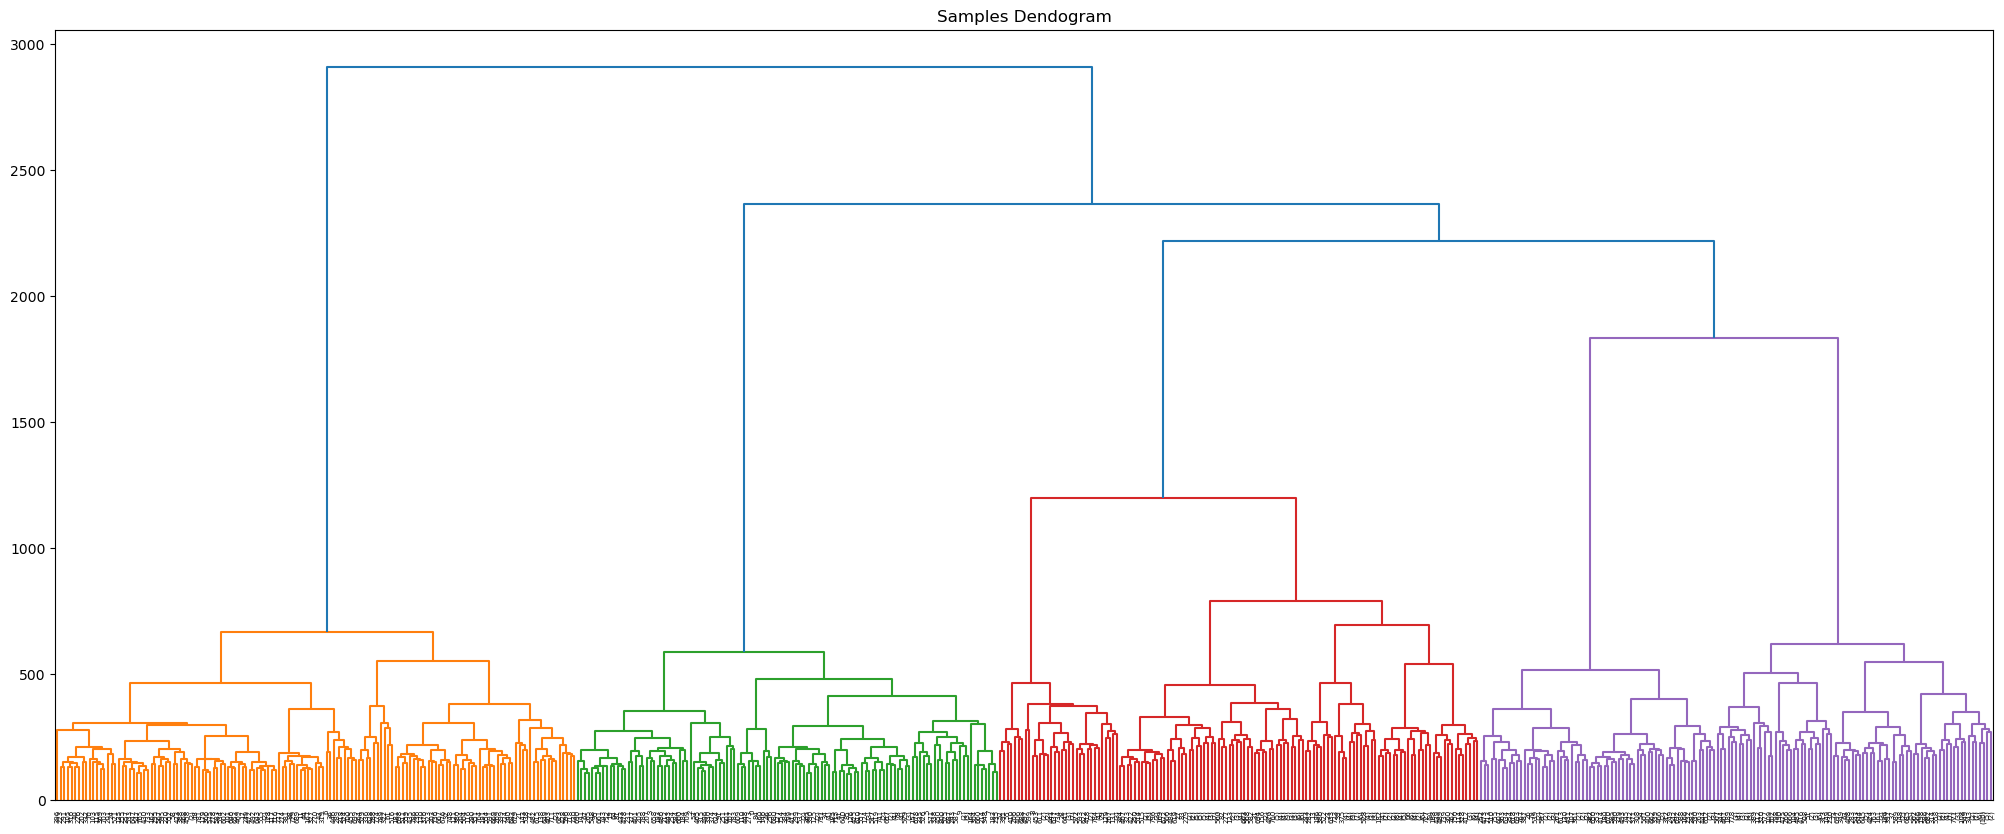

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Samples Dendogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'), p= 10, truncate_mode="level")

In [ ]:
hierarchical_cluster_samples = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters_hcs = hierarchical_cluster_samples.fit_predict(data)
data_clustered_hc = data.copy()
data_clustered_hc['Cluster'] = clusters_hcs
data_clustered_hc['Class'] = all_data['Class']
data_clustered_hc.head(5)

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_0  0.591871     0.0     0.0  ...    9.723516    7.220030    9.119813   
sample_1  0.000000     0.0     0.0  ...    9.740931    6.256586    8.381612   
sample_2  0.452595     0.0     0.0  ...   10.908640    5.401607    9.911597   
sample_3  0.434882     0.0     0.0  ...   10.141520    8.942805    9.601208   
sample_4  0.360982     0.0     0.0  ...   10.373790    7.181162    9.846910   

          gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  Cluster  \
sample_0   12.003135    9.650743    8.921326    5.286759         0.0        2   
sample_1   12.674552   10.517059    9.397854    2.094168         0.0        3   
sample_2    9.045255    9.788359   10.090470    1.683023         0.0        2   
sample_3   11.392682    9.694814    9.684365    3.292001         0.0        2   
sample_4   11.922439    9.217749    9.461191    5.110372         0.0        0   

          Class  
sample_0   PRAD  
sample_1   LUAD  
sample_2   PRAD  
sample_3   PRAD  
sample_4   BRCA  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_1_hc = data_clustered_hc[data_clustered_hc.Class=="BRCA"]
print(data_clustered_cancer_1_hc.shape)
data_clustered_cancer_1_hc.head(5)

(300, 20533)


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_4      0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
sample_8      0.0  3.992125  2.772730  6.546692  10.488252     0.0  7.690222   
sample_10     0.0  3.492071  3.553373  7.151707  10.253446     0.0  8.301258   
sample_13     0.0  1.551048  3.529846  6.326825  10.633849     0.0  8.944659   
sample_14     0.0  1.964842  2.183010  6.596832  10.248141     0.0  7.087251   

             gene_7  gene_8    gene_9  ...  gene_20523  gene_20524  \
sample_4   0.360982     0.0  0.000000  ...   10.373790    7.181162   
sample_8   0.352307     0.0  4.067604  ...    9.763753    7.933278   
sample_10  0.000000     0.0  0.000000  ...   10.042261    6.580103   
sample_13  0.000000     0.0  0.000000  ...    9.379835    7.195800   
sample_14  0.441483     0.0  0.000000  ...   10.404567    6.588536   

           gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
sample_4     9.846910   11.922439    9.217749    9.461191    5.110372   
sample_8    10.952880   12.498919   10.389954   10.390255    7.828321   
sample_10    9.785004   12.383834    9.869359    8.991768    5.735121   
sample_13    8.907645   12.079481    9.218936    8.104101    3.660894   
sample_14    8.952596   10.461725   10.582857    9.488141    3.261967   

           gene_20530  Cluster  Class  
sample_4     0.000000        0   BRCA  
sample_8     0.000000        0   BRCA  
sample_10    0.892818        0   BRCA  
sample_13    0.000000        0   BRCA  
sample_14    0.000000        0   BRCA  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_1_hc["Cluster"].value_counts()

0    299
3      1
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_2_hc = data_clustered_hc[data_clustered_hc.Class=="COAD"]
print(data_clustered_cancer_2_hc.shape)
data_clustered_cancer_2_hc.head(5)

(78, 20533)


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_26     0.0  2.325242  3.247092  8.174007  10.065053     0.0  7.487446   
sample_47     0.0  3.446190  3.620962  7.171917   9.796559     0.0  8.175245   
sample_54     0.0  2.554196  1.296134  8.770277  10.462901     0.0  8.013993   
sample_57     0.0  3.667699  3.083179  7.997292   9.516886     0.0  7.925424   
sample_65     0.0  3.821935  3.717605  7.593100  10.205964     0.0  7.613185   

             gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_26  0.000000     0.0     0.0  ...   10.097084    0.566572    9.414850   
sample_47  1.972509     0.0     0.0  ...   10.082854    0.000000    9.389552   
sample_54  0.000000     0.0     0.0  ...    9.876580    1.736302    9.230261   
sample_57  0.732486     0.0     0.0  ...   10.331936    0.732486    8.922457   
sample_65  0.000000     0.0     0.0  ...   10.057464    0.000000    8.988114   

           gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
sample_26   12.513264    9.714840    9.413833    4.470146         0.0   
sample_47   12.123349   11.552194    9.052753    1.675093         0.0   
sample_54   12.363812    9.441293    9.639285    2.221630         0.0   
sample_57   12.182373   10.525648    9.444771    3.449205         0.0   
sample_65   12.993375   10.565978    9.184890    3.102541         0.0   

           Cluster  Class  
sample_26        4   COAD  
sample_47        4   COAD  
sample_54        4   COAD  
sample_57        4   COAD  
sample_65        4   COAD  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_2_hc["Cluster"].value_counts()

4    77
3     1
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_3_hc = data_clustered_hc[data_clustered_hc.Class=="KIRC"]
print(data_clustered_cancer_3_hc.shape)
data_clustered_cancer_3_hc.head(5)

(146, 20533)


gene_0    gene_1    gene_2    gene_3    gene_4  gene_5    gene_6  \
sample_6      0.0  1.224966  1.691177  6.572007  9.640511     0.0  6.754888   
sample_11     0.0  2.941181  2.663276  6.561690  9.376293     0.0  7.860323   
sample_17     0.0  3.004519  3.007178  6.524205  9.062661     0.0  7.995937   
sample_18     0.0  1.541465  2.541540  6.843255  9.444468     0.0  5.479091   
sample_21     0.0  3.529783  2.976712  6.038416  9.437973     0.0  5.893828   

             gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_6   0.531868     0.0     0.0  ...    9.673966    1.877744    9.802692   
sample_11  0.754118     0.0     0.0  ...   10.405099    5.070922    9.865778   
sample_17  1.687419     0.0     0.0  ...   10.392532    2.711935   10.118149   
sample_18  0.000000     0.0     0.0  ...   10.088165    2.178492   10.072360   
sample_21  0.000000     0.0     0.0  ...   10.241781    1.349705    9.957147   

           gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
sample_6    13.256060    9.664486    9.244219    8.330912    0.000000   
sample_11   11.749802   10.397407    9.300561    5.276564    0.425782   
sample_17   11.623369   10.327115    9.772328    3.597400    0.000000   
sample_18   12.380688   10.741298    9.808642    5.777772    0.000000   
sample_21   12.826908    9.538280   10.131587    7.738390    0.000000   

           Cluster  Class  
sample_6         1   KIRC  
sample_11        1   KIRC  
sample_17        1   KIRC  
sample_18        1   KIRC  
sample_21        1   KIRC  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_3_hc["Cluster"].value_counts()

1    146
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_4_hc = data_clustered_hc[data_clustered_hc.Class=="LUAD"]
print(data_clustered_cancer_4_hc.shape)
data_clustered_cancer_4_hc.head(5)

(141, 20533)


gene_0    gene_1    gene_2    gene_3    gene_4  gene_5    gene_6  \
sample_1   0.000000  0.592732  1.588421  7.586157  9.623011     0.0  6.816049   
sample_16  0.000000  3.460913  3.618474  5.661048  9.731217     0.0  8.435591   
sample_22  0.000000  1.131853  2.351515  6.845841  9.196860     0.0  7.853827   
sample_25  0.341758  4.317702  3.642678  6.790003  8.435999     0.0  8.573628   
sample_37  0.000000  4.416259  4.188978  6.664198  9.070819     0.0  7.915318   

             gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_1   0.000000     0.0     0.0  ...    9.740931    6.256586    8.381612   
sample_16  1.033652     0.0     0.0  ...    9.907260    0.763921   10.088854   
sample_22  0.462785     0.0     0.0  ...    9.524792    7.891079   10.579429   
sample_25  1.216051     0.0     0.0  ...   10.445253    1.757706    9.709429   
sample_37  0.906275     0.0     0.0  ...   10.431884    2.168899    9.402496   

           gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
sample_1    12.674552   10.517059    9.397854    2.094168    0.000000   
sample_16   11.471137    9.768648    9.170596    2.932118    0.000000   
sample_22   12.098697   10.550256   10.248165    5.250397    0.000000   
sample_25   12.364996   11.175213    9.509716    4.912085    0.000000   
sample_37   12.072283   10.637458    9.379959    6.148450    0.906275   

           Cluster  Class  
sample_1         3   LUAD  
sample_16        3   LUAD  
sample_22        3   LUAD  
sample_25        3   LUAD  
sample_37        3   LUAD  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_4_hc["Cluster"].value_counts()

3    139
0      2
Name: Cluster, dtype: int64

In [ ]:
data_clustered_cancer_5_hc = data_clustered_hc[data_clustered_hc.Class=="PRAD"]
print(data_clustered_cancer_5_hc.shape)
data_clustered_cancer_5_hc.head(5)

(136, 20533)


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_5     0.0  3.467853  3.581918  6.620243   9.706829     0.0  7.758510   
sample_7     0.0  2.854853  1.750478  7.226720   9.758691     0.0  5.952103   

            gene_7  gene_8  gene_9  ...  gene_20523  gene_20524  gene_20525  \
sample_0  0.591871     0.0     0.0  ...    9.723516    7.220030    9.119813   
sample_2  0.452595     0.0     0.0  ...   10.908640    5.401607    9.911597   
sample_3  0.434882     0.0     0.0  ...   10.141520    8.942805    9.601208   
sample_5  0.000000     0.0     0.0  ...    9.928339    6.096154    9.816001   
sample_7  0.000000     0.0     0.0  ...    9.599230    5.244290    9.994339   

          gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  Cluster  \
sample_0   12.003135    9.650743    8.921326    5.286759         0.0        2   
sample_2    9.045255    9.788359   10.090470    1.683023         0.0        2   
sample_3   11.392682    9.694814    9.684365    3.292001         0.0        2   
sample_5   11.556995    9.244150    9.836473    5.355133         0.0        2   
sample_7   12.670377    9.987733    9.216872    6.551490         0.0        2   

          Class  
sample_0   PRAD  
sample_2   PRAD  
sample_3   PRAD  
sample_5   PRAD  
sample_7   PRAD  

[5 rows x 20533 columns]

In [ ]:
data_clustered_cancer_4_hc["Cluster"].value_counts()

3    139
0      2
Name: Cluster, dtype: int64

### Observations:
- All the samples, 300, of the cancer type 1, BRCA, have been classified in the same cluster (0).

- 76 out of 78 samples of the cancer type 2, COAD, have been classifed in the same cluster (2).
- Two samples of the cancer type 2, COAD, have been classified has a cancer type 4, LUAD (1).

- 145 out of 146 samples of the cancer type 3, KIRC, have been classifed in the same cluster (3).
- One sample of the cancer type 3, KIRC, has been classified has a cancer type 1, BRCA (0).

- 139 out of 141 samples of the cancer type 4, LUAD, have been classifed in the same cluster (1).
- Two samples of the cancer type 4, LUAD, have been classified has a cancer type 1, BRCA (0).

- All the samples, 136, of the cancer type 5, PRAD, have been classified in the same cluster (4).

### C)  Mean-shift clustering

#### 1) Clustering the genes across all samples

In [ ]:
mean_shift = MeanShift()
clusters_ms = mean_shift.fit_predict(genes_data)
genes_clustered_ms = genes_data.copy()
genes_clustered_ms["Cluster"] = clusters_ms
genes_clustered_ms.head(5)

sample_0  sample_1  sample_2   sample_3  sample_4  sample_5  \
gene_0   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
gene_1   2.017209  0.592732  3.511759   3.663618  2.655741  3.467853   
gene_2   3.265527  1.588421  4.327199   4.507649  2.821547  3.581918   
gene_3   5.478487  7.586157  6.881787   6.659068  6.539454  6.620243   
gene_4  10.431999  9.623011  9.870730  10.196184  9.738265  9.706829   

        sample_6  sample_7   sample_8  sample_9  ...  sample_792  sample_793  \
gene_0  0.000000  0.000000   0.000000  0.000000  ...    0.000000    0.000000   
gene_1  1.224966  2.854853   3.992125  3.642494  ...    4.337404    2.068224   
gene_2  1.691177  1.750478   2.772730  4.423558  ...    2.597126    0.857663   
gene_3  6.572007  7.226720   6.546692  6.849511  ...    6.070379    6.218739   
gene_4  9.640511  9.758691  10.488252  9.464466  ...    9.863990   10.623068   

        sample_794  sample_795  sample_796  sample_797  sample_798  \
gene_0    0.000000    0.436588    0.000000    0.000000    0.000000   
gene_1    4.288388    4.472176    1.865642    3.942955    3.249582   
gene_2    3.452490    4.908746    2.718197    4.453807    3.707492   
gene_3    7.209151    5.937848    7.350099    6.346597    8.185901   
gene_4    9.875620    9.330901   10.006003   10.056868    9.504082   

        sample_799  sample_800  Cluster  
gene_0    0.000000    0.000000        1  
gene_1    2.590339    2.325242        1  
gene_2    2.787976    3.805932        1  
gene_3    7.318624    6.530246        0  
gene_4    9.987136    9.560367        0  

[5 rows x 802 columns]

In [ ]:
genes_clustered_ms["Cluster"].value_counts()

0     12081
1      5810
71      329
55      299
24      265
      ...  
76        1
35        1
52        1
80        1
75        1
Name: Cluster, Length: 82, dtype: int64

In [ ]:
mean_shift_bis = MeanShift(bandwidth=100)
clusters_ms_bis = mean_shift_bis.fit_predict(genes_data)
genes_clustered_ms_bis = genes_data.copy()
genes_clustered_ms_bis["Cluster"] = clusters_ms_bis
genes_clustered_ms_bis.head(5)

sample_0  sample_1  sample_2   sample_3  sample_4  sample_5  \
gene_0   0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
gene_1   2.017209  0.592732  3.511759   3.663618  2.655741  3.467853   
gene_2   3.265527  1.588421  4.327199   4.507649  2.821547  3.581918   
gene_3   5.478487  7.586157  6.881787   6.659068  6.539454  6.620243   
gene_4  10.431999  9.623011  9.870730  10.196184  9.738265  9.706829   

        sample_6  sample_7   sample_8  sample_9  ...  sample_792  sample_793  \
gene_0  0.000000  0.000000   0.000000  0.000000  ...    0.000000    0.000000   
gene_1  1.224966  2.854853   3.992125  3.642494  ...    4.337404    2.068224   
gene_2  1.691177  1.750478   2.772730  4.423558  ...    2.597126    0.857663   
gene_3  6.572007  7.226720   6.546692  6.849511  ...    6.070379    6.218739   
gene_4  9.640511  9.758691  10.488252  9.464466  ...    9.863990   10.623068   

        sample_794  sample_795  sample_796  sample_797  sample_798  \
gene_0    0.000000    0.436588    0.000000    0.000000    0.000000   
gene_1    4.288388    4.472176    1.865642    3.942955    3.249582   
gene_2    3.452490    4.908746    2.718197    4.453807    3.707492   
gene_3    7.209151    5.937848    7.350099    6.346597    8.185901   
gene_4    9.875620    9.330901   10.006003   10.056868    9.504082   

        sample_799  sample_800  Cluster  
gene_0    0.000000    0.000000        1  
gene_1    2.590339    2.325242        1  
gene_2    2.787976    3.805932        1  
gene_3    7.318624    6.530246        0  
gene_4    9.987136    9.560367        0  

[5 rows x 802 columns]

In [ ]:
genes_clustered_ms_bis["Cluster"].value_counts()

0     11757
1      8725
3        10
2        10
8         8
6         7
7         4
4         4
9         3
11        1
5         1
10        1
Name: Cluster, dtype: int64

### Observations:
- Without defining any parameter for mean-shift clustering, the number of clusters for all the genes across all samples is 82.
- With a bandwith of 100, the number of clusters is down to 12.

#### 2) Clustering the genes across samples of each cancer type
##### Cancer type 1: BRCA

In [ ]:
mean_shift_1 = MeanShift()
clusters_ms1 = mean_shift_1.fit_predict(data_cancer_1)
data_cancer_1_clustered_ms = data_cancer_1.copy()
data_cancer_1_clustered_ms["Cluster"] = clusters_ms1
data_cancer_1_clustered_ms.head(5)

sample_4   sample_8  sample_10  sample_13  sample_14 sample_15  \
gene_0       0.0        0.0        0.0        0.0        0.0       0.0   
gene_1  2.655741   3.992125   3.492071   1.551048   1.964842  2.901379   
gene_2  2.821547    2.77273   3.553373   3.529846    2.18301  3.685368   
gene_3  6.539454   6.546692   7.151707   6.326825   6.596832  6.669665   
gene_4  9.738265  10.488252  10.253446  10.633849  10.248141  9.999098   

       sample_20 sample_23 sample_27 sample_28  ... sample_782 sample_784  \
gene_0       0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1  2.066916  3.121844  0.657091  3.670081  ...   3.031942   2.656016   
gene_2  2.619953  2.473943  1.026304  3.382792  ...   2.575554   1.746958   
gene_3  6.757997  7.119616  5.411196  7.581939  ...   6.403079    6.64106   
gene_4  11.12394  10.73249  9.601388  9.386658  ...  10.485024  10.519164   

       sample_785 sample_787 sample_790 sample_791 sample_792 sample_793  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.752963   4.315436   2.301734   3.080061   4.337404   2.068224   
gene_2   1.960549   4.398385    1.81455   2.815739   2.597126   0.857663   
gene_3   5.748145   6.273313   7.013462   6.209617   6.070379   6.218739   
gene_4  10.248912   10.34689   9.750047   9.644469    9.86399  10.623068   

       sample_796 Cluster  
gene_0        0.0       1  
gene_1   1.865642       2  
gene_2   2.718197       2  
gene_3   7.350099       0  
gene_4  10.006003       0  

[5 rows x 301 columns]

In [ ]:
data_cancer_1_clustered_ms["Cluster"].value_counts()

0      11669
1       4711
2       3734
10        75
82        35
       ...  
96         1
103        1
21         1
119        1
54         1
Name: Cluster, Length: 122, dtype: int64

In [ ]:
mean_shift_1_bis = MeanShift(bandwidth=70)
clusters_ms1_bis = mean_shift_1_bis.fit_predict(data_cancer_1)
data_cancer_1_clustered_ms_bis = data_cancer_1.copy()
data_cancer_1_clustered_ms_bis["Cluster"] = clusters_ms1_bis
data_cancer_1_clustered_ms_bis.head(5)

sample_4   sample_8  sample_10  sample_13  sample_14 sample_15  \
gene_0       0.0        0.0        0.0        0.0        0.0       0.0   
gene_1  2.655741   3.992125   3.492071   1.551048   1.964842  2.901379   
gene_2  2.821547    2.77273   3.553373   3.529846    2.18301  3.685368   
gene_3  6.539454   6.546692   7.151707   6.326825   6.596832  6.669665   
gene_4  9.738265  10.488252  10.253446  10.633849  10.248141  9.999098   

       sample_20 sample_23 sample_27 sample_28  ... sample_782 sample_784  \
gene_0       0.0       0.0       0.0       0.0  ...        0.0        0.0   
gene_1  2.066916  3.121844  0.657091  3.670081  ...   3.031942   2.656016   
gene_2  2.619953  2.473943  1.026304  3.382792  ...   2.575554   1.746958   
gene_3  6.757997  7.119616  5.411196  7.581939  ...   6.403079    6.64106   
gene_4  11.12394  10.73249  9.601388  9.386658  ...  10.485024  10.519164   

       sample_785 sample_787 sample_790 sample_791 sample_792 sample_793  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   2.752963   4.315436   2.301734   3.080061   4.337404   2.068224   
gene_2   1.960549   4.398385    1.81455   2.815739   2.597126   0.857663   
gene_3   5.748145   6.273313   7.013462   6.209617   6.070379   6.218739   
gene_4  10.248912   10.34689   9.750047   9.644469    9.86399  10.623068   

       sample_796 Cluster  
gene_0        0.0       1  
gene_1   1.865642       1  
gene_2   2.718197       1  
gene_3   7.350099       0  
gene_4  10.006003       0  

[5 rows x 301 columns]

In [ ]:
data_cancer_1_clustered_ms_bis["Cluster"].value_counts()

0    11749
1     8776
2        3
3        1
5        1
4        1
Name: Cluster, dtype: int64

### Observations
- Without defining any parameter for mean-shift clustering, the number of clusters for the genes for cancer type  1, BRCA, is 122.
- With a bandwith of 100, the number of clusters is down to 6.

##### Cancer type 2: COAD

In [ ]:
mean_shift_2 = MeanShift()
clusters_ms2 = mean_shift_2.fit_predict(data_cancer_2)
data_cancer_2_clustered_ms = data_cancer_2.copy()
data_cancer_2_clustered_ms["Cluster"] = clusters_ms2
data_cancer_2_clustered_ms.head(5)

sample_26 sample_47  sample_54 sample_57  sample_65  sample_79  \
gene_0        0.0       0.0        0.0       0.0        0.0        0.0   
gene_1   2.325242   3.44619   2.554196  3.667699   3.821935   3.219029   
gene_2   3.247092  3.620962   1.296134  3.083179   3.717605   2.284781   
gene_3   8.174007  7.171917   8.770277  7.997292     7.5931   8.124178   
gene_4  10.065053  9.796559  10.462901  9.516886  10.205964  10.386132   

        sample_96 sample_107 sample_130 sample_132  ... sample_692 sample_693  \
gene_0    0.54409        0.0        0.0        0.0  ...        0.0        0.0   
gene_1   2.231647    4.18593   2.900548   1.624335  ...    4.37121   2.757237   
gene_2   3.833133   4.003944   3.695315   2.880039  ...   3.979833   2.416191   
gene_3   7.077296   7.827019   7.956126   7.849242  ...   7.773647   7.349162   
gene_4  10.795228  10.202038  10.168258   9.961128  ...  10.222396   9.439698   

       sample_713 sample_732 sample_745 sample_755 sample_766 sample_767  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   1.951215   2.297866   3.487692    5.21595   3.351332   4.672505   
gene_2   2.939603   3.468987   4.071145   3.787735   3.512277   5.151839   
gene_3   7.099474   8.253569   8.695938   7.986786   7.927849   7.273012   
gene_4   9.693903   9.370563   10.39623   9.278686   9.277999   9.688172   

       sample_798 Cluster  
gene_0        0.0       1  
gene_1   3.249582       2  
gene_2   3.707492       2  
gene_3   8.185901       0  
gene_4   9.504082       0  

[5 rows x 79 columns]

In [ ]:
data_cancer_2_clustered_ms["Cluster"].value_counts()

0     10824
1      5081
2      3936
8       278
36      108
33       90
27       48
4        18
18       16
15       16
28       15
3        13
31       10
11        7
37        6
25        6
43        5
26        4
5         3
6         2
47        2
17        2
10        2
23        2
41        2
16        2
20        2
55        2
30        1
21        1
54        1
56        1
48        1
45        1
44        1
38        1
24        1
51        1
34        1
29        1
7         1
40        1
35        1
42        1
12        1
39        1
14        1
32        1
46        1
22        1
52        1
53        1
50        1
9         1
13        1
19        1
49        1
Name: Cluster, dtype: int64

In [ ]:
len(np.unique(data_cancer_2_clustered_ms["Cluster"]))

57

In [ ]:
mean_shift_2_bis = MeanShift(bandwidth=30)
clusters_ms2_bis = mean_shift_2_bis.fit_predict(data_cancer_2)
data_cancer_2_clustered_ms_bis = data_cancer_2.copy()
data_cancer_2_clustered_ms_bis["Cluster"] = clusters_ms2_bis
data_cancer_2_clustered_ms_bis.head(5)

sample_26 sample_47  sample_54 sample_57  sample_65  sample_79  \
gene_0        0.0       0.0        0.0       0.0        0.0        0.0   
gene_1   2.325242   3.44619   2.554196  3.667699   3.821935   3.219029   
gene_2   3.247092  3.620962   1.296134  3.083179   3.717605   2.284781   
gene_3   8.174007  7.171917   8.770277  7.997292     7.5931   8.124178   
gene_4  10.065053  9.796559  10.462901  9.516886  10.205964  10.386132   

        sample_96 sample_107 sample_130 sample_132  ... sample_692 sample_693  \
gene_0    0.54409        0.0        0.0        0.0  ...        0.0        0.0   
gene_1   2.231647    4.18593   2.900548   1.624335  ...    4.37121   2.757237   
gene_2   3.833133   4.003944   3.695315   2.880039  ...   3.979833   2.416191   
gene_3   7.077296   7.827019   7.956126   7.849242  ...   7.773647   7.349162   
gene_4  10.795228  10.202038  10.168258   9.961128  ...  10.222396   9.439698   

       sample_713 sample_732 sample_745 sample_755 sample_766 sample_767  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1   1.951215   2.297866   3.487692    5.21595   3.351332   4.672505   
gene_2   2.939603   3.468987   4.071145   3.787735   3.512277   5.151839   
gene_3   7.099474   8.253569   8.695938   7.986786   7.927849   7.273012   
gene_4   9.693903   9.370563   10.39623   9.278686   9.277999   9.688172   

       sample_798 Cluster  
gene_0        0.0       1  
gene_1   3.249582       1  
gene_2   3.707492       1  
gene_3   8.185901       0  
gene_4   9.504082       0  

[5 rows x 79 columns]

In [ ]:
data_cancer_2_clustered_ms_bis["Cluster"].value_counts()

0    12372
1     7658
2      245
6      226
7       17
8        7
5        3
3        1
4        1
9        1
Name: Cluster, dtype: int64

In [ ]:
len(np.unique(data_cancer_2_clustered_ms_bis["Cluster"]))

10

### Observations:
- Without defining any parameter for mean-shift clustering, the number of clusters for the genes for cancer type  2, COAD, is 57.
- With a bandwith of 30, the number of clusters is down to 10.

##### Cancer type 3: KIRC

In [ ]:
mean_shift_3 = MeanShift()
clusters_ms3 = mean_shift_3.fit_predict(data_cancer_3)
data_cancer_3_clustered_ms = data_cancer_3.copy()
data_cancer_3_clustered_ms["Cluster"] = clusters_ms3
data_cancer_3_clustered_ms.head(5)

sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  1.224966  2.941181  3.004519  1.541465  3.529783  4.801852       0.0   
gene_2  1.691177  2.663276  3.007178   2.54154  2.976712  2.648465  2.499578   
gene_3  6.572007   6.56169  6.524205  6.843255  6.038416  6.009255  6.950748   
gene_4  9.640511  9.376293  9.062661  9.444468  9.437973  9.611917  9.390092   

       sample_36 sample_40 sample_43  ... sample_736 sample_748 sample_764  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.384243  3.729379  3.757322  ...   3.910176   1.993022   2.578214   
gene_2  2.673624  2.293871  3.231048  ...   3.047661   1.271665   2.761498   
gene_3  6.679832   6.50571  6.722958  ...   5.887194   5.850139   5.988003   
gene_4   8.94676  8.555398  9.184962  ...   9.152794   9.685266   9.506998   

       sample_765 sample_774 sample_777 sample_781 sample_786 sample_789  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1    1.92391   2.542852   0.792022   1.499527    2.36446   1.687061   
gene_2   1.365581   2.020235    2.54201   3.213254   3.180689   2.826376   
gene_3   6.467914   5.083098   6.286147   6.873949   6.745049   5.830164   
gene_4     9.1765  10.328428   9.183747   9.091655   9.499661  10.921023   

       Cluster  
gene_0       1  
gene_1       2  
gene_2       2  
gene_3      33  
gene_4       0  

[5 rows x 147 columns]

In [ ]:
data_cancer_3_clustered_ms["Cluster"].value_counts()

0     11893
1      4626
2      3616
33      117
15       55
      ...  
29        1
19        1
20        1
12        1
35        1
Name: Cluster, Length: 62, dtype: int64

In [ ]:
mean_shift_3_bis = MeanShift(bandwidth=45)
clusters_ms3_bis = mean_shift_3_bis.fit_predict(data_cancer_3)
data_cancer_3_clustered_ms_bis = data_cancer_3.copy()
data_cancer_3_clustered_ms_bis["Cluster"] = clusters_ms3_bis
data_cancer_3_clustered_ms_bis.head(5)

sample_6 sample_11 sample_17 sample_18 sample_21 sample_24 sample_32  \
gene_0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
gene_1  1.224966  2.941181  3.004519  1.541465  3.529783  4.801852       0.0   
gene_2  1.691177  2.663276  3.007178   2.54154  2.976712  2.648465  2.499578   
gene_3  6.572007   6.56169  6.524205  6.843255  6.038416  6.009255  6.950748   
gene_4  9.640511  9.376293  9.062661  9.444468  9.437973  9.611917  9.390092   

       sample_36 sample_40 sample_43  ... sample_736 sample_748 sample_764  \
gene_0       0.0       0.0       0.0  ...        0.0        0.0        0.0   
gene_1  3.384243  3.729379  3.757322  ...   3.910176   1.993022   2.578214   
gene_2  2.673624  2.293871  3.231048  ...   3.047661   1.271665   2.761498   
gene_3  6.679832   6.50571  6.722958  ...   5.887194   5.850139   5.988003   
gene_4   8.94676  8.555398  9.184962  ...   9.152794   9.685266   9.506998   

       sample_765 sample_774 sample_777 sample_781 sample_786 sample_789  \
gene_0        0.0        0.0        0.0        0.0        0.0        0.0   
gene_1    1.92391   2.542852   0.792022   1.499527    2.36446   1.687061   
gene_2   1.365581   2.020235    2.54201   3.213254   3.180689   2.826376   
gene_3   6.467914   5.083098   6.286147   6.873949   6.745049   5.830164   
gene_4     9.1765  10.328428   9.183747   9.091655   9.499661  10.921023   

       Cluster  
gene_0       1  
gene_1       1  
gene_2       1  
gene_3       0  
gene_4       0  

[5 rows x 147 columns]

In [ ]:
data_cancer_3_clustered_ms_bis["Cluster"].value_counts()

0    13251
1     7265
2       12
3        1
4        1
5        1
Name: Cluster, dtype: int64

### Observations:
- Without defining any parameter for mean-shift clustering, the number of clusters for the genes for cancer type  3, KIRC, is 62.
- With a bandwith of 45, the number of clusters is down to 6.

##### Cancer type 4: LUAD

In [ ]:
mean_shift_4 = MeanShift()
clusters_ms4 = mean_shift_4.fit_predict(data_cancer_4)
data_cancer_4_clustered_ms = data_cancer_4.copy()
data_cancer_4_clustered_ms["Cluster"] = clusters_ms4
data_cancer_4_clustered_ms.head(5)

In [ ]:
data_cancer_4_clustered_ms["Cluster"].value_counts()

In [ ]:
mean_shift_4_bis = MeanShift(bandwidth=45)
clusters_ms4_bis = mean_shift_4_bis.fit_predict(data_cancer_4)
data_cancer_4_clustered_ms_bis = data_cancer_4.copy()
data_cancer_4_clustered_ms_bis["Cluster"] = clusters_ms4_bis
data_cancer_4_clustered_ms_bis.head(5) 

In [ ]:
data_cancer_4_clustered_ms_bis["Cluster"].value_counts()

### Observations:
- Without defining any parameter for mean-shift clustering, the number of clusters for the genes for cancer type  4, LUAD, is 86.
- With a bandwith of 45, the number of clusters is down to 5.

##### Cancer type 5: PRAD

In [ ]:
mean_shift_5 = MeanShift()
clusters_ms5 = mean_shift_5.fit_predict(data_cancer_5)
data_cancer_5_clustered_ms = data_cancer_5.copy()
data_cancer_5_clustered_ms["Cluster"] = clusters_ms5
data_cancer_5_clustered_ms.head(5)

In [ ]:
data_cancer_5_clustered_ms["Cluster"].value_counts()

In [ ]:
mean_shift_5_bis = MeanShift(bandwidth=45)
clusters_ms5_bis = mean_shift_5_bis.fit_predict(data_cancer_5)
data_cancer_5_clustered_ms_bis = data_cancer_5.copy()
data_cancer_5_clustered_ms_bis["Cluster"] = clusters_ms5_bis
data_cancer_5_clustered_ms_bis.head(5)

In [ ]:
data_cancer_5_clustered_ms_bis["Cluster"].value_counts()

### Observations:
- Without defining any parameter for mean-shift clustering, the number of clusters for the genes for cancer type  5, PRAD, is 27.
- With a bandwith of 45, the number of clusters is down to 3.

#### 3) Clustering all samples 

In [ ]:
mean_shift_samples = MeanShift()
clusters_mss = mean_shift_samples.fit_predict(data)
data_clustered_ms = data.copy()
data_clustered_ms["Cluster"] = clusters_mss
data_clustered_ms["Class"] = all_data['Class']
data_clustered_ms.head(5)

In [ ]:
data_clustered_ms["Cluster"].value_counts()

In [ ]:
mean_shift_samples_bis = MeanShift(bandwidth=235)
clusters_mss_bis = mean_shift_samples_bis.fit_predict(data)
data_clustered_ms_bis = data.copy()
data_clustered_ms_bis["Cluster"] = clusters_mss_bis
data_clustered_ms_bis["Class"] = all_data['Class']
data_clustered_ms_bis.head(5)

In [ ]:
data_clustered_ms_bis["Cluster"].value_counts()

### Observations:
- Without defining any parameter for mean-shift clustering, the number of clusters for the all the samples is 2.
- With a bandwith of 235, the number of clusters is 8.

## 4. Classification models with features selections

### A) Defining the classification models

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()


from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100)


import tensorflow as tf

def dnn_model(n_features, n_class):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense( units = 12  , activation= 'relu' , input_shape= n_features))
    model.add(tf.keras.layers.Dense( units = 12 , activation= 'relu' ))
    model.add(tf.keras.layers.Dense( units = 12 , activation= 'relu' ))
    model.add(tf.keras.layers.Dense( units = 12 , activation= 'relu' ))
    model.add(tf.keras.layers.Dense( units = n_class, activation= 'softmax' ))
    model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])
    return model

### B) Applying feature selection algorithms (forward selection and backward selection)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

def features_selector(model, direction, n_features):
    sfs= SequentialFeatureSelector(model, n_features_to_select=n_features, direction=direction)
    return sfs


In [ ]:
svm_forward_10 = features_selector(svc_model, "forward", 10)
svm_backward_10 = features_selector(svc_model, "backward", 10)

rf_forward_10 = features_selector(random_forest_model, "forward", 10)
rf_backward_10 = features_selector(random_forest_model, "backward", 10)

#### 1) After PCA dimensionality reduction

In [ ]:
pd.DataFrame(data_pca).head(5)

In [ ]:
data_pca_scaled = scaler.fit_transform(data_pca)

In [ ]:
svm_forward_10.fit(data_pca_scaled, labels_encod)
svm_forward_10.get_feature_names_out()

In [ ]:
svm_backward_10.fit(data_pca_scaled, labels_encod)
svm_backward_10.get_feature_names_out()

In [ ]:
rf_forward_10.fit(data_pca_scaled, labels_encod)
rf_forward_10.get_feature_names_out()

In [ ]:
rf_backward_10.fit(data_pca_scaled, labels_encod)
rf_backward_10.get_feature_names_out()

In [ ]:
dnn_model_pca = dnn_model(data_pca_scaled.shape[1], 5)

In [ ]:
dnn_forward_10_pca = features_selector(dnn_model_pca, "forward", 10)
dnn_forward_10_pca.fit(data_pca_scaled, labels_encod)
dnn_forward_10_pca.get_feature_names_out()

In [ ]:
dnn_backward_10_pca = features_selector(dnn_model_pca, "backward", 10)
dnn_backward_10_pca.fit(data_pca_scaled, labels_encod)
dnn_backward_10_pca.get_feature_names_out()

### Observations:
- The 10 fetures selected with forward selection and SVM model, after applying the pca dimensionality reduction, are: 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x11', 'x405'. This features are combinations of all the genes.
- The 10 fetures selected with backward selection and SVM model, after applying the pca dimensionality reduction, are: . This features are combinations of all the genes.
- The 10 fetures selected with forward selection and random forest model, after applying the pca dimensionality reduction, are: . This features are combinations of all the genes.
- The 10 fetures selected with backward selection and random forest model, after applying the pca dimensionality reduction, are: . This features are combinations of all the genes.
- The 10 fetures selected with forward selection and DNN model, after applying the pca dimensionality reduction, are: . This features are combinations of all the genes.
- The 10 fetures selected with backward selection and DNN model, after applying the pca dimensionality reduction, are: . This features are combinations of all the genes.

#### 2) After dimensionality reduction with correlation

In [ ]:
all_data_numerical_reduced_final.head(5)

In [ ]:
data_numerical_reduced_final = all_data_numerical_reduced_final.drop(['Class'], axis=1)
data_numerical_reduced_final.head(5)

In [ ]:
data_reduced_final_scaled = scaler.fit_transform(data_numerical_reduced_final)
data_reduced_final_scaled.head(5)

In [ ]:
svm_forward_10.fit(data_reduced_final_scaled, labels_encod)
svm_forward_10.get_feature_names_out()

In [ ]:
svm_backward_10.fit(data_reduced_final_scaled, labels_encod)
svm_backward_10.get_feature_names_out()

In [ ]:
rf_forward_10.fit(data_reduced_final_scaled, labels_encod)
rf_forward_10.get_feature_names_out()

In [ ]:
rf_backward_10.fit(data_reduced_final_scaled, labels_encod)
rf_backward_10.get_feature_names_out()

In [ ]:
dnn_model_corr = dnn_model(data_reduced_final_scaled.shape[1], 5)

In [ ]:
dnn_forward_10_corr = features_selector(dnn_model_corr, "forward", 10)
dnn_forward_10_corr.fit(data_reduced_final_scaled, labels_encod)
dnn_forward_10_corr.get_feature_names_out()

In [ ]:
dnn_backward_10_corr = features_selector(dnn_model_corr, "backward", 10)
dnn_backward_10_corr.fit(data_reduced_final_scaled, labels_encod)
dnn_backward_10_corr.get_feature_names_out()

In [ ]:
svm_forward_10 = features_selector(svc_model, "forward", 10)
svm_forward_10.fit(scaled_data, labels_encod)
svm_forward_10.get_feature_names_out()

array(['x5', 'x23', 'x28', 'x59', 'x203', 'x2393', 'x3540', 'x7964',
       'x8032', 'x15900'], dtype=object)